In [1]:
#numpy
import numpy as np

#pandas
import pandas as pd

import gensim
import sys
sys.path.append(r"/Users/sam/miniconda3/lib/python3.7/site-packages")
import dataset_utils
import pandas_datareader as pdr
import requests

In [51]:
att_190 = pd.read_csv('')
att_190 = att_190.drop('Unnamed: 0', axis=1)

lda190 = gensim.models.ldamodel.LdaModel.load("")

In [3]:
topics190 = {4: 'international_trade',
                5: 'border_security',
                7: 'stock_market_gains',
                11: 'clinic_and_drug_research',
                16: 'real_estate_development',
                22: 'corporate_executives',
                24: 'wars',
                26: 'real_estate_market',
                28: 'market_capitalization',
                34: 'housing_market',
                35: 'terrorism',
                39: 'corporations',
                42: 'search_engines',
                44: 'financial_crisis',
                46: 'positive_business_culture',
                48: 'random_1',
                51: 'arab_governments',
                53: 'time',
                59: 'labour_market',
                61: 'europe',
                62: 'stock_market_decline',
                68: 'sports_and_entertainment',
                73: 'random',
                75: 'film_industry',
                80: 'company_market_interactions',
                81: 'new_technology',
                85: 'article_corrections',
                86: 'economic_growth',
                88: 'ideas',
                90: 'global_markets',
                94: 'bond_market',
                97: 'apple_corporation',
                101: 'security_breach',
                102: 'quarterly_earnings_reports',
                104: 'geopolitics_natural_resources',
                105: 'confidential_sources',
                106: 'banking_sector',
                114: 'court_cases',
                122: 'research',
                123: 'family_unit',
                127: 'criminal_investigation', 
                128: 'government_budget',
                131: 'china',
                133: 'hedgefunds',
                135: 'mergers_and_aquisitions',
                136: 'police_shootings',
                137: 'investments_portfolio_management',
                140: 'product_recalls',
                143: 'food',
                149: 'market_pricing',
                150: 'president_usa',
                162: 'stock_exchange/trading',
                166: 'electoral_process',
                174: 'treasuries_and_securities',
                187: 'credit_cards',
                189: 'corporate_bankruptcy'
               }

m = att_190.mean()
m = m.sort_values(ascending=False)
count= 0
for i in m.index:
    count+=1
    try:
        print(count, topics190[int(i)])
    except:
        print(i)

VIXCLS
2 ideas
3 quarterly_earnings_reports
4 corporate_executives
5 criminal_investigation
6 mergers_and_aquisitions
7 positive_business_culture
8 economic_growth
110
10 president_usa
11 financial_crisis
12 confidential_sources
13 random
14 investments_portfolio_management
15 security_breach
16 electoral_process
18
18 new_technology
180
83
41
22 stock_market_decline
23 court_cases
24 market_pricing
25 government_budget
26 real_estate_development
142
28 corporate_bankruptcy
29 arab_governments
30 stock_market_gains
31 hedgefunds
32 article_corrections
33 treasuries_and_securities
58
35 banking_sector
36 stock_exchange/trading
8
38 family_unit
125
175
41 global_markets
42 time
169
3
95
19
47 company_market_interactions
48 china
49
77
17
116
53 product_recalls
36
161
56 research
57 housing_market
58 police_shootings
1
76
14
55
63 labour_market
0
65 film_industry
129
118
152
112
176
98
178
73 terrorism
74 credit_cards
20
96
158
115
107
100
159
82 search_engines
63
84 bond_market
184
145
8

/Users/sam/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:59: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.


Import FRED Variables and Merge them to our attention datasets

In [5]:
def get_fred_data(param_list, start_date, end_date):
    df = pdr.DataReader(param_list, 'fred', start_date, end_date)
    return df.reset_index()

In [6]:
import dataset_utils
from xone import calendar
import datetime

def business_dates(start, end):
    us_cal = calendar.USTradingCalendar()
    kw = dict(start=start, end=end)
    return pd.bdate_range(**kw).drop(us_cal.holidays(**kw))

business_dates = business_dates(start='2006-01-01', end='2017-12-31')
len(business_dates)

3022

In [8]:
variable_dict = {'Market_Volatility': 'VIXCLS',
                'Industrial_Production': 'INDPRO',
                'Total_Employment': 'PAYEMS',
                'Inflation': 'FPCPITOTLZGUSA'}
series = ['VIXCLS']
daily_fred = get_fred_data(param_list= series,
                  start_date='2006-01-01',
                  end_date='2017-12-31')

daily_fred = daily_fred[daily_fred.DATE.isin(att_190['date'])]
daily_fred = daily_fred.reset_index(drop=True)
daily_fred['VIXCLS'] = daily_fred['VIXCLS'].interpolate(method='linear')
#fred['VIXCLS'].fillna('mean')
daily_fred



DATE  VIXCLS
0    2006-01-03   11.14
1    2006-01-04   11.37
2    2006-01-05   11.31
3    2006-01-06   11.00
4    2006-01-09   11.13
...         ...     ...
2379 2017-12-22    9.90
2380 2017-12-26   10.25
2381 2017-12-27   10.47
2382 2017-12-28   10.18
2383 2017-12-29   11.04

[2384 rows x 2 columns]

In [55]:
series = ['INDPRO', 'IPMAN', 'PAYEMS']

monthly_fred = get_fred_data(param_list= series,
                  start_date='2006-01-01',
                  end_date='2017-12-31')
monthly_fred = monthly_fred.rename(columns={"DATE": "date"})
# monthly_fred = monthly_fred[monthly_fred['date'].isin(att_190.date)]
monthly_fred = monthly_fred.set_index('date')
monthly_fred

INDPRO     IPMAN  PAYEMS
date                                  
2006-01-01   98.3353  101.8060  135429
2006-02-01   98.3412  101.4664  135737
2006-03-01   98.5915  101.4334  136047
2006-04-01   98.9042  101.8341  136205
2006-05-01   98.8999  101.5978  136244
...              ...       ...     ...
2017-08-01   99.7055   99.6133  146913
2017-09-01   99.7485   99.6704  147012
2017-10-01  100.9880  100.7151  147153
2017-11-01  101.2730  100.7652  147353
2017-12-01  101.3696  100.5196  147529

[144 rows x 3 columns]

In [56]:
att_190['VIXCLS'] = daily_fred['VIXCLS']
date = ['year', 'month']
att_190['year_month'] = pd.to_datetime(att_190['date']).dt.to_period('M')
att_190 = att_190.groupby('year_month').mean()
att_190

0         1         2         3         4         5  \
year_month                                                               
2006-01     0.008771  0.005506  0.001086  0.004440  0.001086  0.000284   
2006-02     0.006875  0.005218  0.001793  0.004684  0.003088  0.000860   
2006-03     0.006500  0.003395  0.002518  0.006195  0.002412  0.000759   
2006-04     0.005311  0.005123  0.001391  0.008050  0.002665  0.000898   
2006-05     0.005731  0.005047  0.001356  0.008576  0.000846  0.000333   
...              ...       ...       ...       ...       ...       ...   
2017-08     0.002514  0.006811  0.000699  0.009779  0.002197  0.000667   
2017-09     0.002678  0.010386  0.000215  0.007647  0.001868  0.000704   
2017-10     0.003703  0.010498  0.000287  0.008792  0.000936  0.000487   
2017-11     0.002279  0.007046  0.000413  0.008649  0.001571  0.000471   
2017-12     0.001340  0.008598  0.000377  0.010519  0.001935  0.000575   

                   6         7         8         9  ...       181       182  \
year_month                                          ...                       
2006-01     0.002904  0.012764  0.009745  0.002460  ...  0.001457  0.000470   
2006-02     0.002041  0.005518  0.009678  0.003489  ...  0.002456  0.000873   
2006-03     0.002175  0.009809  0.009534  0.002192  ...  0.002781  0.000591   
2006-04     0.001393  0.011553  0.012035  0.001133  ...  0.001603  0.000131   
2006-05     0.002932  0.013092  0.010220  0.001672  ...  0.003901  0.000357   
...              ...       ...       ...       ...  ...       ...       ...   
2017-08     0.001493  0.018282  0.007364  0.003472  ...  0.000944  0.000221   
2017-09     0.000704  0.017757  0.004995  0.002768  ...  0.001882  0.000416   
2017-10     0.000964  0.017294  0.004882  0.002507  ...  0.001551  0.000140   
2017-11     0.000975  0.017049  0.005651  0.001582  ...  0.001242  0.000280   
2017-12     0.000842  0.018966  0.006645  0.002643  ...  0.001433  0.000238   

                 183       184       185       186       187       188  \
year_month                                                               
2006-01     0.001198  0.003590  0.000415  0.000723  0.003844  0.000225   
2006-02     0.001568  0.004701  0.001323  0.001300  0.003623  0.000268   
2006-03     0.001683  0.007473  0.000502  0.000916  0.005141  0.001362   
2006-04     0.000901  0.002975  0.000198  0.002581  0.004305  0.000681   
2006-05     0.000666  0.005083  0.000518  0.002743  0.004813  0.000417   
...              ...       ...       ...       ...       ...       ...   
2017-08     0.000559  0.001570  0.000170  0.001645  0.004287  0.000111   
2017-09     0.000713  0.002220  0.000088  0.000680  0.004167  0.000170   
2017-10     0.000865  0.001299  0.000162  0.001066  0.005194  0.000124   
2017-11     0.001052  0.001642  0.000246  0.001636  0.003140  0.000122   
2017-12     0.001097  0.001741  0.000284  0.001877  0.003672  0.000248   

                 189     VIXCLS  
year_month                       
2006-01     0.011417  12.036000  
2006-02     0.013884  12.471053  
2006-03     0.016416  11.689545  
2006-04     0.014974  11.861667  
2006-05     0.010960  14.454545  
...              ...        ...  
2017-08     0.006215  11.790909  
2017-09     0.007724  10.452105  
2017-10     0.006262  10.132857  
2017-11     0.007408  10.540476  
2017-12     0.006296  10.208421  

[116 rows x 191 columns]

In [33]:
EPI = pd.read_excel('', index_col=0)
EPI = EPI[:-1]
EPI.index = pd.to_datetime(EPI.index) 
EPI = EPI[EPI.index.isin(att_190.index.to_timestamp())]
EPI

Economic_Policy_Uncertainty  Monetary_policy  Fiscal_Policy  \
Date                                                                      
2006-01-01                    60.817272        62.222411      54.015841   
2006-02-01                    58.184595        60.371622      45.973551   
2006-03-01                    49.841786        46.380760      42.483828   
2006-04-01                    67.665709        57.944578      60.018955   
2006-05-01                    64.203110        95.868124      44.259026   
...                                 ...              ...            ...   
2017-08-01                    67.299532        23.324618      83.118138   
2017-09-01                    82.585023        35.042654      83.790733   
2017-10-01                    68.755131        47.631550      83.031036   
2017-11-01                    86.427358        21.467146     138.363237   
2017-12-01                    83.128952        26.801665     134.873955   

                 Taxes  Government_spending  Health_care  National_security  \
Date                                                                          
2006-01-01   52.744948            32.553975    99.562192          63.927372   
2006-02-01   49.242811            24.595062    79.912715          52.292765   
2006-03-01   43.408790            32.026901    43.297598          53.089282   
2006-04-01   65.724444            18.973890    55.464558          53.962307   
2006-05-01   49.913902            25.646157    44.620132          49.651101   
...                ...                  ...          ...                ...   
2017-08-01   86.392065            62.057027   127.688246          49.691929   
2017-09-01   92.850345            56.722105   120.303150          48.592123   
2017-10-01   91.808311            36.454986   113.609462          44.885792   
2017-11-01  155.220941           137.630691   231.561591          79.323877   
2017-12-01  151.062426            78.422077   193.977078          64.481938   

            Entitlement_programs  Regulation  Financial_Regulation  \
Date                                                                 
2006-01-01             89.751410   43.613241             53.009404   
2006-02-01             69.501331   45.189284             68.656242   
2006-03-01             42.039984   36.162513             33.095916   
2006-04-01             53.773127  100.002008             31.961602   
2006-05-01             38.339461   44.305589             21.389795   
...                          ...         ...                   ...   
2017-08-01            106.588992   97.141841             64.751014   
2017-09-01            131.962492  111.722578             59.988782   
2017-10-01             72.125497   74.844161             38.714108   
2017-11-01             80.447727   75.955380             44.822304   
2017-12-01            101.960043   86.622565             28.377539   

            Trade_policy  Sovereign_debt_currency_crises  
Date                                                      
2006-01-01     21.522698                       51.463160  
2006-02-01     17.344802                        0.000000  
2006-03-01     47.777749                       26.705898  
2006-04-01     23.070118                        7.092413  
2006-05-01     41.906700                       27.122771  
...                  ...                             ...  
2017-08-01     91.351067                       52.249165  
2017-09-01     76.291078                       19.016802  
2017-10-01     96.872971                       17.181644  
2017-11-01     49.481161                        5.850739  
2017-12-01    182.299722                       12.594189  

[116 rows x 12 columns]

In [65]:
variable_dict = {'Market_Volatility': 'VIXCLS',
                'Industrial_Production': 'INDPRO',
                'Total_Employment': 'PAYEMS'}
drops = ['INDPRO', 'IPMAN', "PAYEMS"]
placeholder = att_190.merge(EPI, how='inner', on=att_190.index)
placeholder = placeholder.rename(columns={"key_0": "date", "VIXCLS" : "Market_Volatility"})
placeholder = placeholder.merge(monthly_fred, how='inner', left_on=att_190.index.to_timestamp(), right_on=monthly_fred.index)
placeholder = placeholder.drop('key_0', axis=1)
placeholder = placeholder.set_index('date')
placeholder
placeholder['Employment_growth'] = placeholder['PAYEMS'].pct_change()
placeholder['Industrial_Production_growth'] = placeholder['INDPRO'].pct_change()
placeholder = placeholder.fillna(0)
att_190 = placeholder
att_190


DatetimeIndex(['2006-01-01', '2006-02-01', '2006-03-01', '2006-04-01',
               '2006-05-01', '2006-06-01', '2006-07-01', '2006-08-01',
               '2006-09-01', '2006-10-01',
               ...
               '2017-03-01', '2017-04-01', '2017-05-01', '2017-06-01',
               '2017-07-01', '2017-08-01', '2017-09-01', '2017-10-01',
               '2017-11-01', '2017-12-01'],
              dtype='datetime64[ns]', name='date', length=144, freq=None)
DatetimeIndex(['2006-01-01', '2006-02-01', '2006-03-01', '2006-04-01',
               '2006-05-01', '2006-06-01', '2006-07-01', '2006-08-01',
               '2006-09-01', '2006-10-01',
               ...
               '2017-03-01', '2017-04-01', '2017-05-01', '2017-06-01',
               '2017-07-01', '2017-08-01', '2017-09-01', '2017-10-01',
               '2017-11-01', '2017-12-01'],
              dtype='datetime64[ns]', name='year_month', length=116, freq=None)


0         1         2         3         4         5         6  \
date                                                                            
2006-01  0.008771  0.005506  0.001086  0.004440  0.001086  0.000284  0.002904   
2006-02  0.006875  0.005218  0.001793  0.004684  0.003088  0.000860  0.002041   
2006-03  0.006500  0.003395  0.002518  0.006195  0.002412  0.000759  0.002175   
2006-04  0.005311  0.005123  0.001391  0.008050  0.002665  0.000898  0.001393   
2006-05  0.005731  0.005047  0.001356  0.008576  0.000846  0.000333  0.002932   
...           ...       ...       ...       ...       ...       ...       ...   
2017-08  0.002514  0.006811  0.000699  0.009779  0.002197  0.000667  0.001493   
2017-09  0.002678  0.010386  0.000215  0.007647  0.001868  0.000704  0.000704   
2017-10  0.003703  0.010498  0.000287  0.008792  0.000936  0.000487  0.000964   
2017-11  0.002279  0.007046  0.000413  0.008649  0.001571  0.000471  0.000975   
2017-12  0.001340  0.008598  0.000377  0.010519  0.001935  0.000575  0.000842   

                7         8         9  ...  Entitlement_programs  Regulation  \
date                                   ...                                     
2006-01  0.012764  0.009745  0.002460  ...             89.751410   43.613241   
2006-02  0.005518  0.009678  0.003489  ...             69.501331   45.189284   
2006-03  0.009809  0.009534  0.002192  ...             42.039984   36.162513   
2006-04  0.011553  0.012035  0.001133  ...             53.773127  100.002008   
2006-05  0.013092  0.010220  0.001672  ...             38.339461   44.305589   
...           ...       ...       ...  ...                   ...         ...   
2017-08  0.018282  0.007364  0.003472  ...            106.588992   97.141841   
2017-09  0.017757  0.004995  0.002768  ...            131.962492  111.722578   
2017-10  0.017294  0.004882  0.002507  ...             72.125497   74.844161   
2017-11  0.017049  0.005651  0.001582  ...             80.447727   75.955380   
2017-12  0.018966  0.006645  0.002643  ...            101.960043   86.622565   

         Financial_Regulation  Trade_policy  Sovereign_debt_currency_crises  \
date                                                                          
2006-01             53.009404     21.522698                       51.463160   
2006-02             68.656242     17.344802                        0.000000   
2006-03             33.095916     47.777749                       26.705898   
2006-04             31.961602     23.070118                        7.092413   
2006-05             21.389795     41.906700                       27.122771   
...                       ...           ...                             ...   
2017-08             64.751014     91.351067                       52.249165   
2017-09             59.988782     76.291078                       19.016802   
2017-10             38.714108     96.872971                       17.181644   
2017-11             44.822304     49.481161                        5.850739   
2017-12             28.377539    182.299722                       12.594189   

           INDPRO     IPMAN  PAYEMS  Employment_growth  \
date                                                     
2006-01   98.3353  101.8060  135429           0.000000   
2006-02   98.3412  101.4664  135737           0.002274   
2006-03   98.5915  101.4334  136047           0.002284   
2006-04   98.9042  101.8341  136205           0.001161   
2006-05   98.8999  101.5978  136244           0.000286   
...           ...       ...     ...                ...   
2017-08   99.7055   99.6133  146913           0.000988   
2017-09   99.7485   99.6704  147012           0.000674   
2017-10  100.9880  100.7151  147153           0.000959   
2017-11  101.2730  100.7652  147353           0.001359   
2017-12  101.3696  100.5196  147529           0.001194   

         Industrial_Production_growth  
date                                   
2006-01                      0.000000  
2006-02           

In [66]:
y_vars = list(EPI.columns) + ['Employment_growth', 'Industrial_Production_growth', "Market_Volatility"] 
drops =  ["INDPRO", "IPMAN", "PAYEMS"]
Y = att_190[y_vars]
X = att_190.drop(y_vars + drops, axis=1)
Y

Economic_Policy_Uncertainty  Monetary_policy  Fiscal_Policy  \
date                                                                   
2006-01                    60.817272        62.222411      54.015841   
2006-02                    58.184595        60.371622      45.973551   
2006-03                    49.841786        46.380760      42.483828   
2006-04                    67.665709        57.944578      60.018955   
2006-05                    64.203110        95.868124      44.259026   
...                              ...              ...            ...   
2017-08                    67.299532        23.324618      83.118138   
2017-09                    82.585023        35.042654      83.790733   
2017-10                    68.755131        47.631550      83.031036   
2017-11                    86.427358        21.467146     138.363237   
2017-12                    83.128952        26.801665     134.873955   

              Taxes  Government_spending  Health_care  National_security  \
date                                                                       
2006-01   52.744948            32.553975    99.562192          63.927372   
2006-02   49.242811            24.595062    79.912715          52.292765   
2006-03   43.408790            32.026901    43.297598          53.089282   
2006-04   65.724444            18.973890    55.464558          53.962307   
2006-05   49.913902            25.646157    44.620132          49.651101   
...             ...                  ...          ...                ...   
2017-08   86.392065            62.057027   127.688246          49.691929   
2017-09   92.850345            56.722105   120.303150          48.592123   
2017-10   91.808311            36.454986   113.609462          44.885792   
2017-11  155.220941           137.630691   231.561591          79.323877   
2017-12  151.062426            78.422077   193.977078          64.481938   

         Entitlement_programs  Regulation  Financial_Regulation  Trade_policy  \
date                                                                            
2006-01             89.751410   43.613241             53.009404     21.522698   
2006-02             69.501331   45.189284             68.656242     17.344802   
2006-03             42.039984   36.162513             33.095916     47.777749   
2006-04             53.773127  100.002008             31.961602     23.070118   
2006-05             38.339461   44.305589             21.389795     41.906700   
...                       ...         ...                   ...           ...   
2017-08            106.588992   97.141841             64.751014     91.351067   
2017-09            131.962492  111.722578             59.988782     76.291078   
2017-10             72.125497   74.844161             38.714108     96.872971   
2017-11             80.447727   75.955380             44.822304     49.481161   
2017-12            101.960043   86.622565             28.377539    182.299722   

         Sovereign_debt_currency_crises  Employment_growth  \
date                                                         
2006-01                       51.463160           0.000000   
2006-02                        0.000000           0.002274   
2006-03                       26.705898           0.002284   
2006-04                        7.092413           0.001161   
2006-05                       27.122771           0.000286   
...                                 ...                ...   
2017-08                       52.249165           0.000988   
2017-09                       19.016802           0.000674   
2017-10                       17.181644           0.000959   
2017-11                        5.850739           0.001359   
2017-12                       12.594189           0.001194   

         Industrial_Production_growth  Market_Volatility  
date                                                      
2006-01                      0.000000          12.036000  
2006-02                      0.000060        

In [1513]:
# train test split
train_len = int(len(att_190)*0.80)
X_train = X.iloc[:train_len]
X_test = X.iloc[train_len+1:]
Y_train = Y.iloc[:train_len]
Y_test = Y.iloc[train_len+1:]
Y_train

Economic_Policy_Uncertainty  Monetary_policy  Fiscal_Policy  \
date                                                                   
2006-01                    60.817272        62.222411      54.015841   
2006-02                    58.184595        60.371622      45.973551   
2006-03                    49.841786        46.380760      42.483828   
2006-04                    67.665709        57.944578      60.018955   
2006-05                    64.203110        95.868124      44.259026   
...                              ...              ...            ...   
2014-08                    48.060579        34.959717      43.349670   
2014-09                    53.558603        45.636219      50.090620   
2014-10                    63.701238        41.269544      67.916163   
2014-11                    55.980921        32.112688      68.390204   
2014-12                    63.202458        37.345419      67.706370   

             Taxes  Government_spending  Health_care  National_security  \
date                                                                      
2006-01  52.744948            32.553975    99.562192          63.927372   
2006-02  49.242811            24.595062    79.912715          52.292765   
2006-03  43.408790            32.026901    43.297598          53.089282   
2006-04  65.724444            18.973890    55.464558          53.962307   
2006-05  49.913902            25.646157    44.620132          49.651101   
...            ...                  ...          ...                ...   
2014-08  46.800605            20.556303    77.677671          26.374166   
2014-09  51.160911            31.923306    99.008489          40.884069   
2014-10  73.463618            31.513920   119.015274          56.633731   
2014-11  70.697285            60.553426   108.999581          29.157092   
2014-12  69.855629            47.426082    90.630936          35.203098   

         Entitlement_programs  Regulation  Financial_Regulation  Trade_policy  \
date                                                                            
2006-01             89.751410   43.613241             53.009404     21.522698   
2006-02             69.501331   45.189284             68.656242     17.344802   
2006-03             42.039984   36.162513             33.095916     47.777749   
2006-04             53.773127  100.002008             31.961602     23.070118   
2006-05             38.339461   44.305589             21.389795     41.906700   
...                       ...         ...                   ...           ...   
2014-08             43.446478   87.862820             86.567957     22.494738   
2014-09             81.205268   70.499009             74.583517     12.235211   
2014-10             89.590352  113.285582             47.126779     15.874345   
2014-11             86.336401   98.926478             76.561886     22.607562   
2014-12             55.054256  105.812478             84.247051     17.736290   

         Sovereign_debt_currency_crises  Employment_growth  \
date                                                         
2006-01                       51.463160           0.000000   
2006-02                        0.000000           0.002274   
2006-03                       26.705898           0.002284   
2006-04                        7.092413           0.001161   
2006-05                       27.122771           0.000286   
...                                 ...                ...   
2014-08                       46.103499           0.001352   
2014-09                        7.522906           0.002219   
2014-10                        6.971753           0.001806   
2014-11                       15.444911           0.002081   
2014-12                       46.736931           0.001913   

         Industrial_Production_growth  Market_Volatility  
date                                                      
2006-01                      0.000000          12.036000  
2006-02                      0.000060          12.471053  

In [1514]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import scale
alpha = 0.18367346938775508 # I get better scores on the test set by setting alpha = 0.2 and setting the max_features argument in SelectFromModel
# I get better score on the training set if I use the parameters of alpha =0.05 and max_features = 5 (picks regulation topic instead of china)
# scale our features
X_train_scaled = scale(X_train)
y1_train_scaled = scale(y1_train)
selector = SelectFromModel(linear_model.Lasso(alpha=alpha, fit_intercept = False)).fit(X_train_scaled, y1_train_scaled)
selector.estimator_.coef_
selector.get_support()
selector.transform(X_train)
print(f"Features selected by SelectFromModel: {X_train.columns[selector.get_support()]}")

Features selected by SelectFromModel: Index(['44', '62', '68', '104', '131'], dtype='object')


In [1515]:
from pprint import pprint 

best_X = list(X_train.columns[selector.get_support()])
selected_vars = []

for i in best_X:
    selected_vars.append(i)
    topic = int(i)
    pprint(lda190.show_topic(topic))
    print('-' *50)

selected_vars

[('debt', 0.04500492),
 ('financial', 0.025795726),
 ('crisis', 0.017341178),
 ('billion', 0.017219504),
 ('capital', 0.01484929),
 ('government', 0.012294526),
 ('credit', 0.012008986),
 ('cash', 0.010956425),
 ('market', 0.0104333805),
 ('investor', 0.009819929)]
--------------------------------------------------
[('fall', 0.04124667),
 ('week', 0.034269355),
 ('market', 0.033408545),
 ('investor', 0.032326523),
 ('monday', 0.029649712),
 ('analyst', 0.020634966),
 ('tuesday', 0.02006716),
 ('day', 0.017092146),
 ('friday', 0.0152334),
 ('close', 0.014211353)]
--------------------------------------------------
[('baseball', 0.04933019),
 ('broadway', 0.040176917),
 ('perry', 0.03544944),
 ('paul_ryan', 0.03432811),
 ('met', 0.03363936),
 ('sullivan', 0.029390933),
 ('ray', 0.020114006),
 ('rodriguez', 0.019986348),
 ('yankee', 0.017273443),
 ('mylan', 0.016709177)]
--------------------------------------------------
[('spill', 0.027625242),
 ('syrian', 0.027389204),
 ('official', 0.01

['44', '62', '68', '104', '131']

### Plot Training Predictions for Unweighted Attention

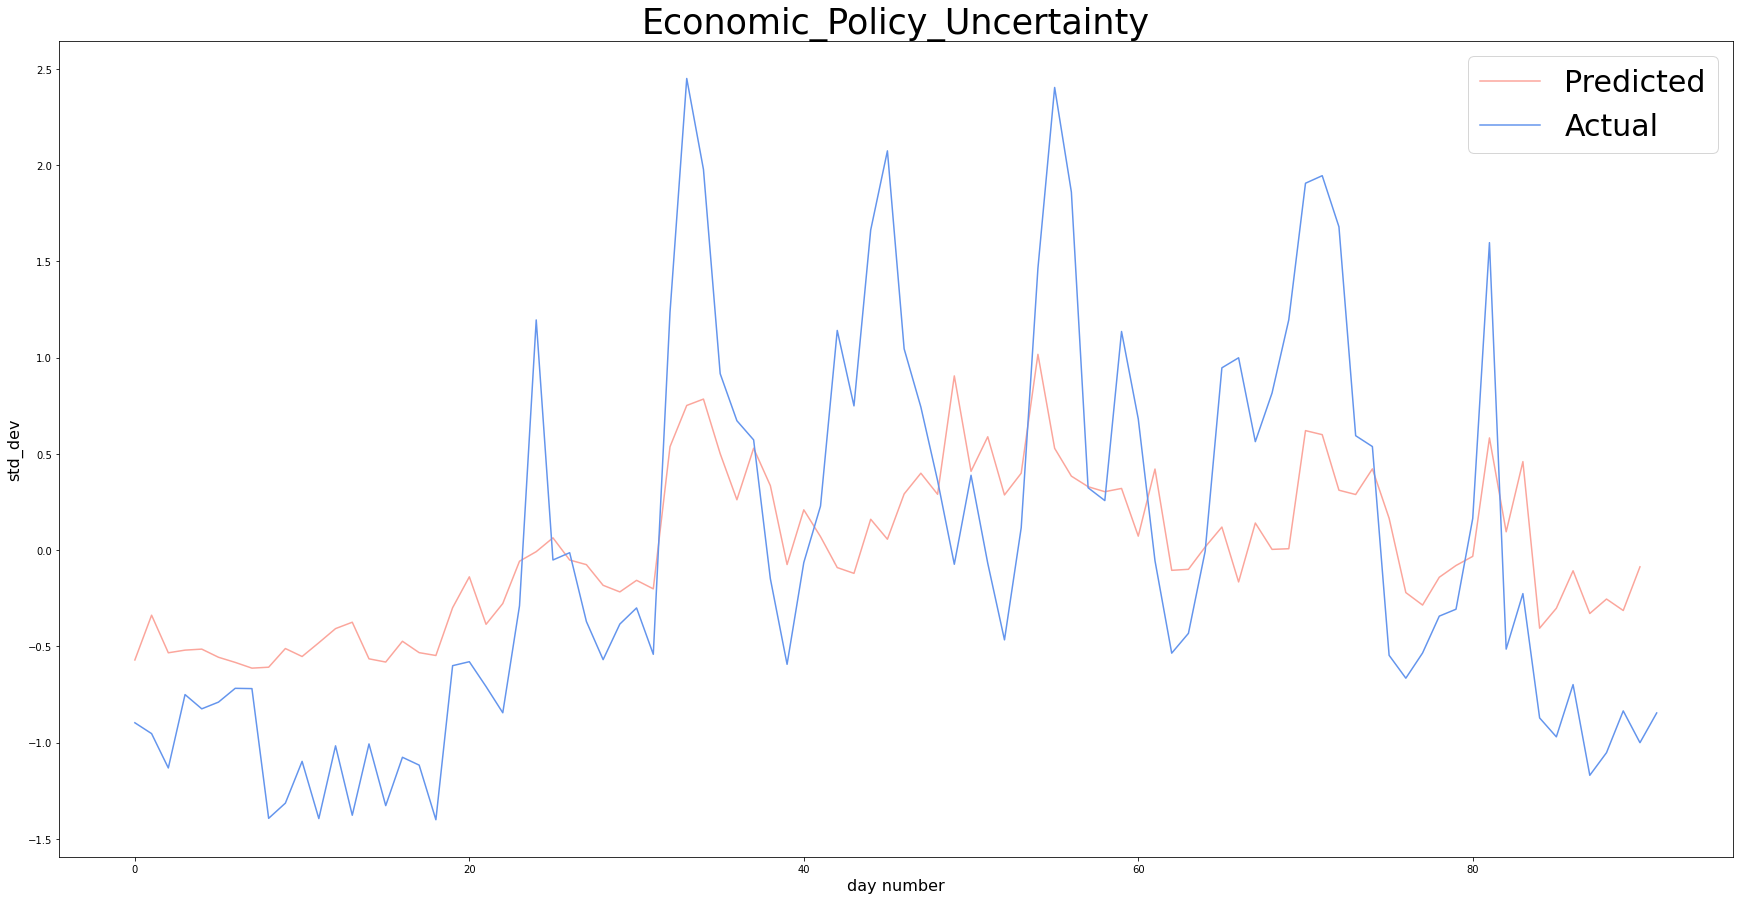

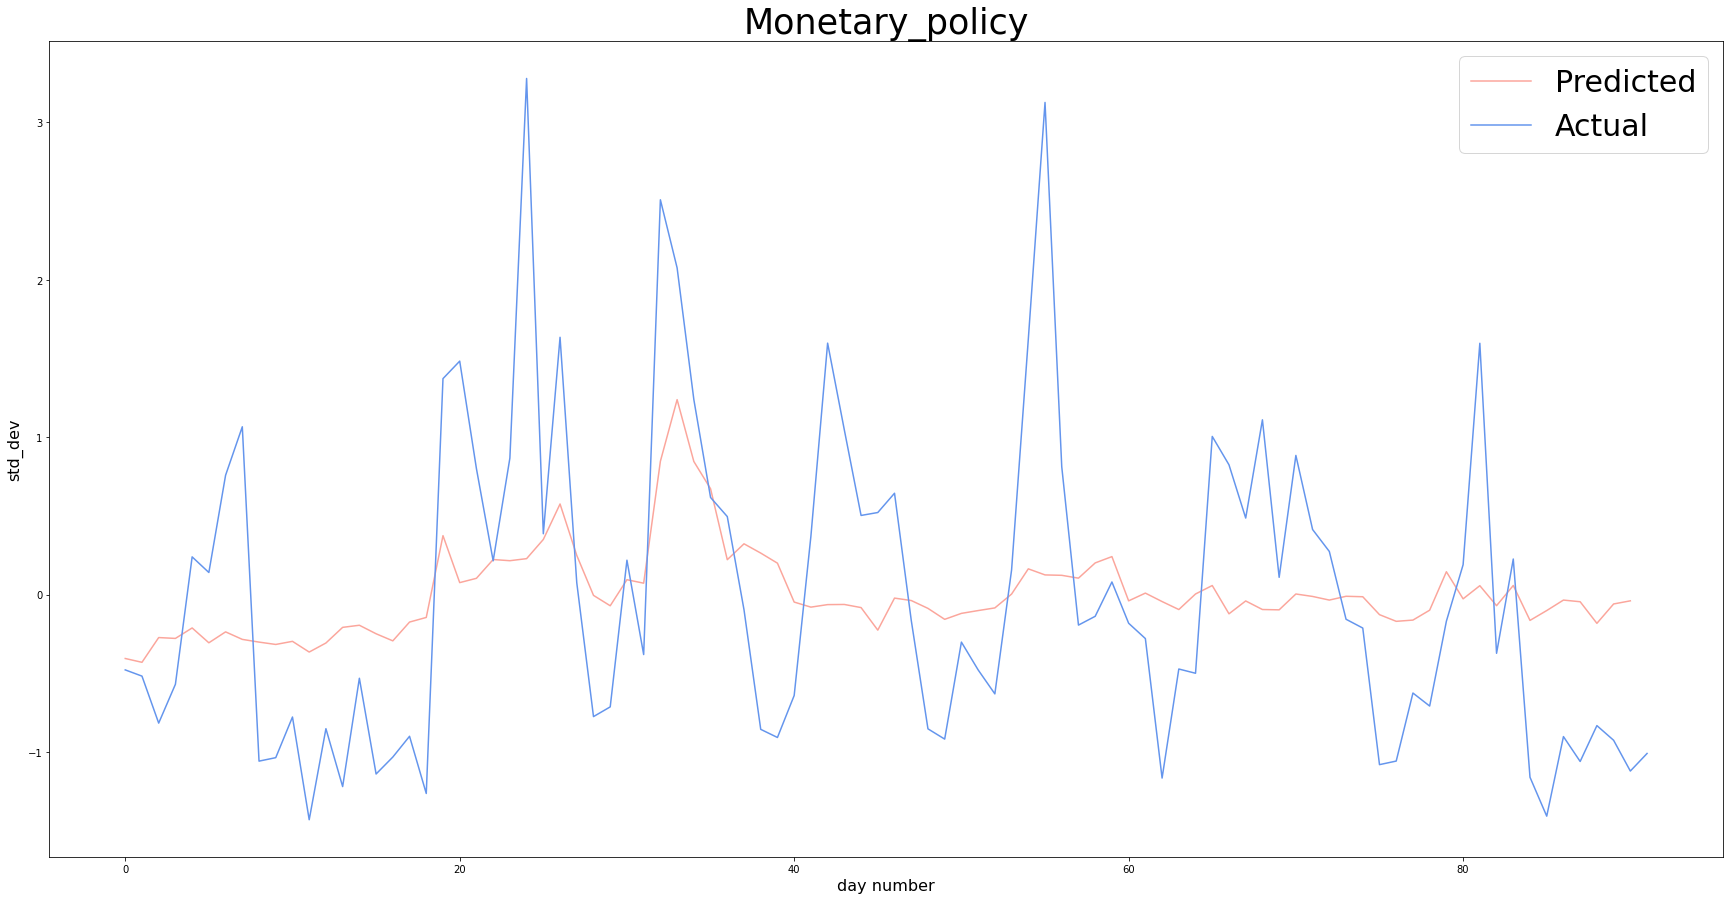

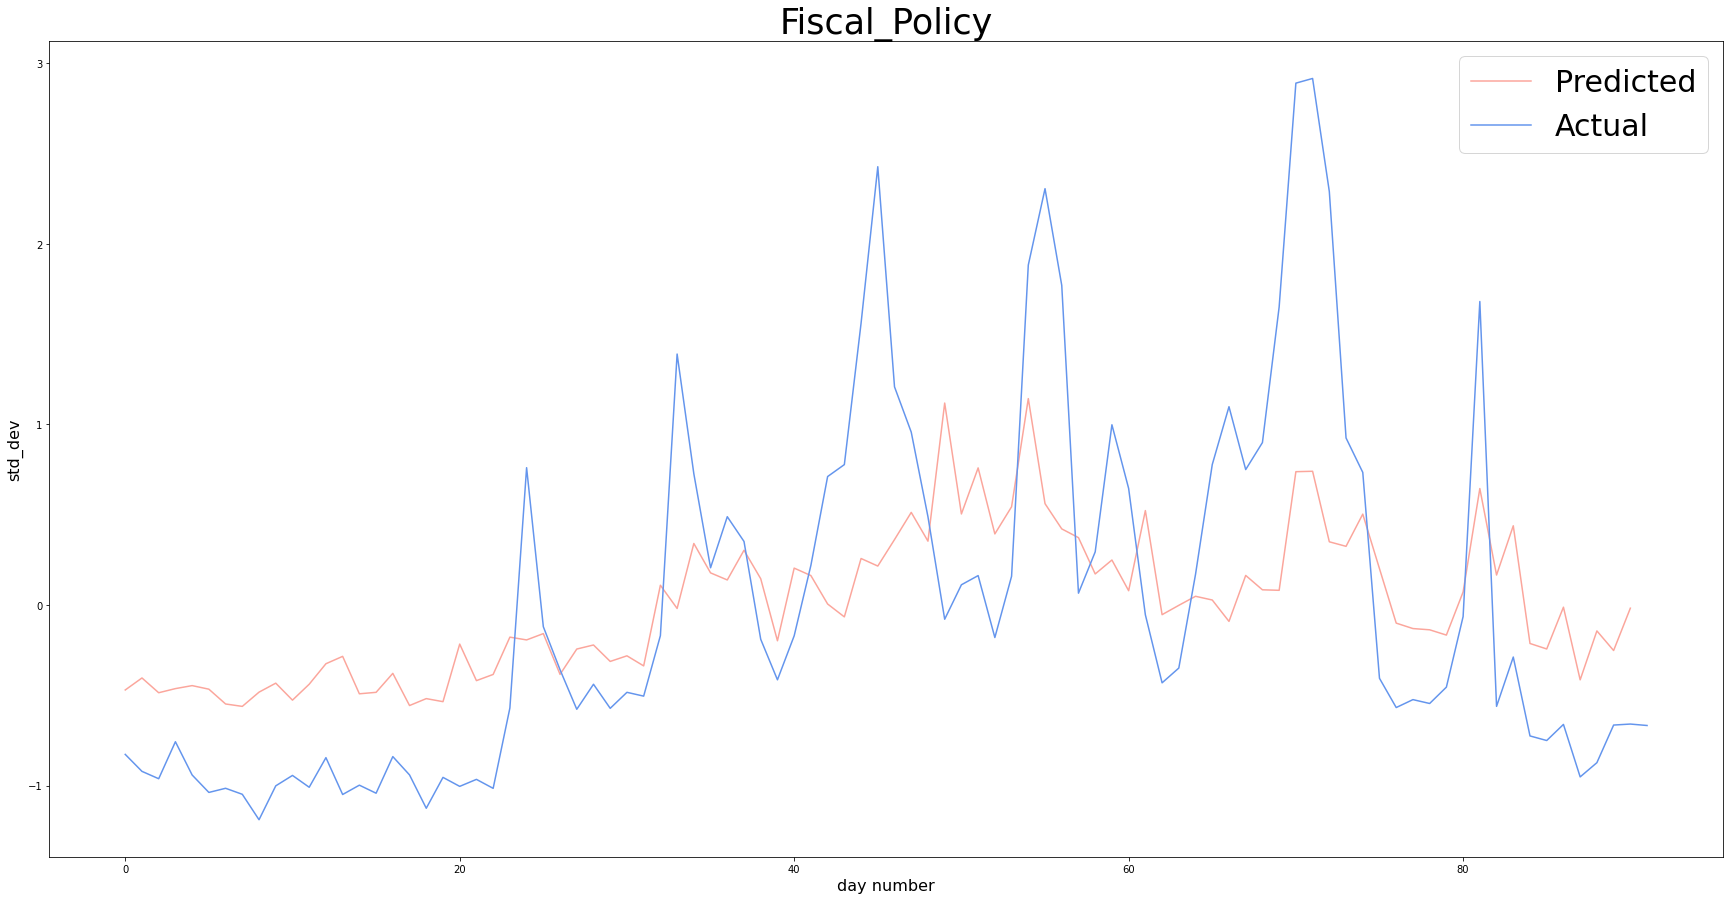

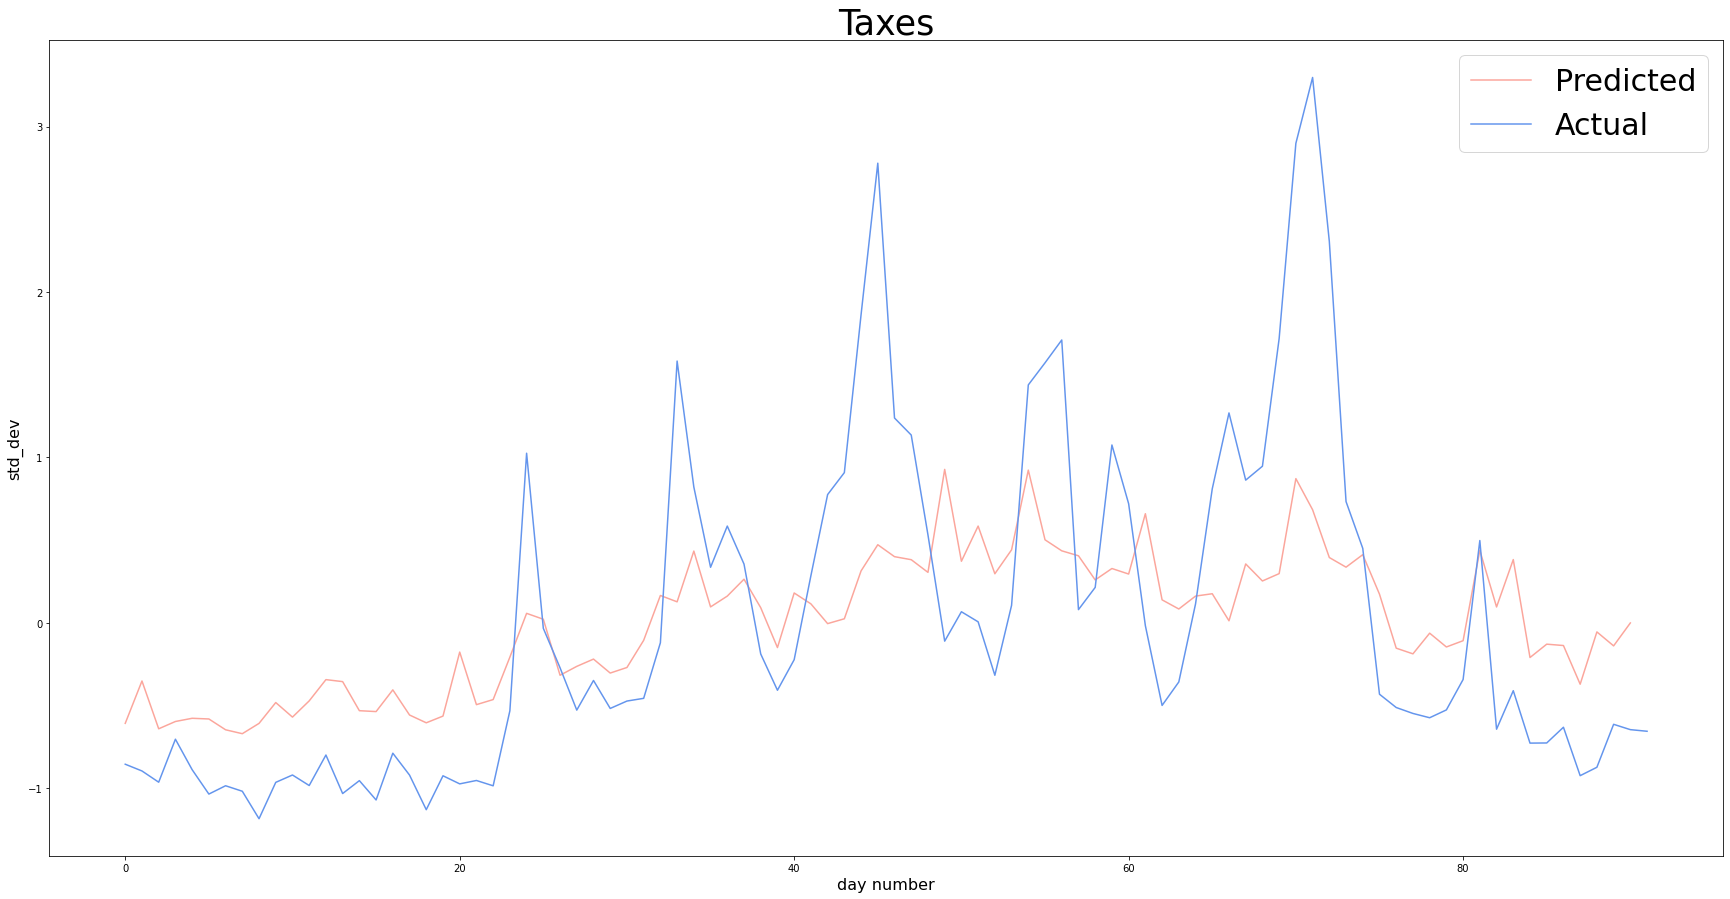

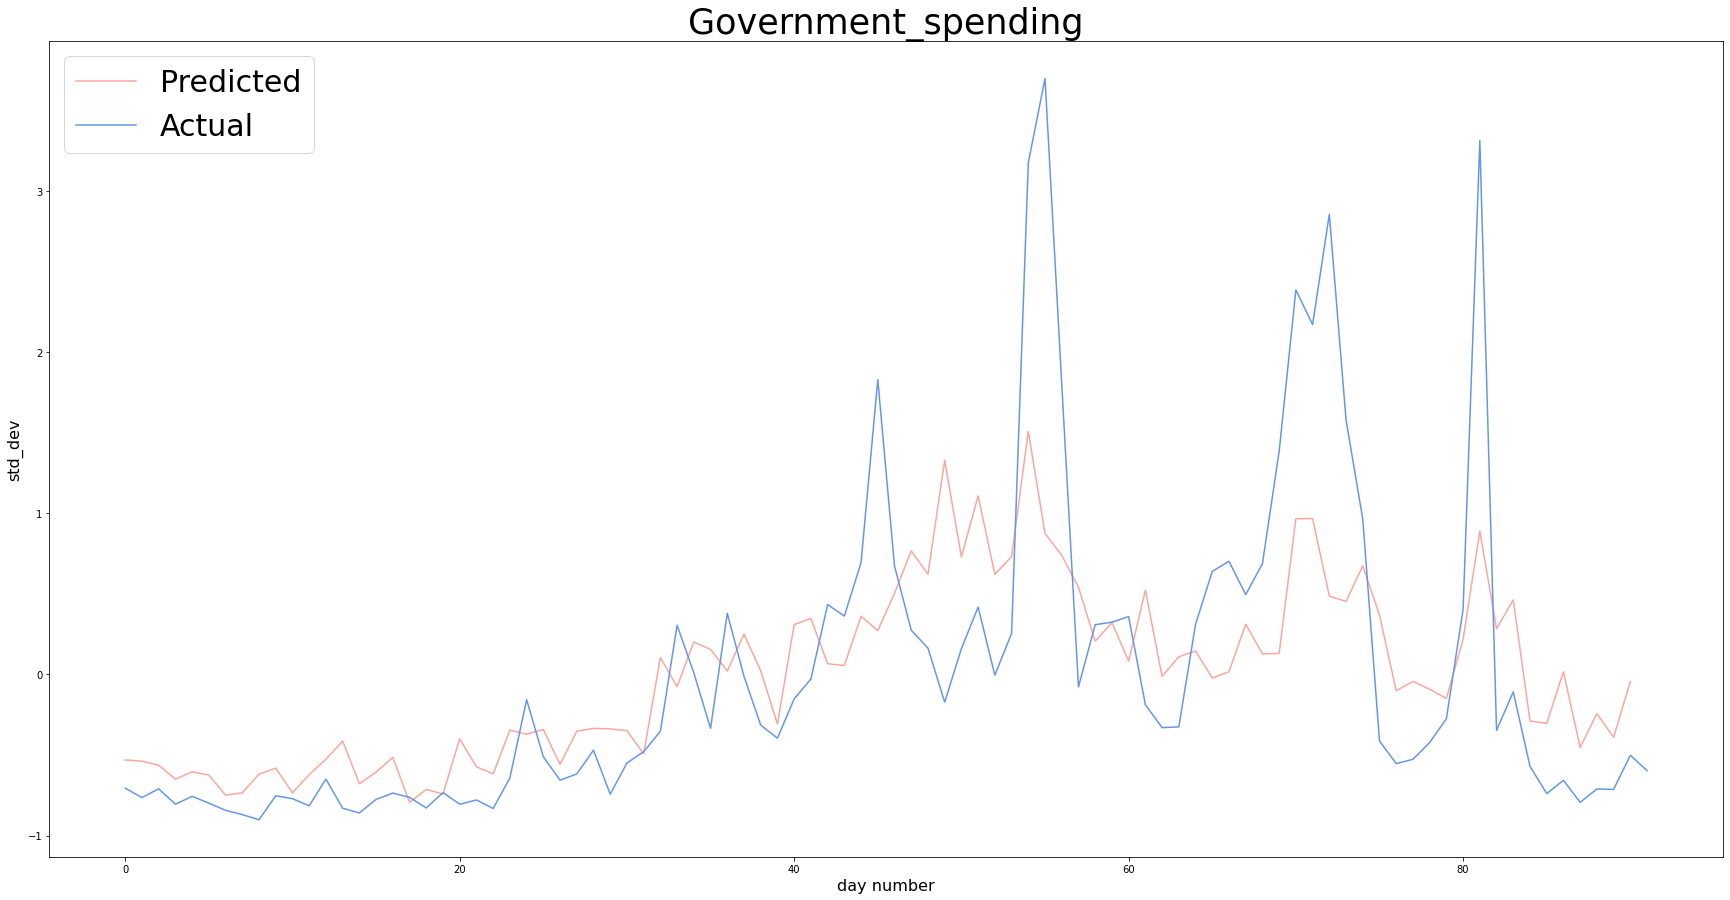

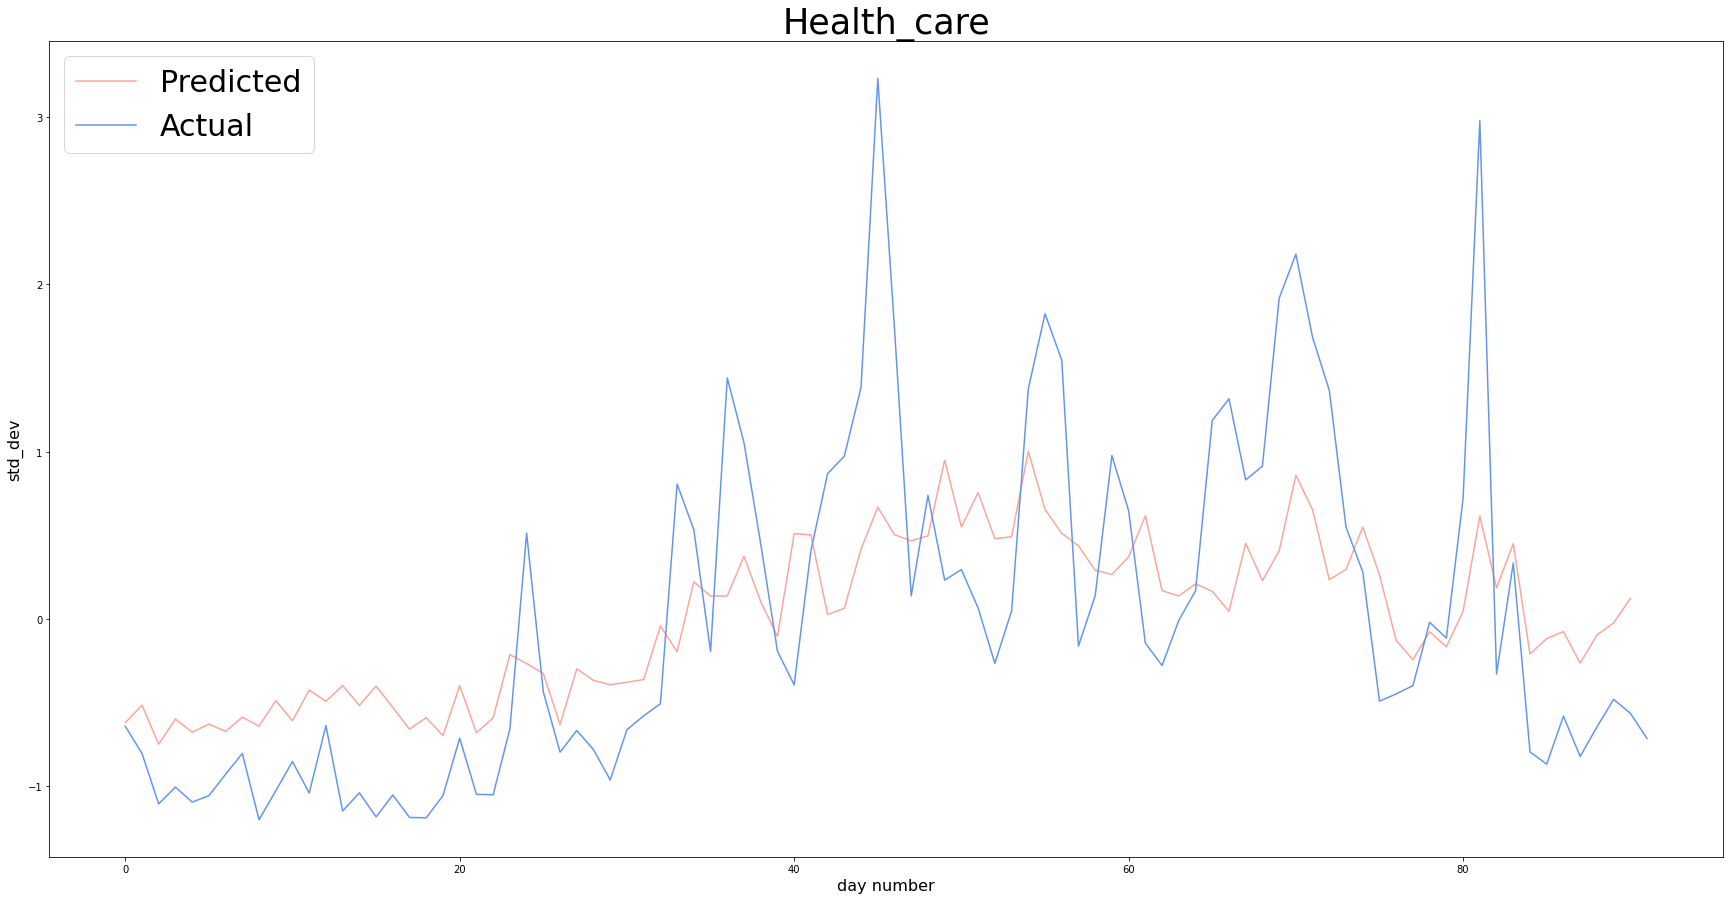

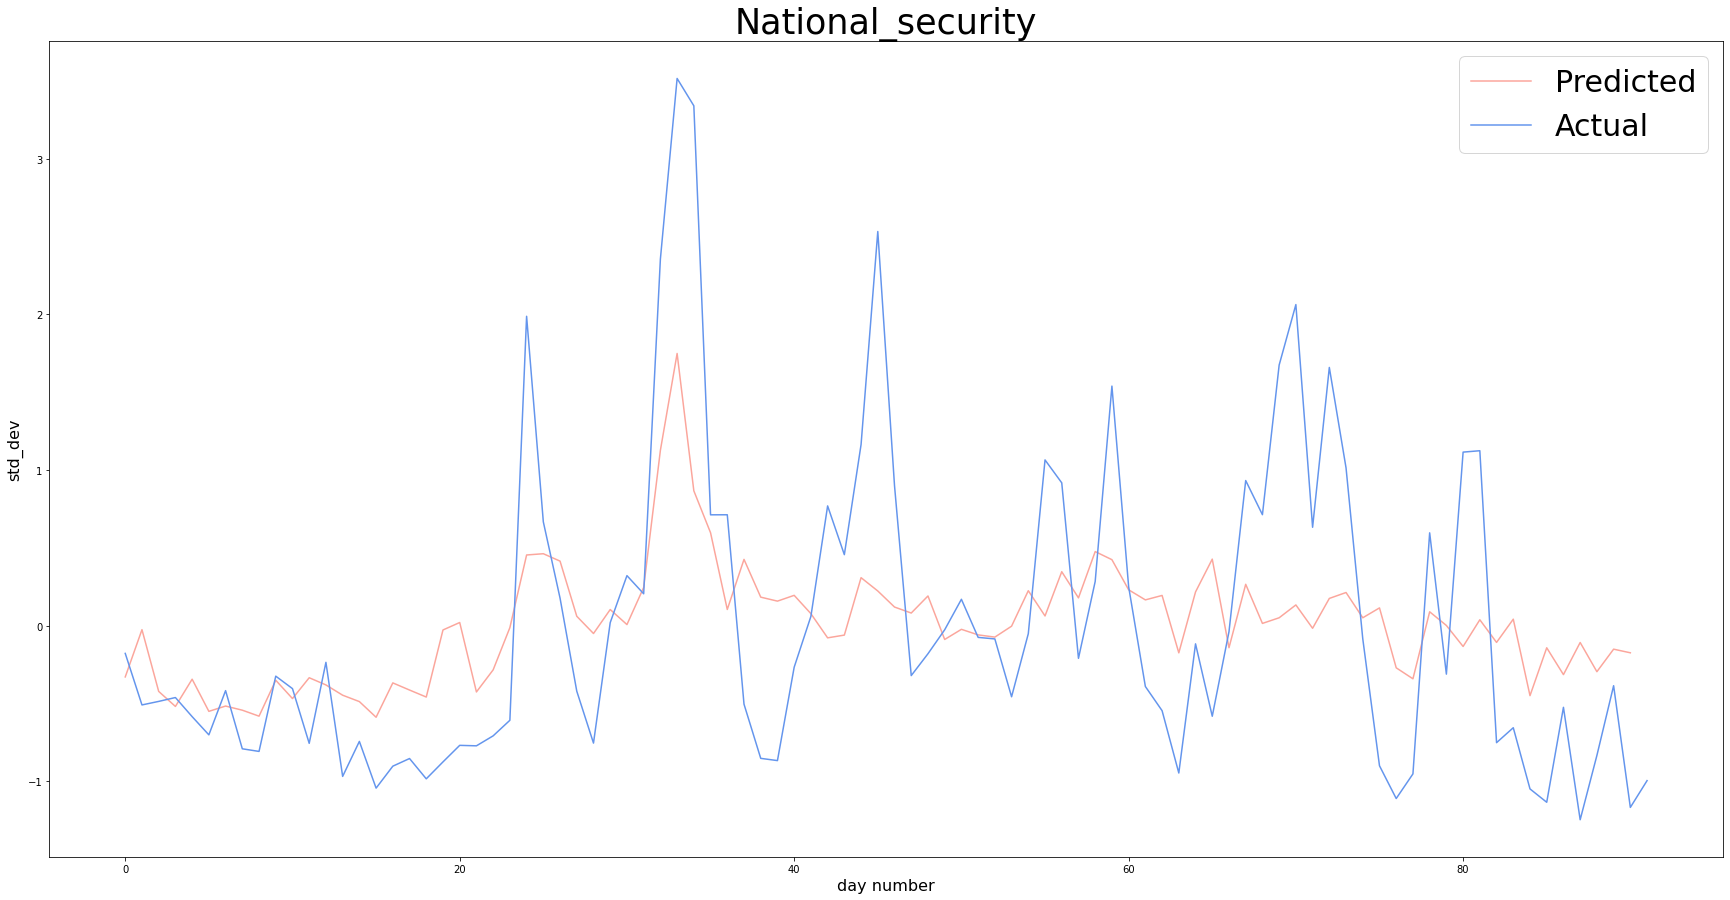

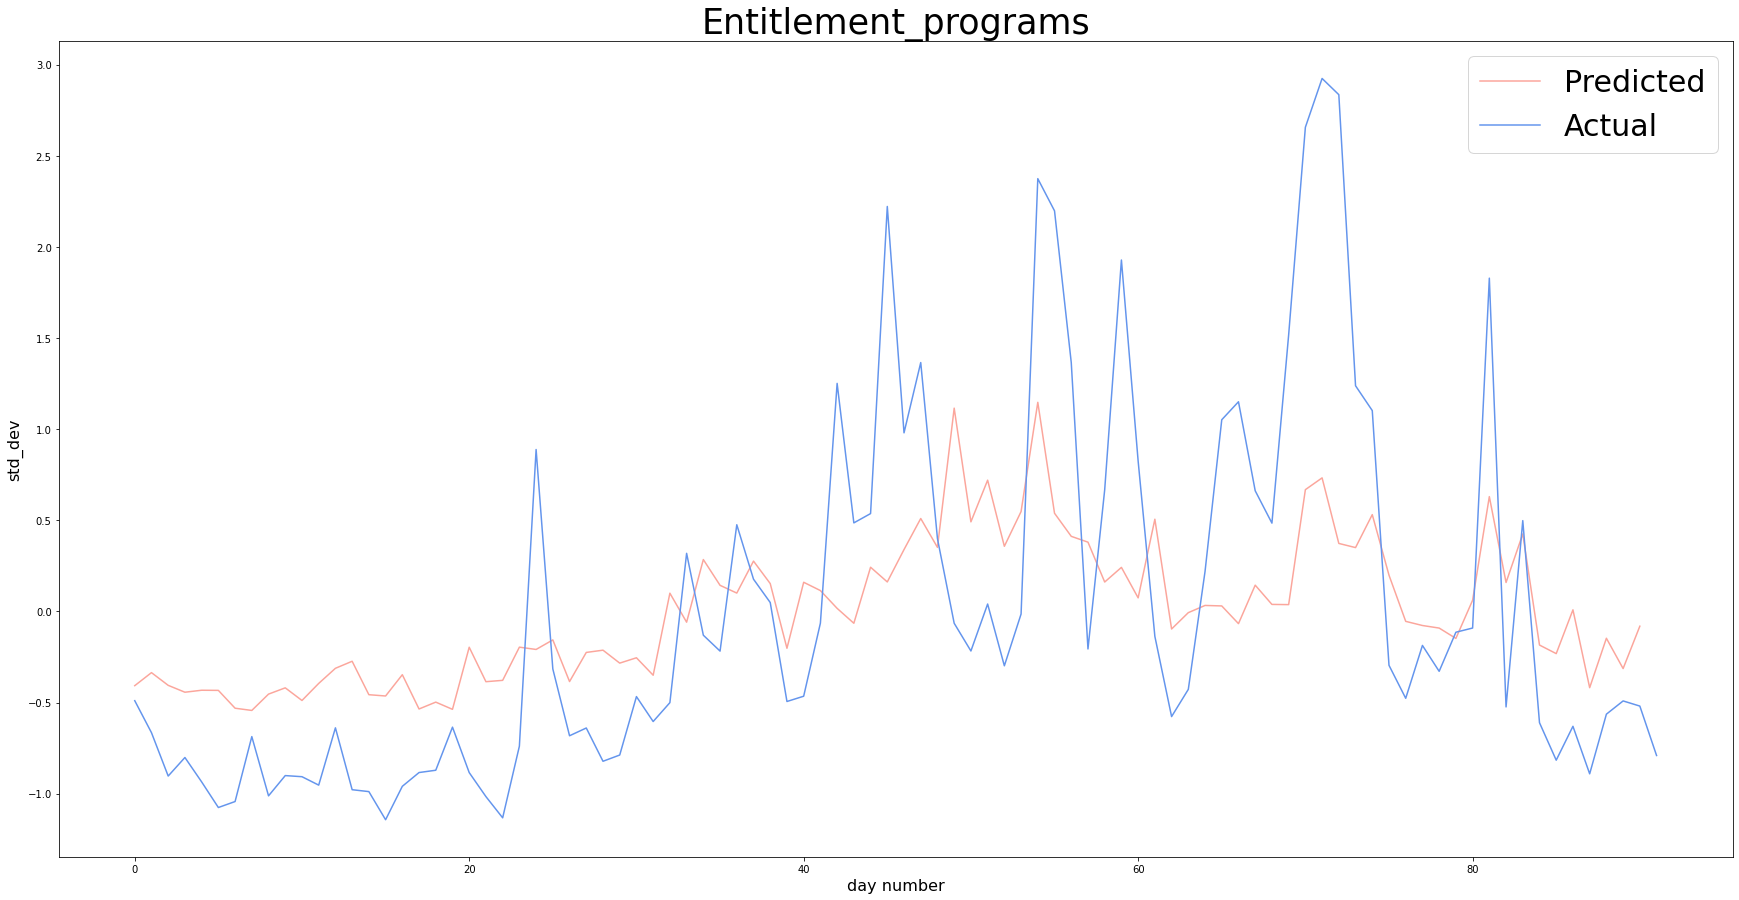

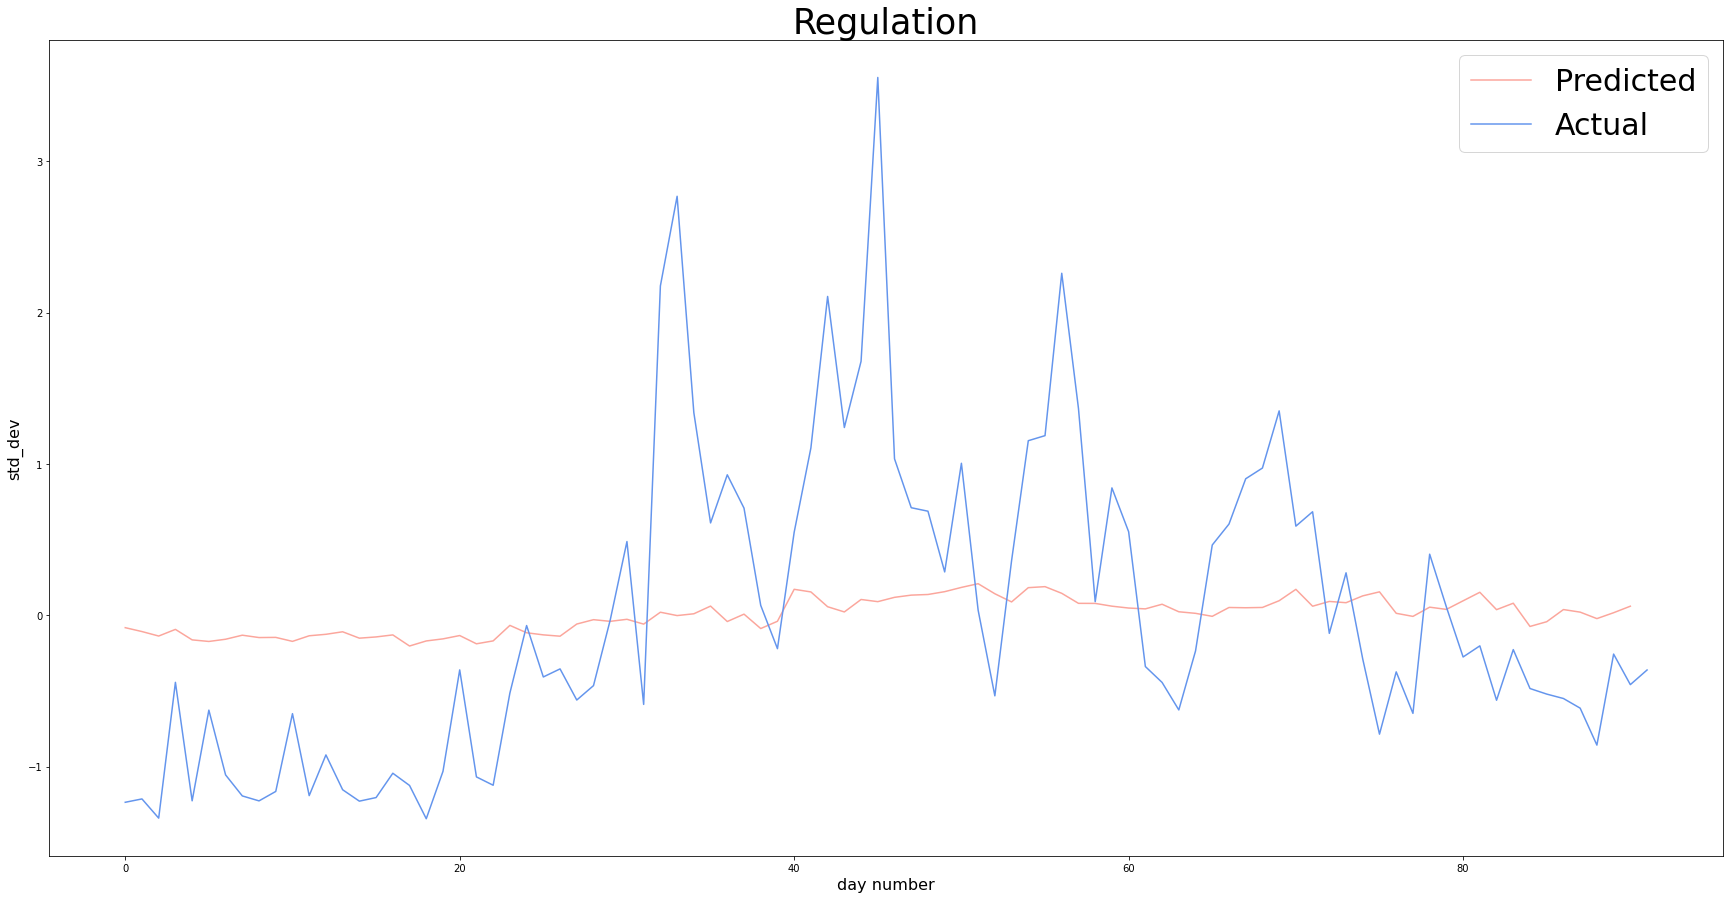

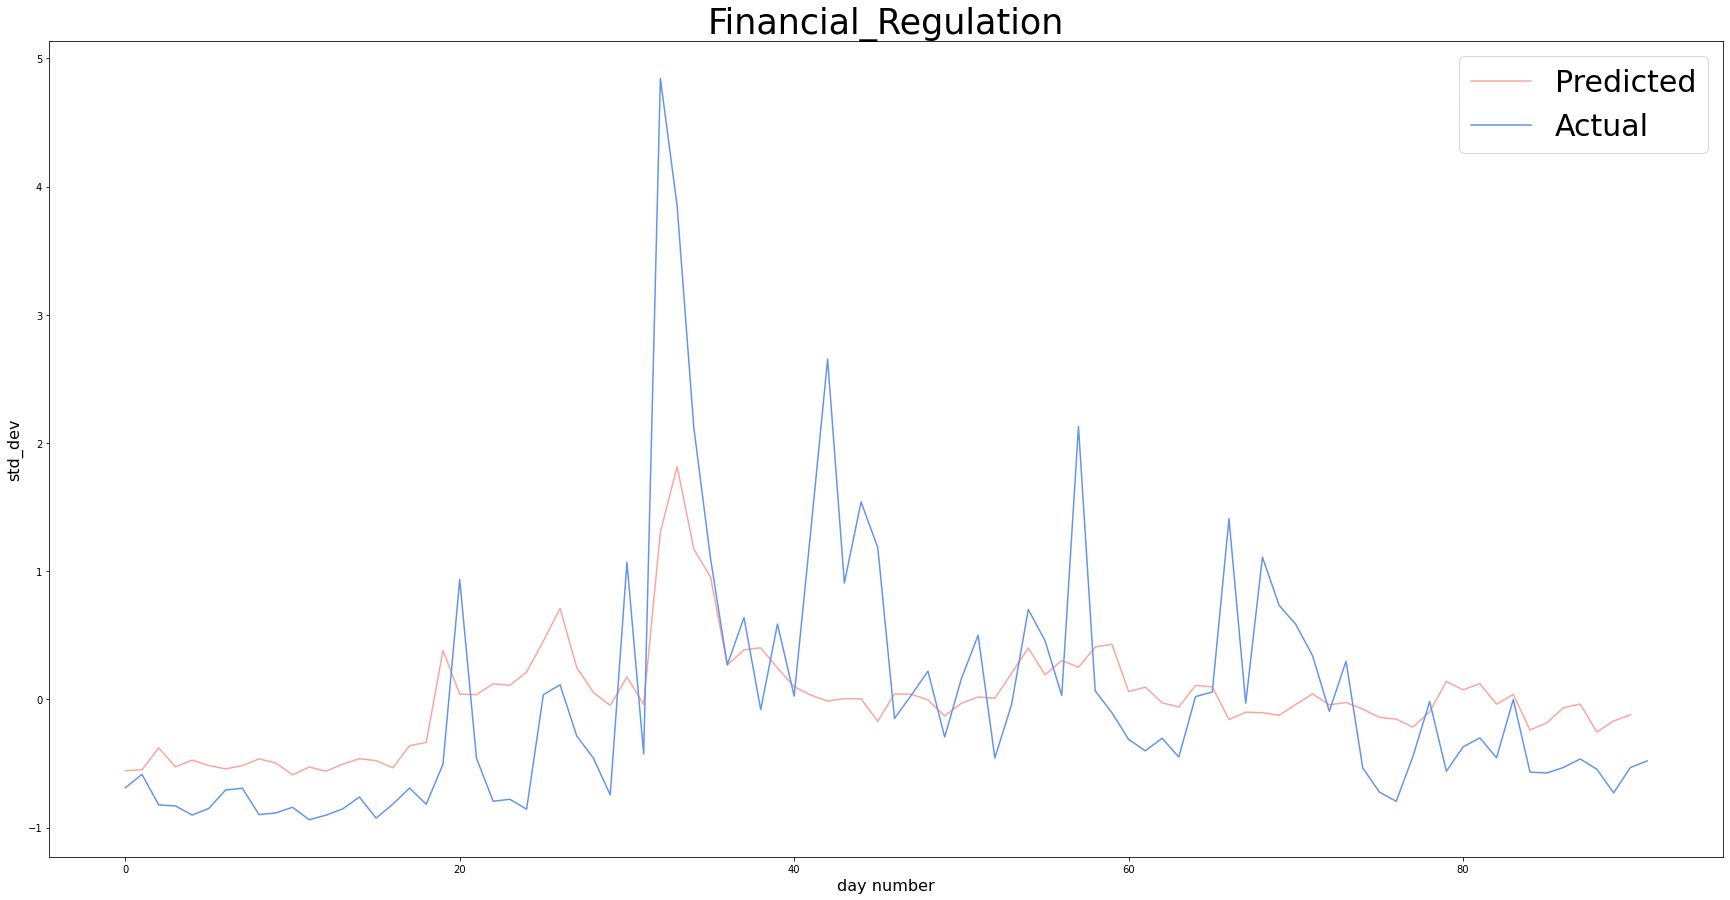

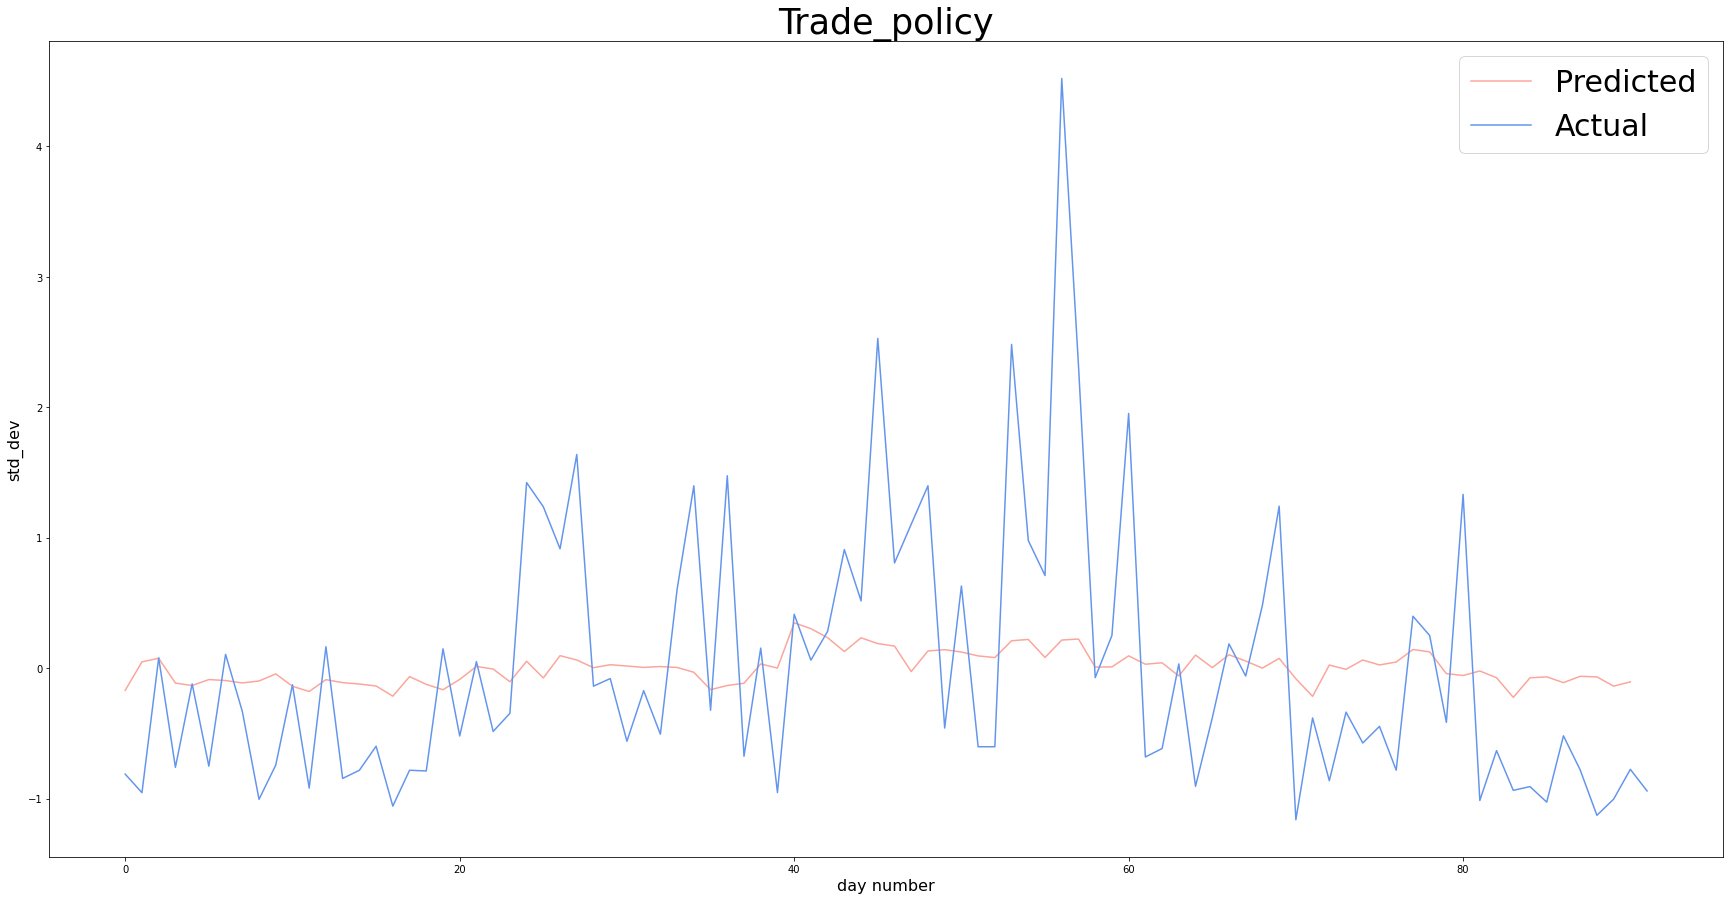

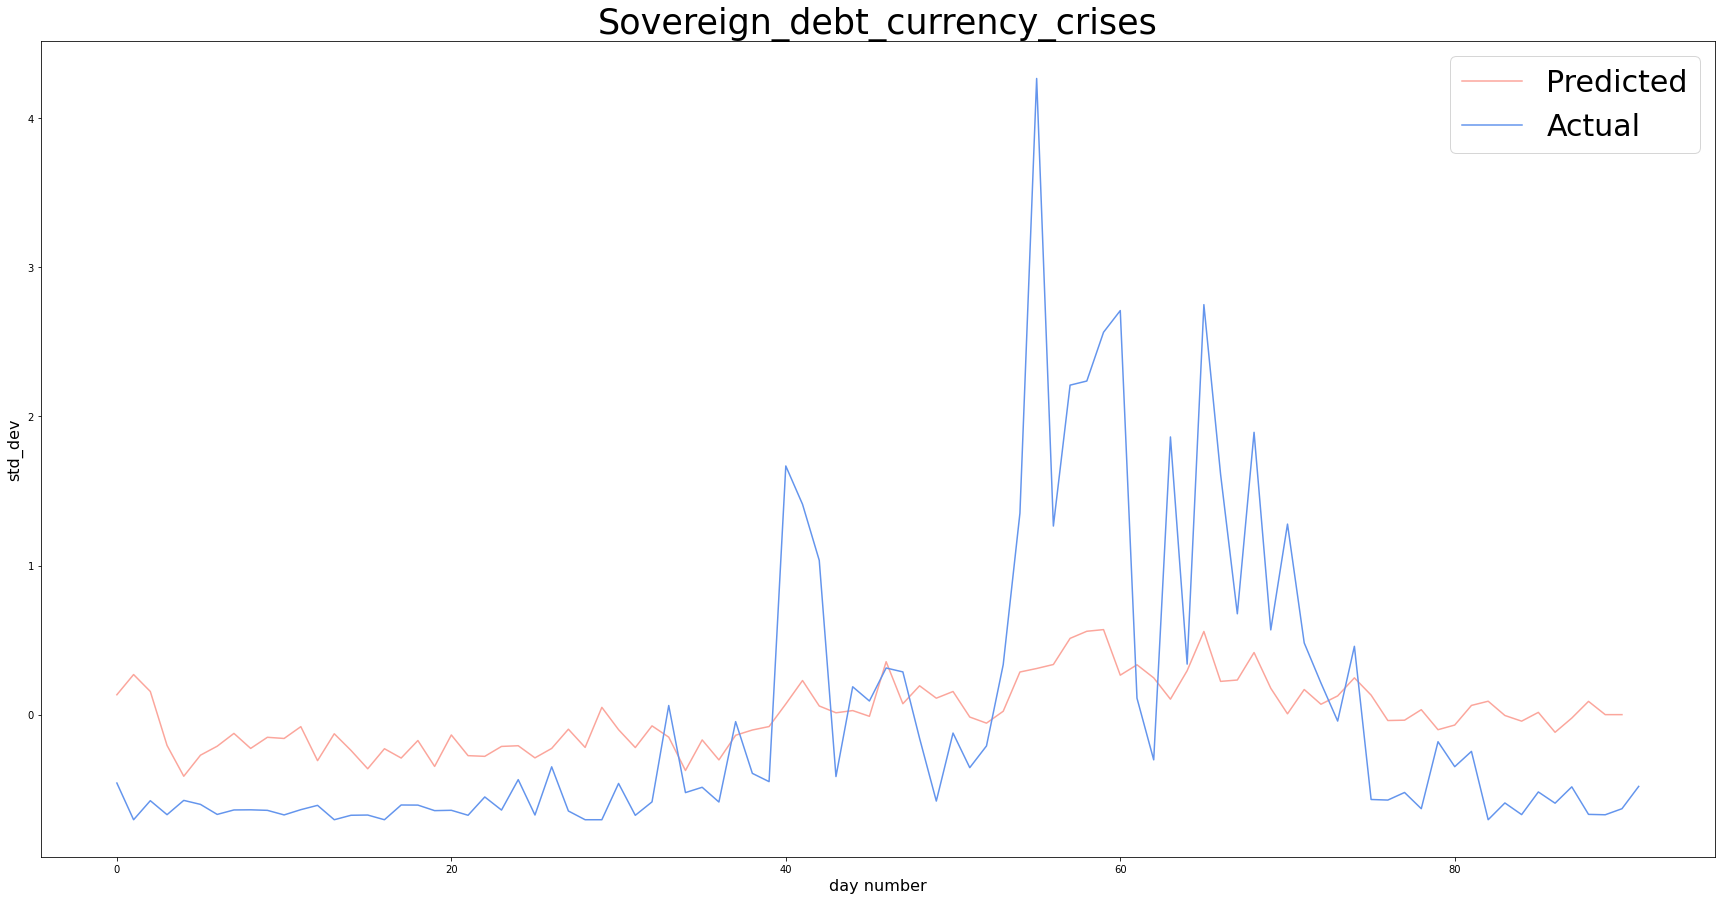

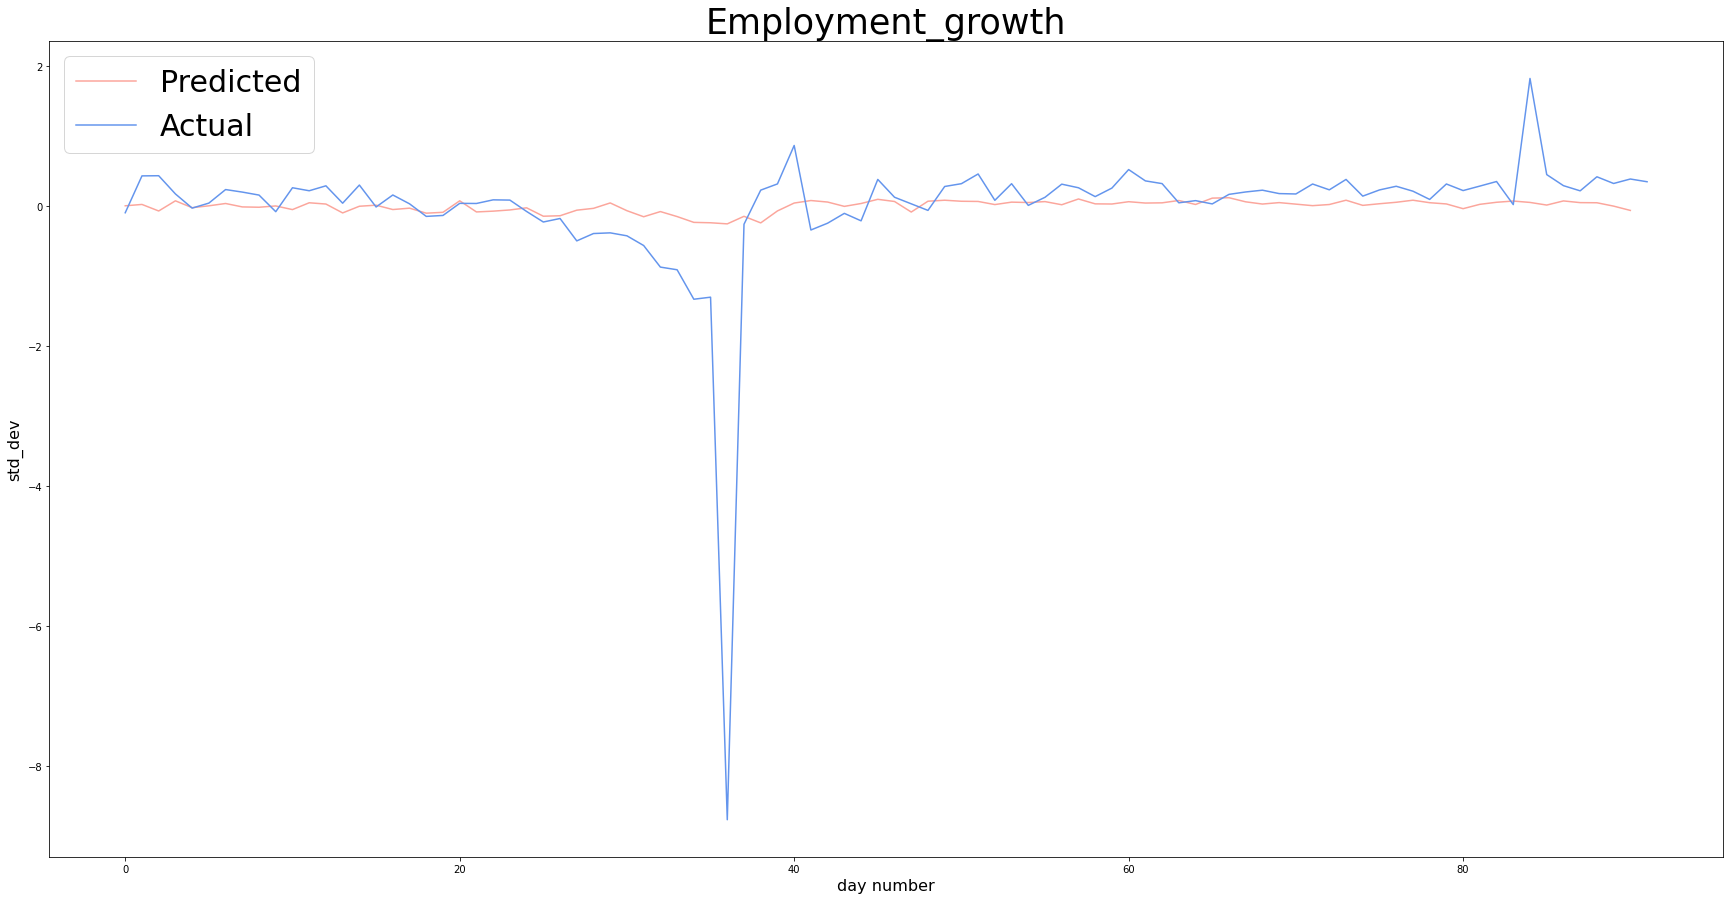

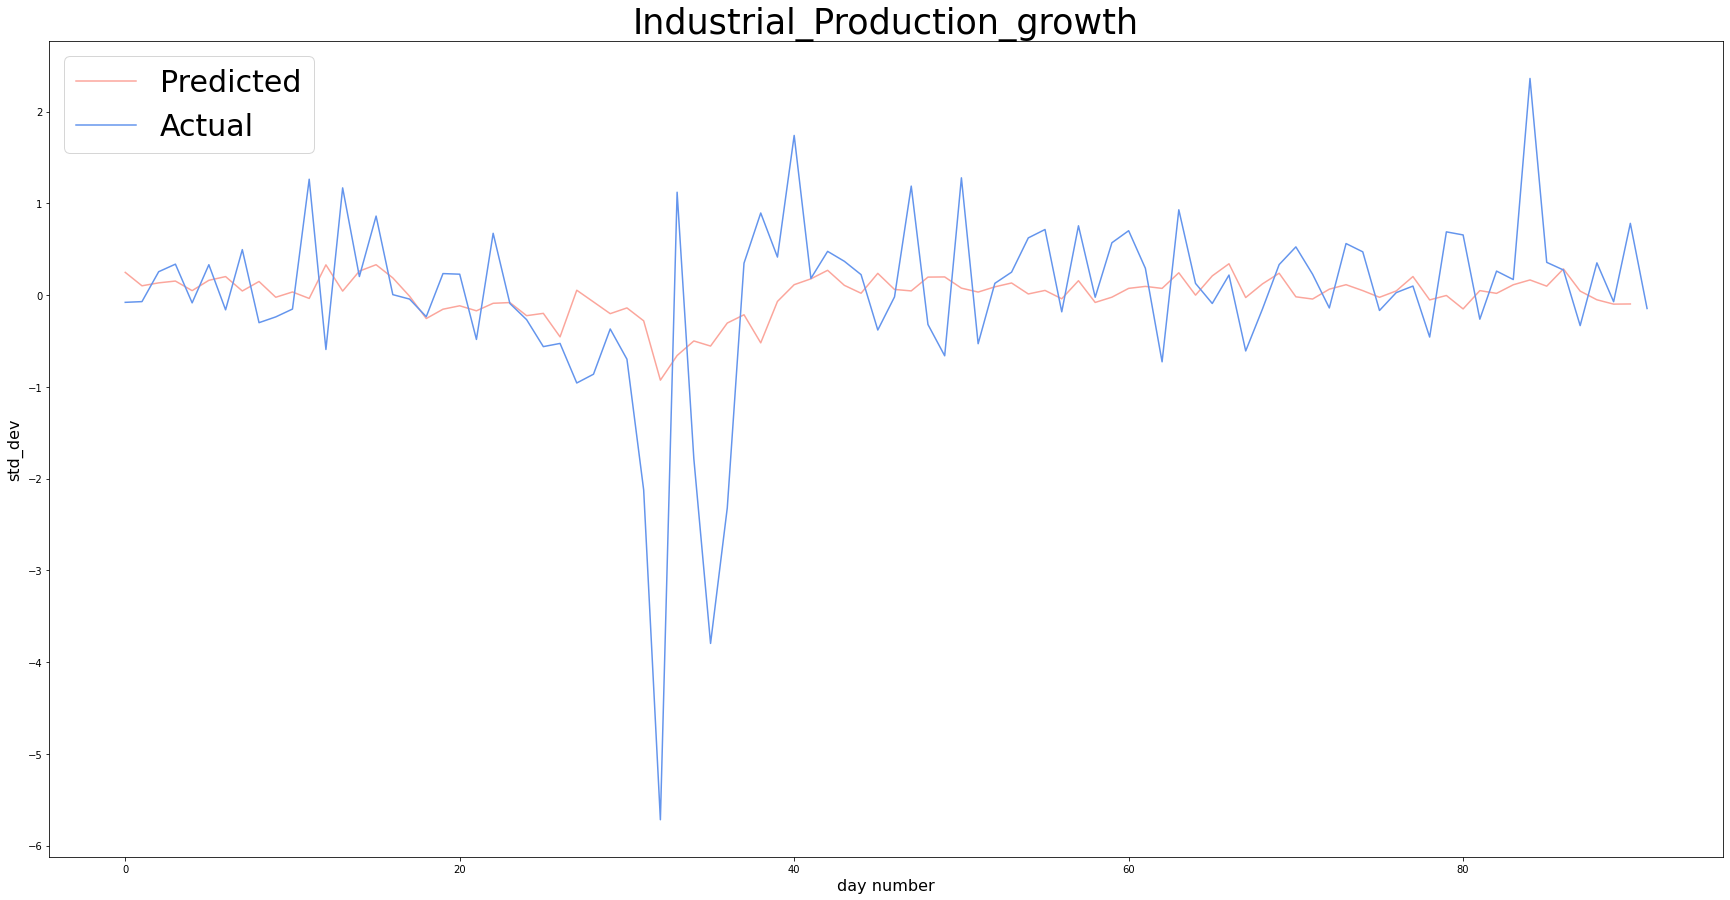

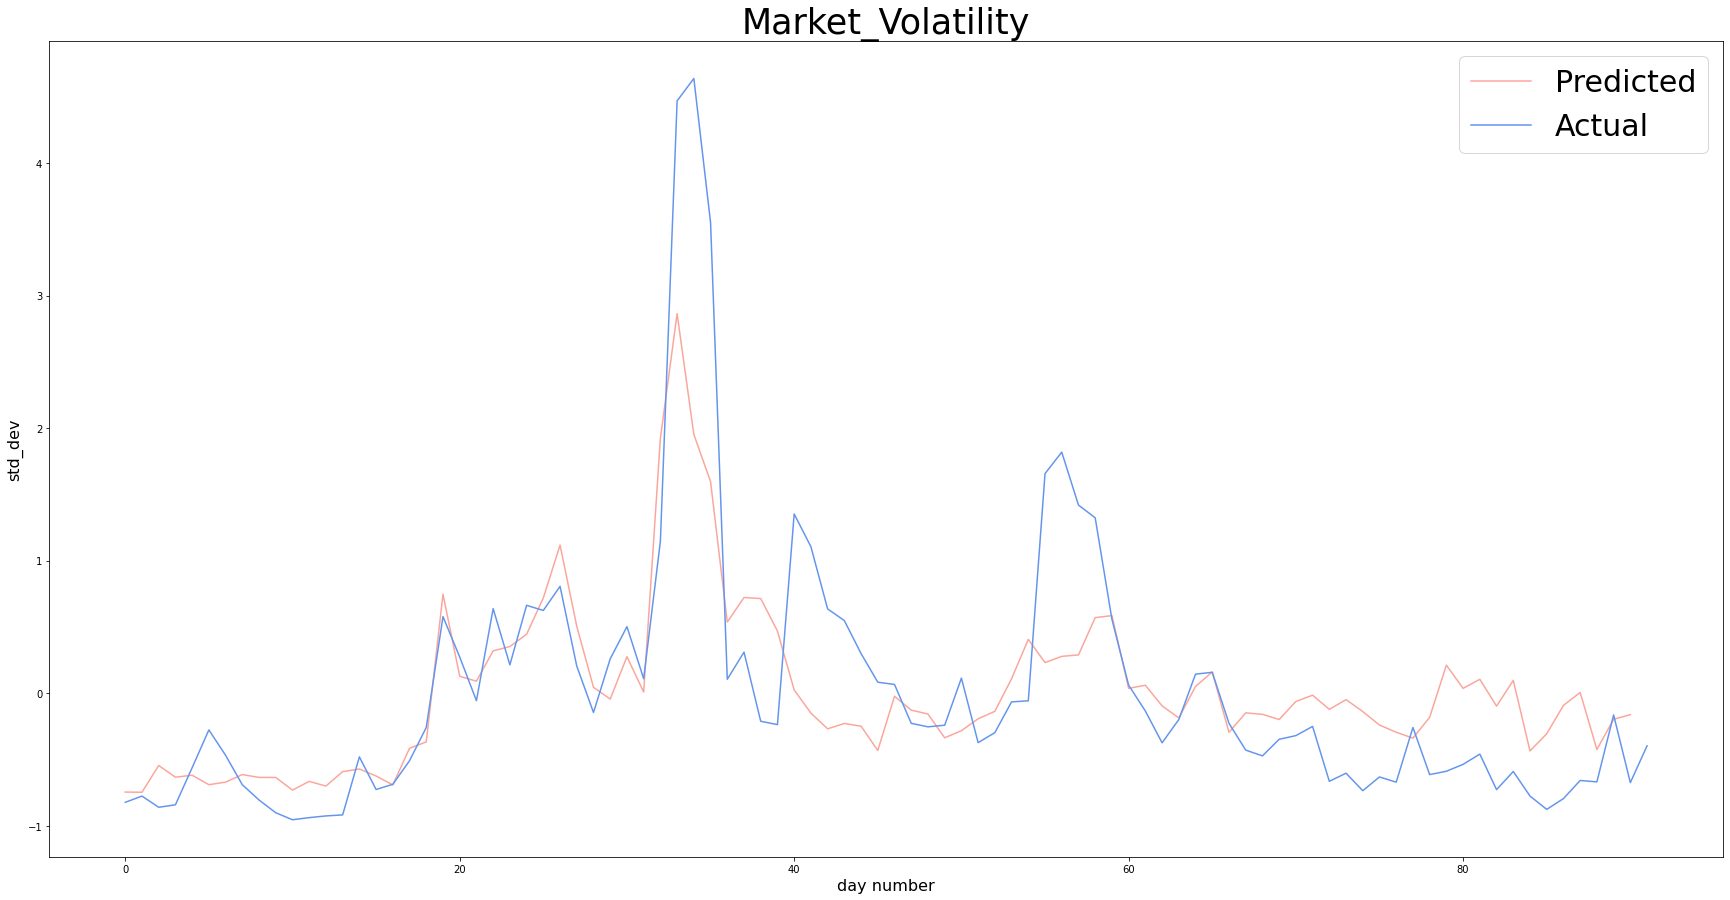

In [1022]:

keys = [key for key in selected_vars]
keys

for i in range(len(keys)):    
    fig, ax = plt.subplots(figsize=(30, 15))
    ax.plot(pred_train[keys[i]][:-1], alpha = 0.7, color = 'salmon', label='Predicted')
    ax.plot(y_train_scaled_dict[keys[i]], alpha = 1, color = 'cornflowerblue', label='Actual')
    ax.legend(fontsize='large', prop={'size': 30})
    ax.set_title(keys[i], fontsize=35)
    ax.set_ylabel('std_dev', fontsize=16)
    ax.set_xlabel('day number', fontsize =16)
    fig.show

### Plot Test Predictions for Unweighted Attention

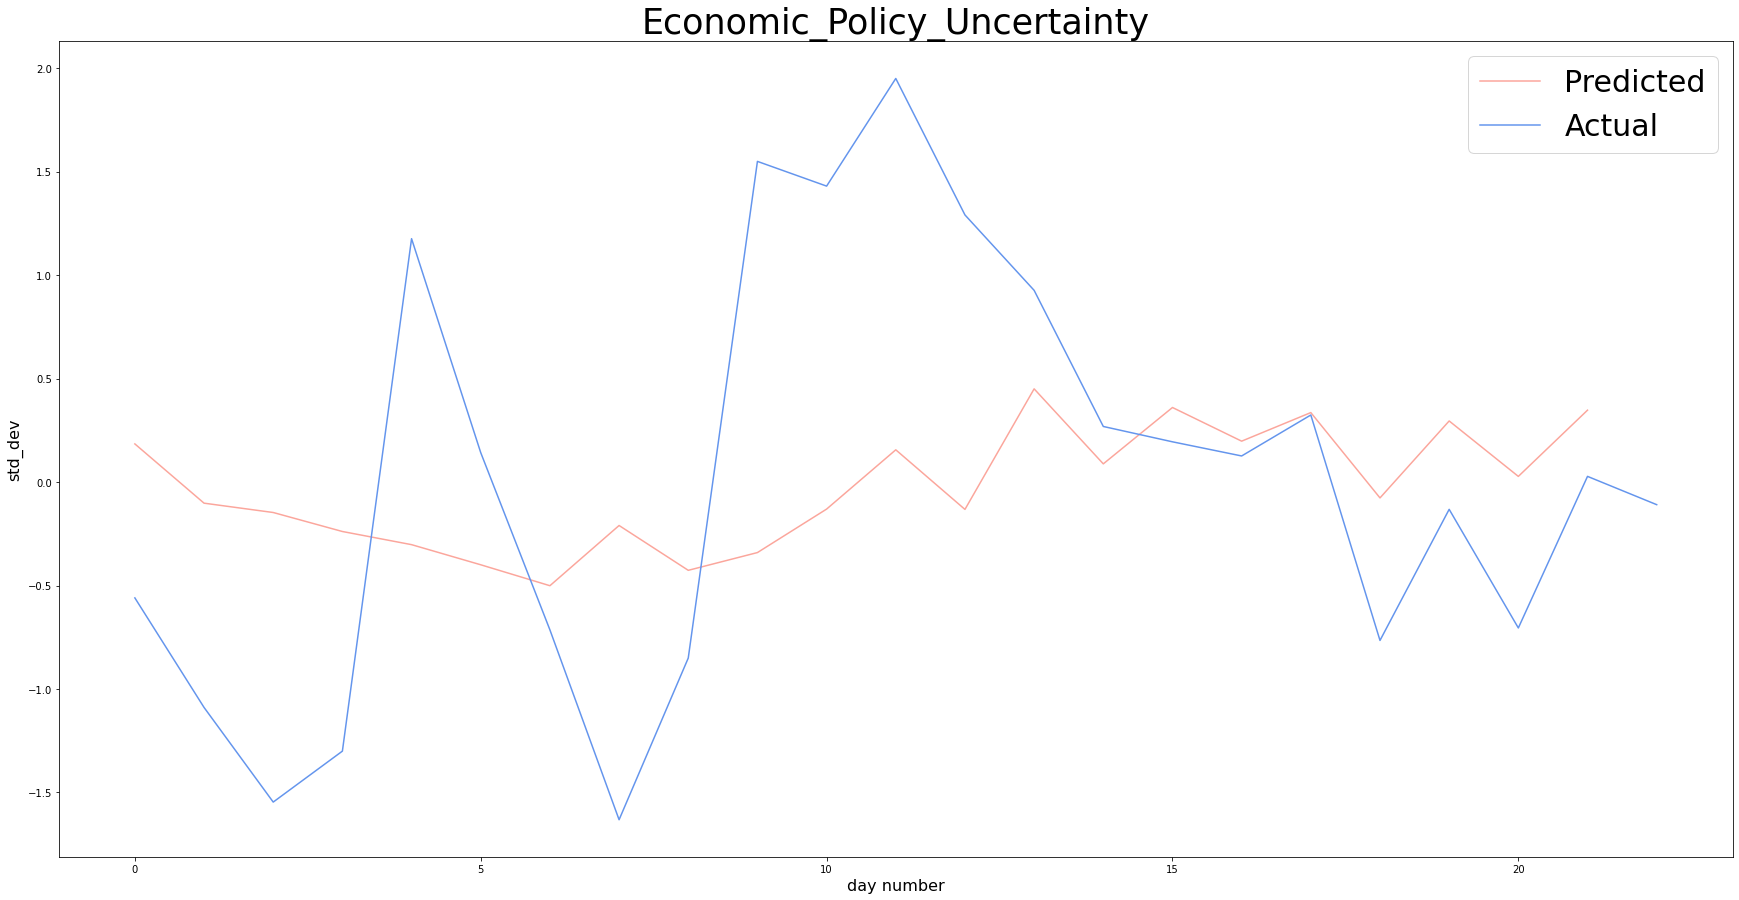

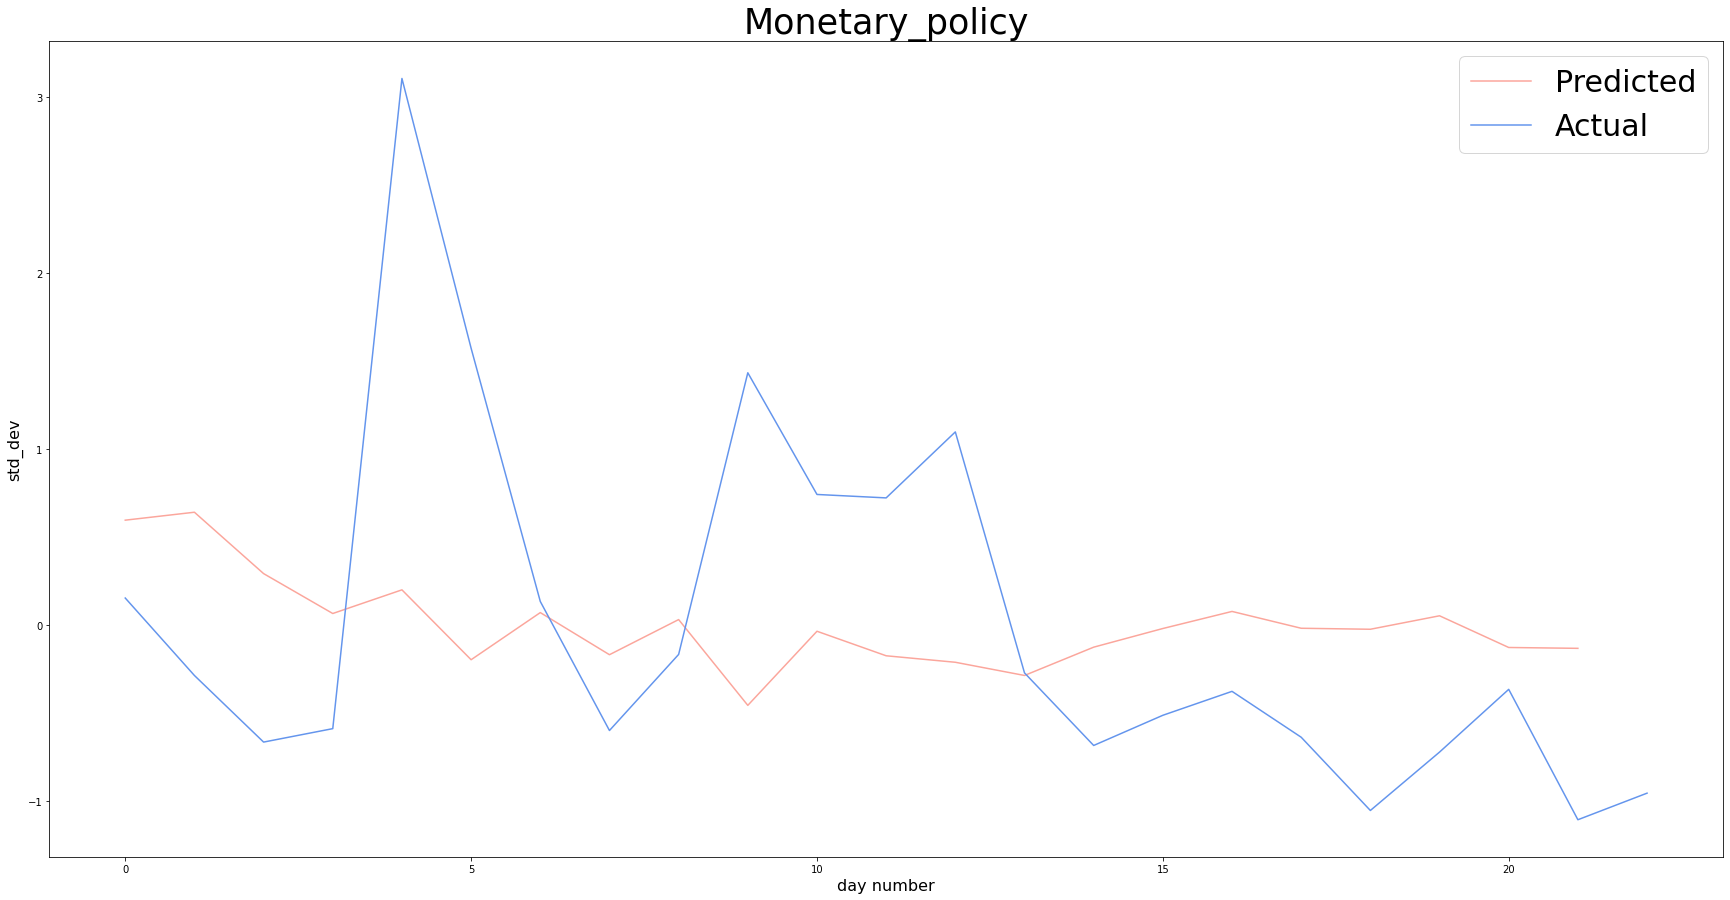

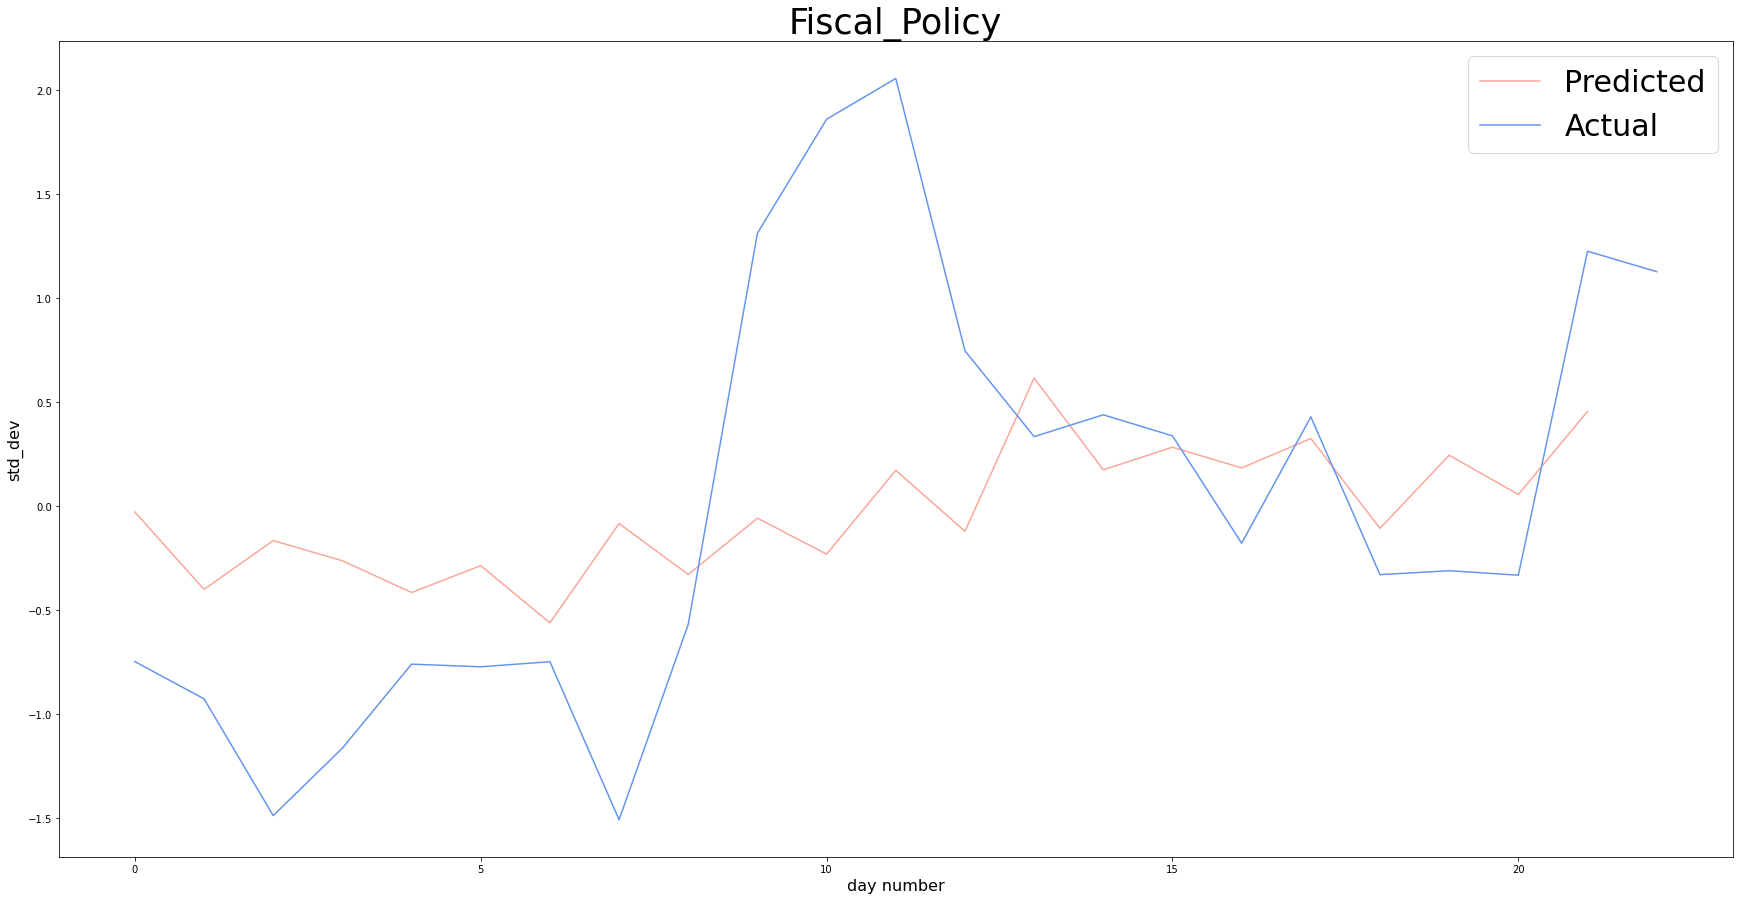

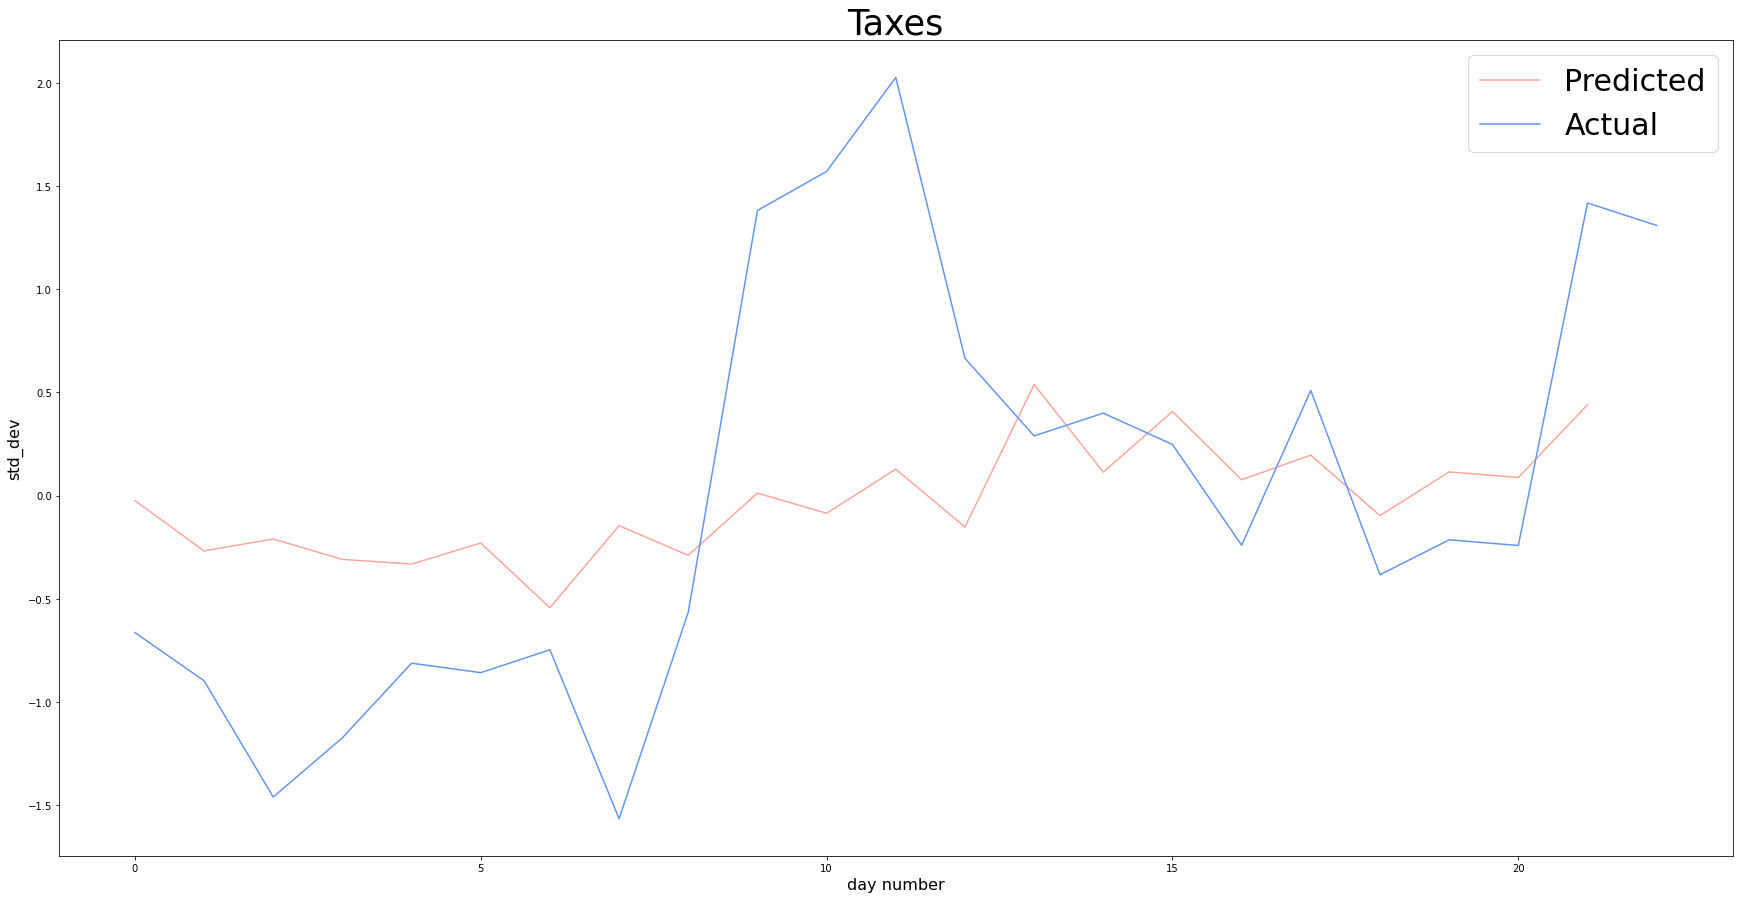

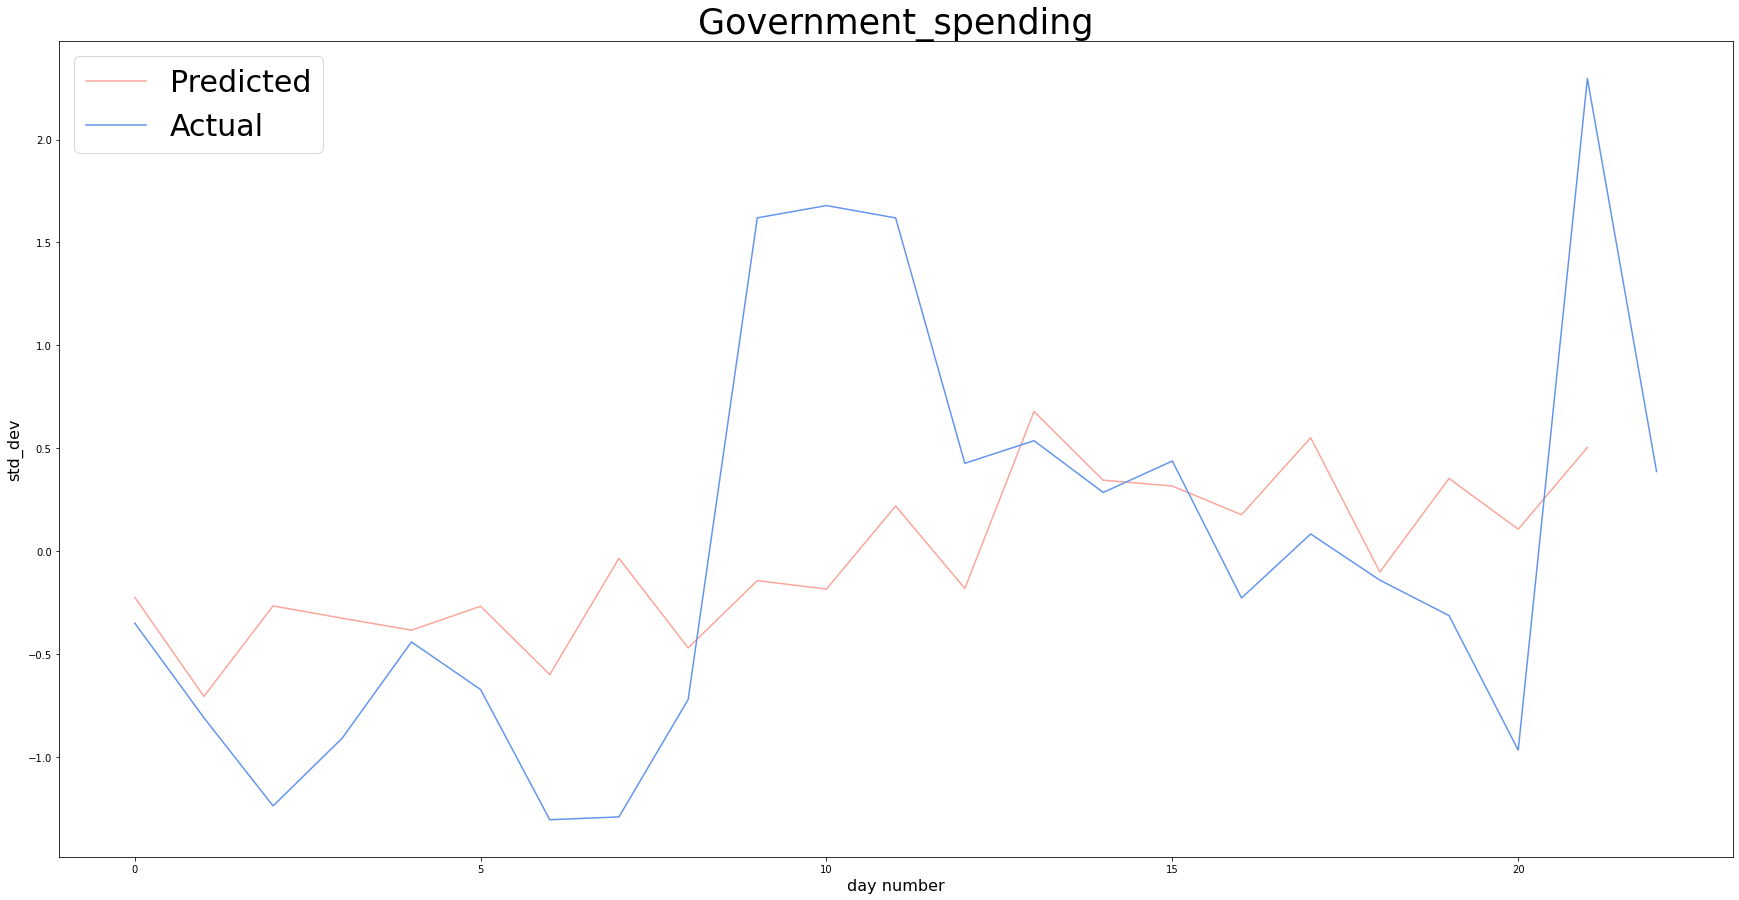

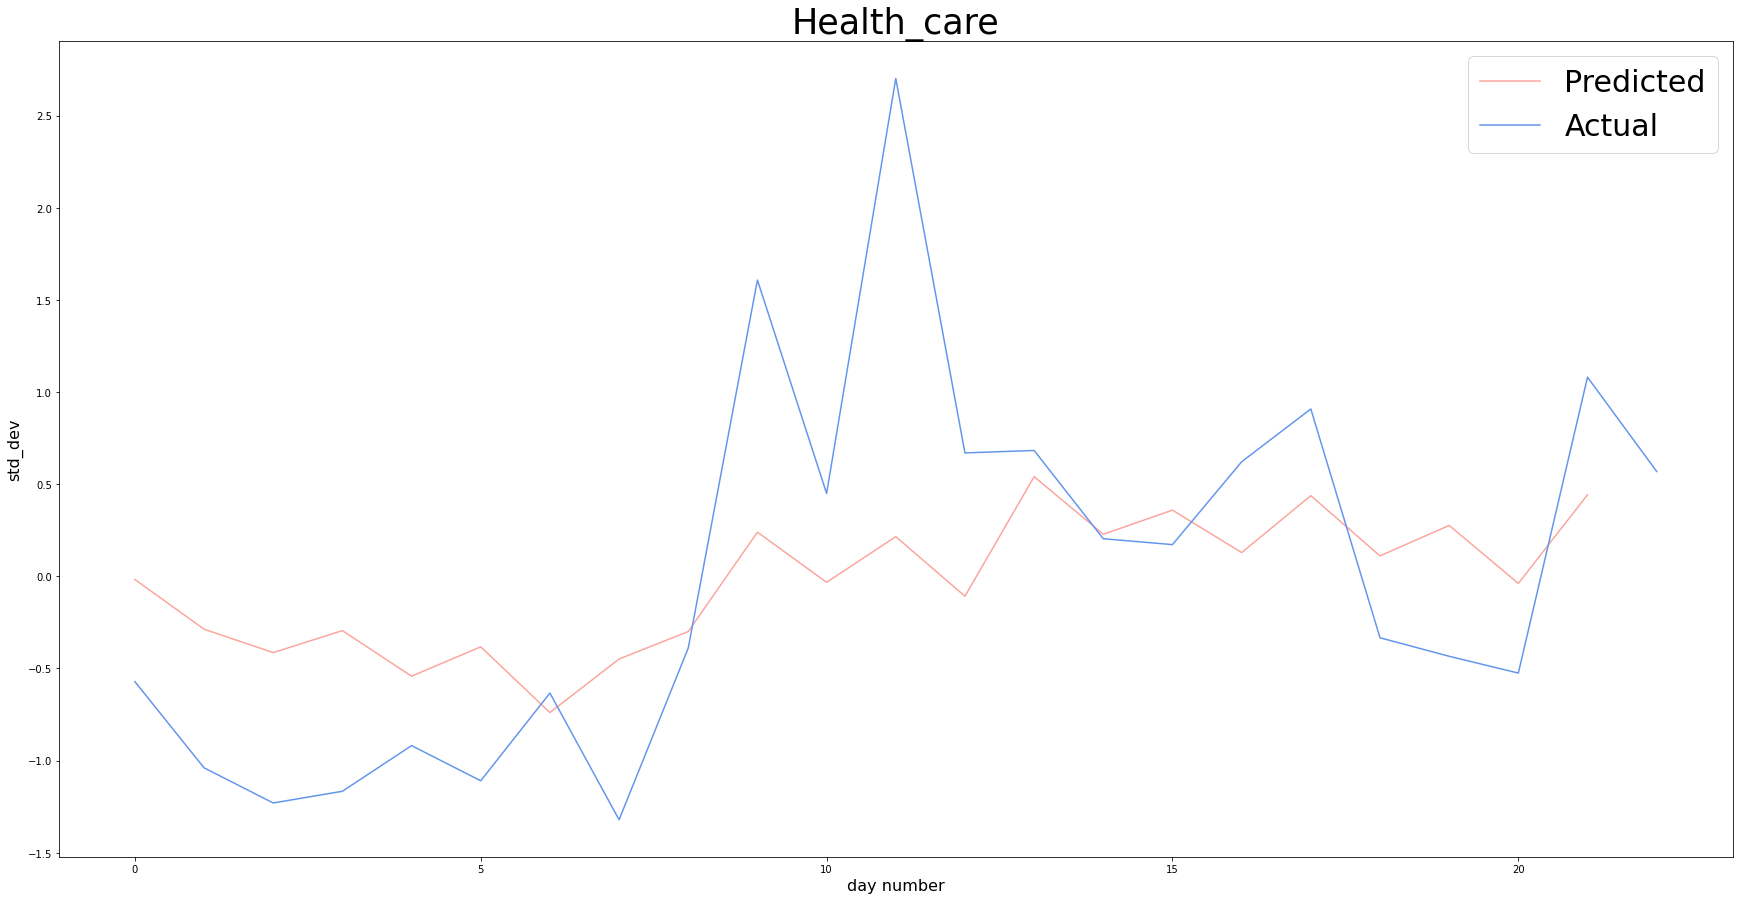

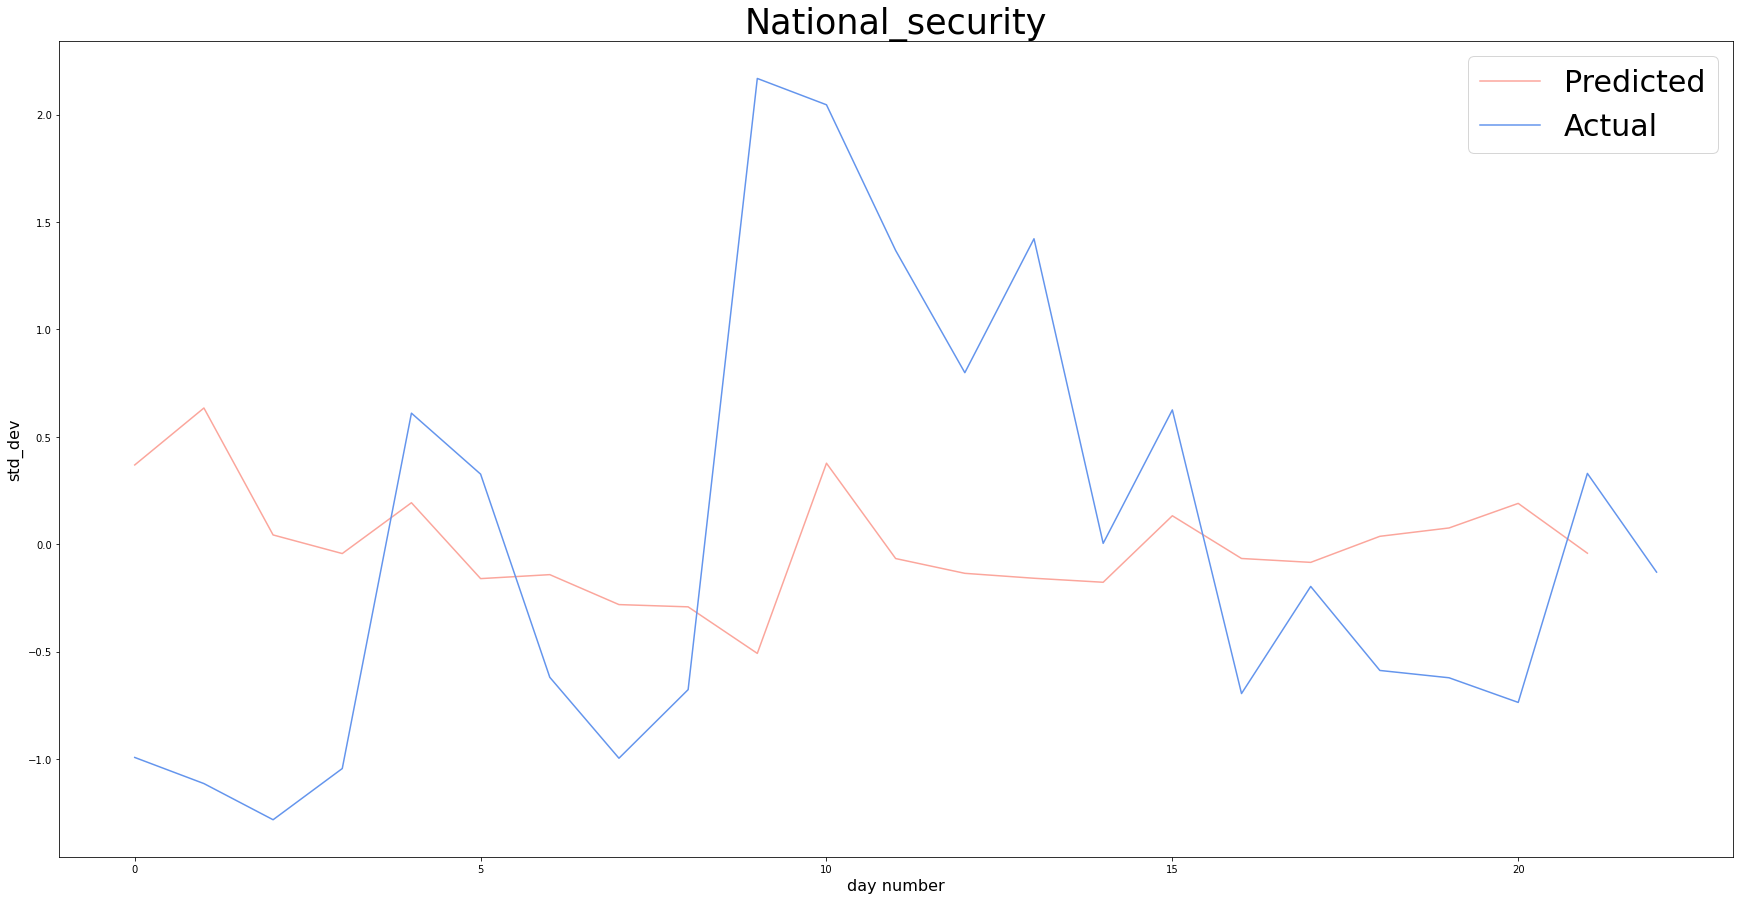

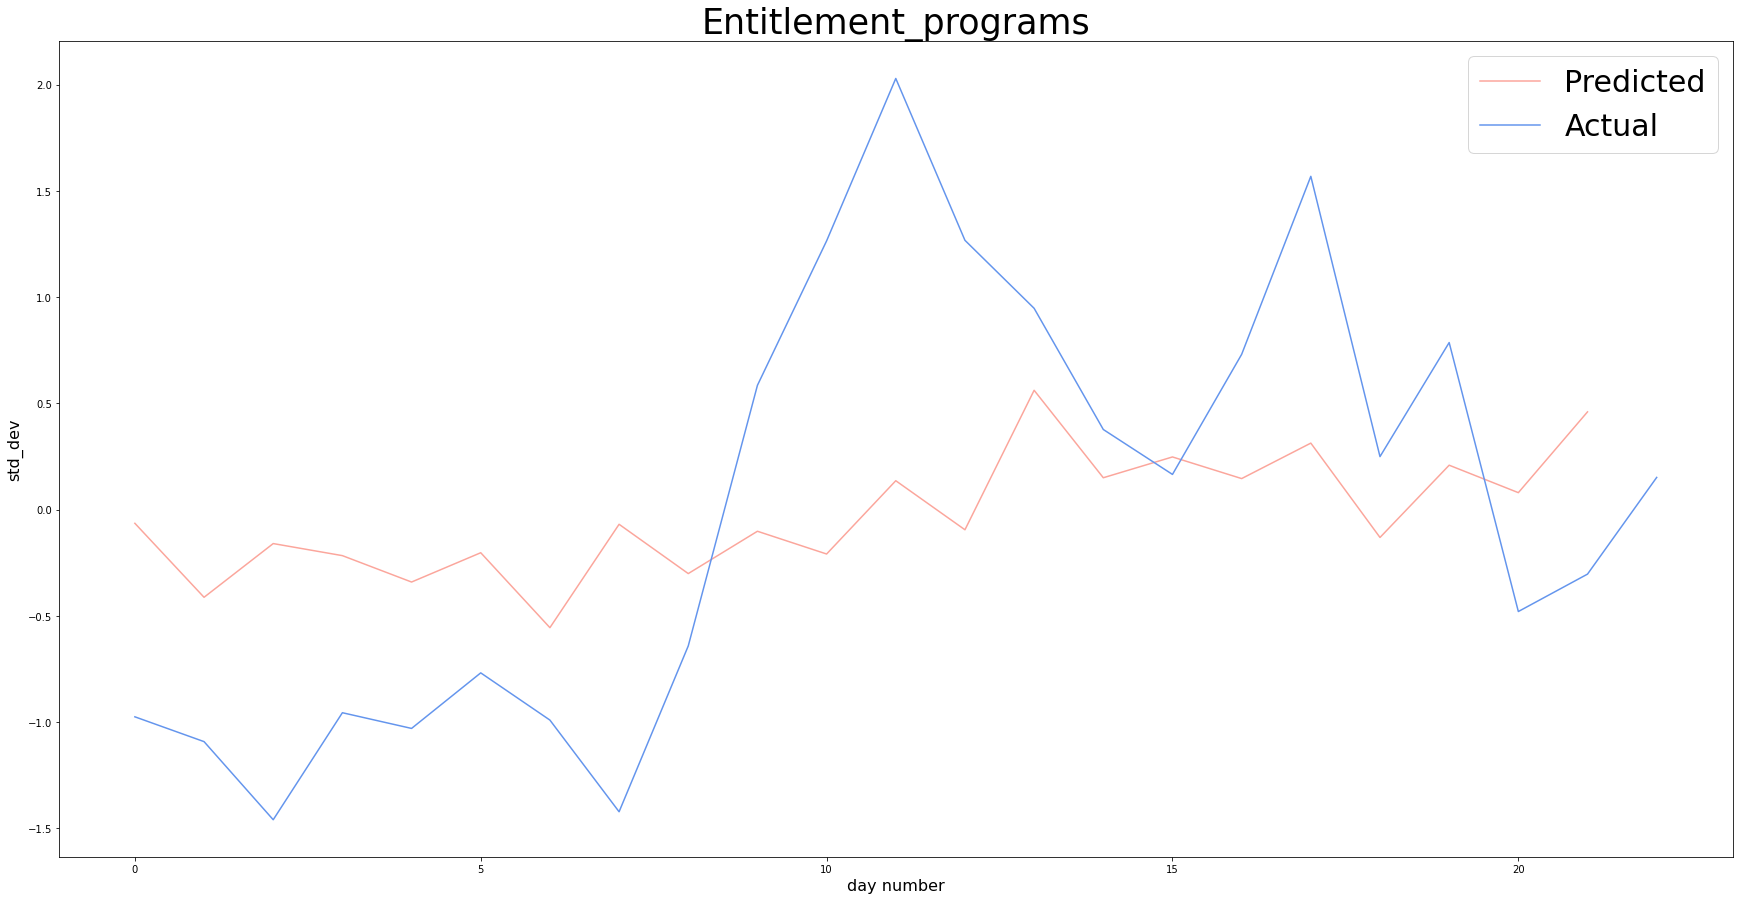

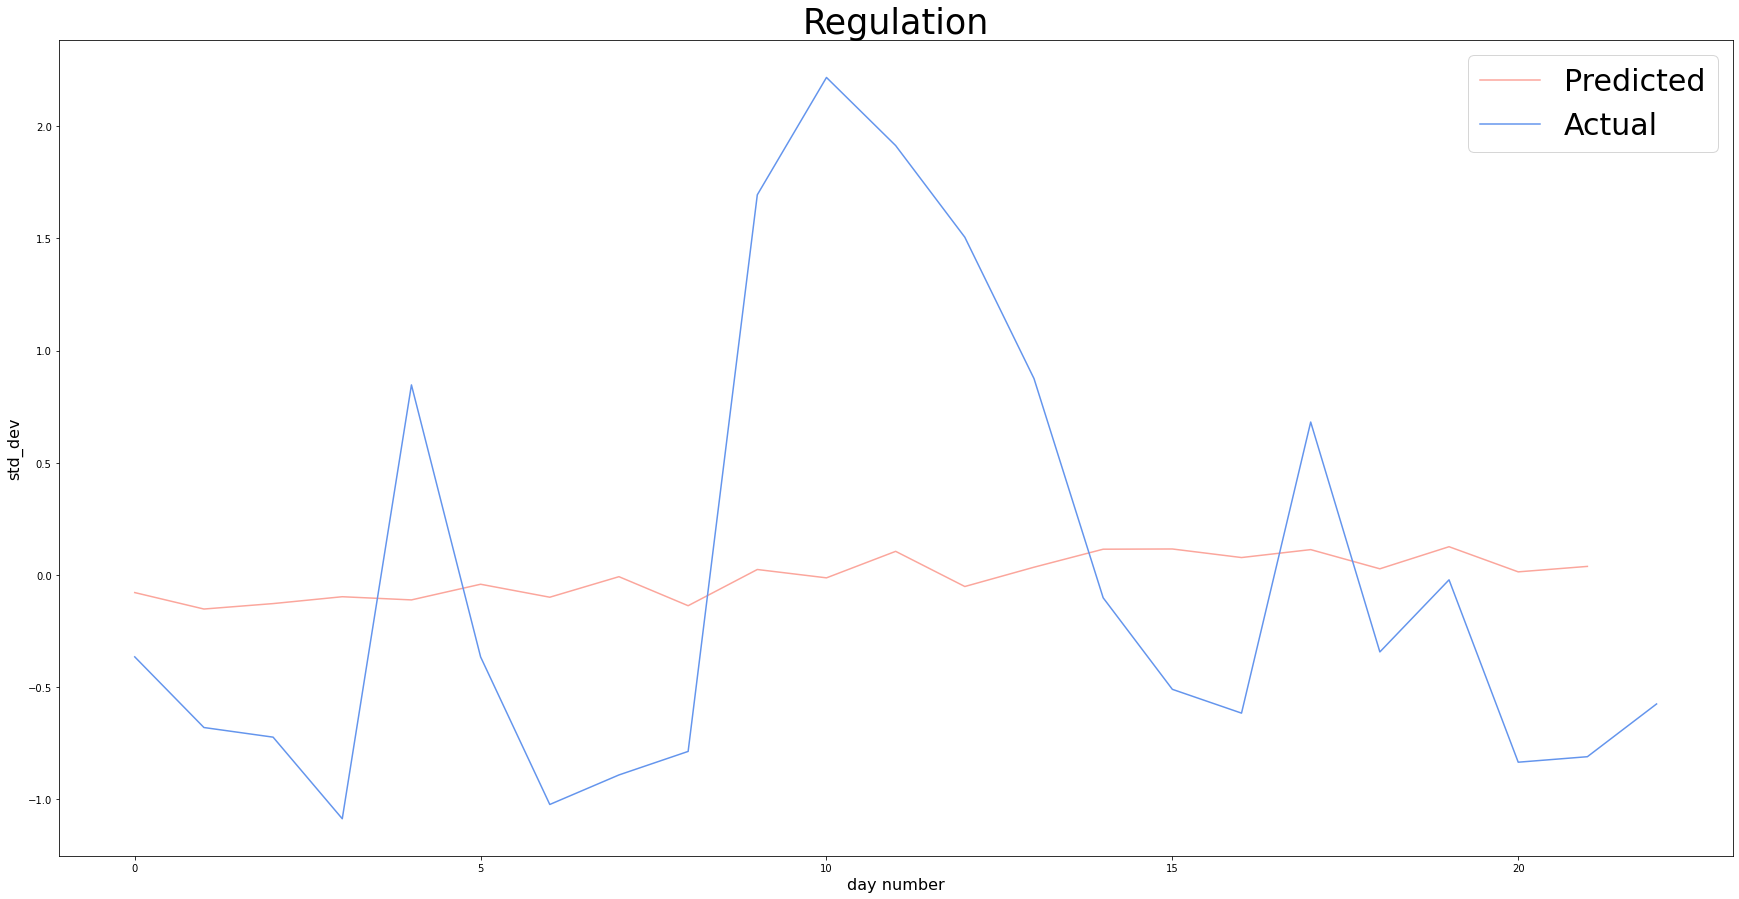

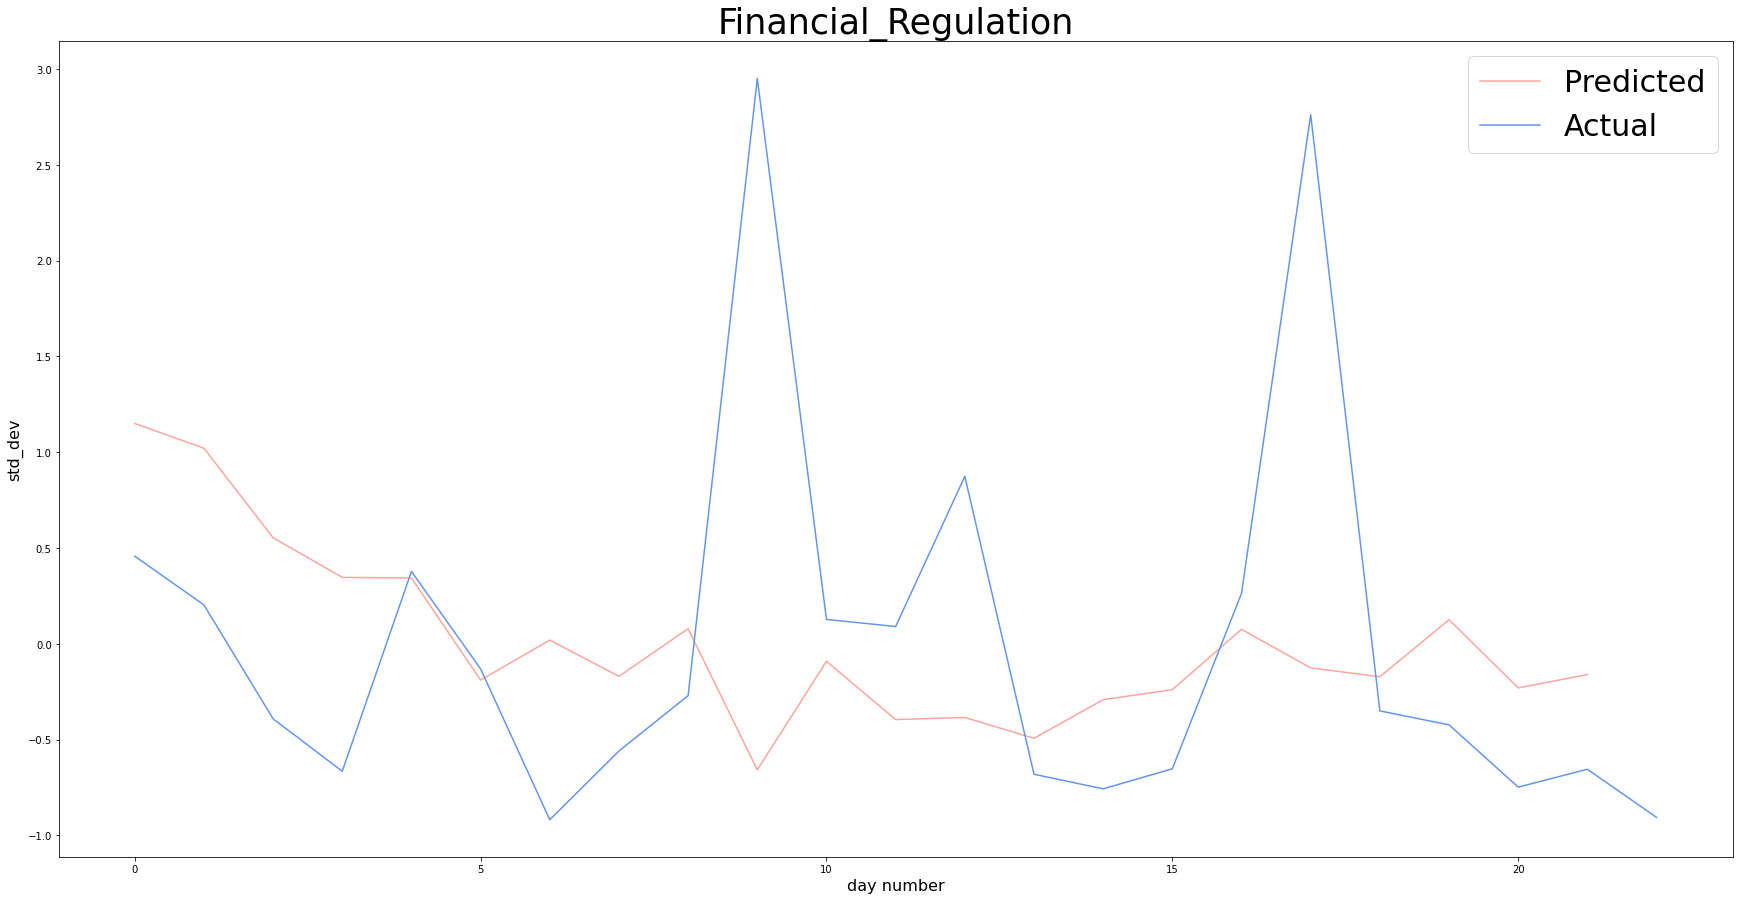

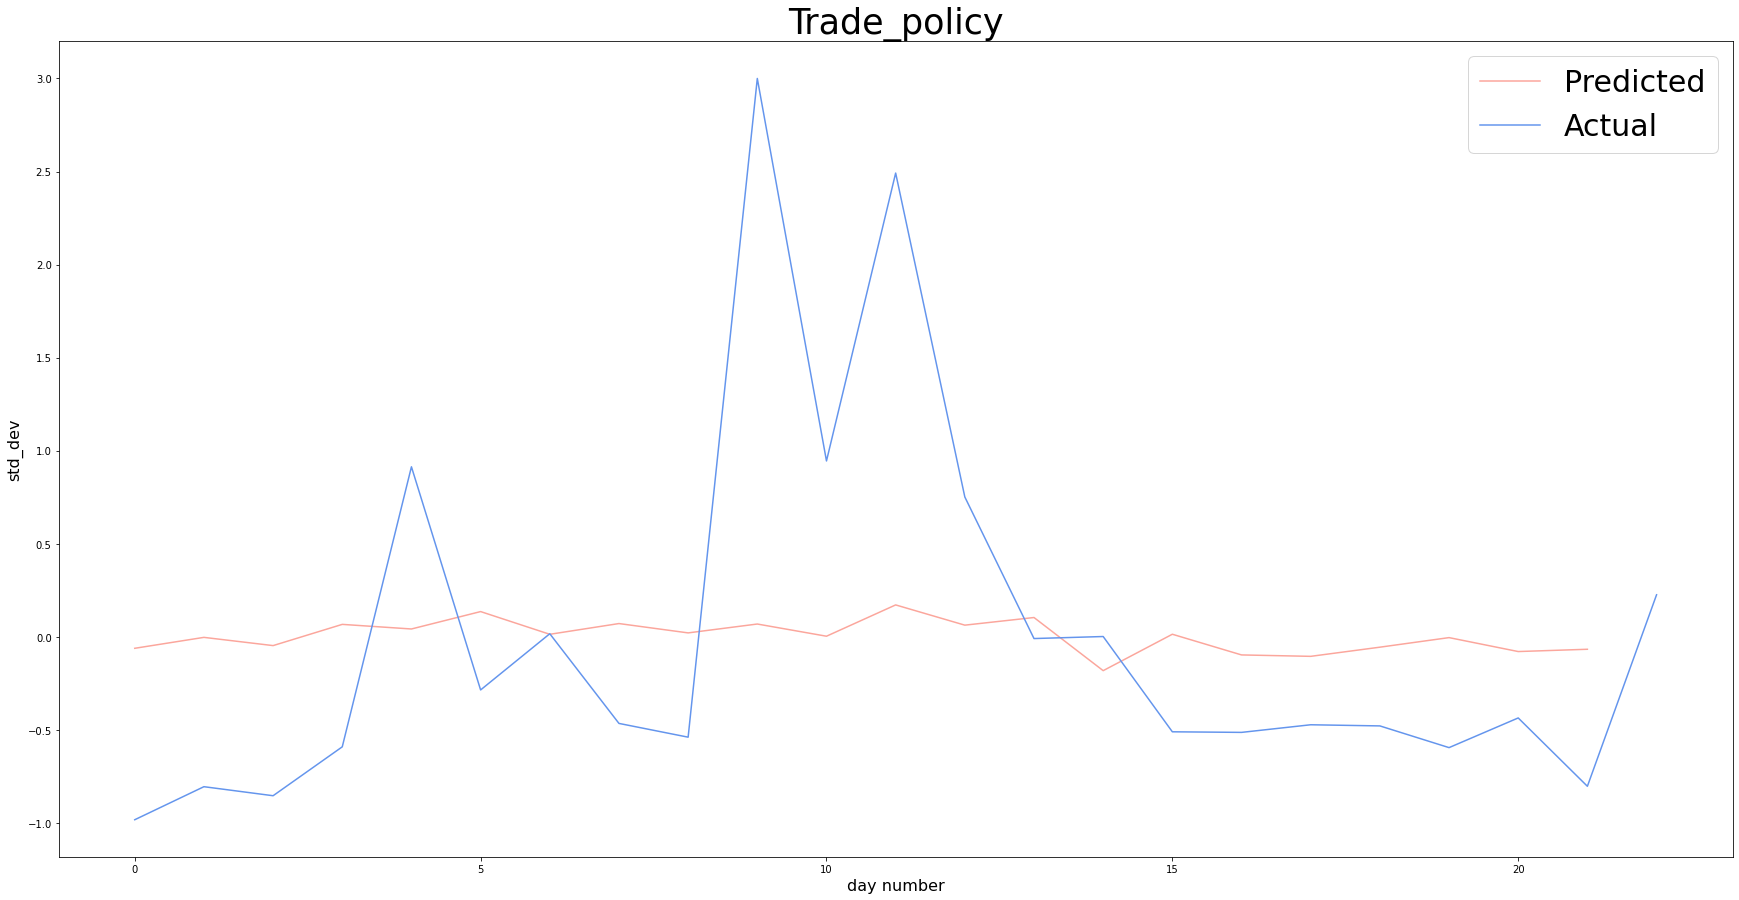

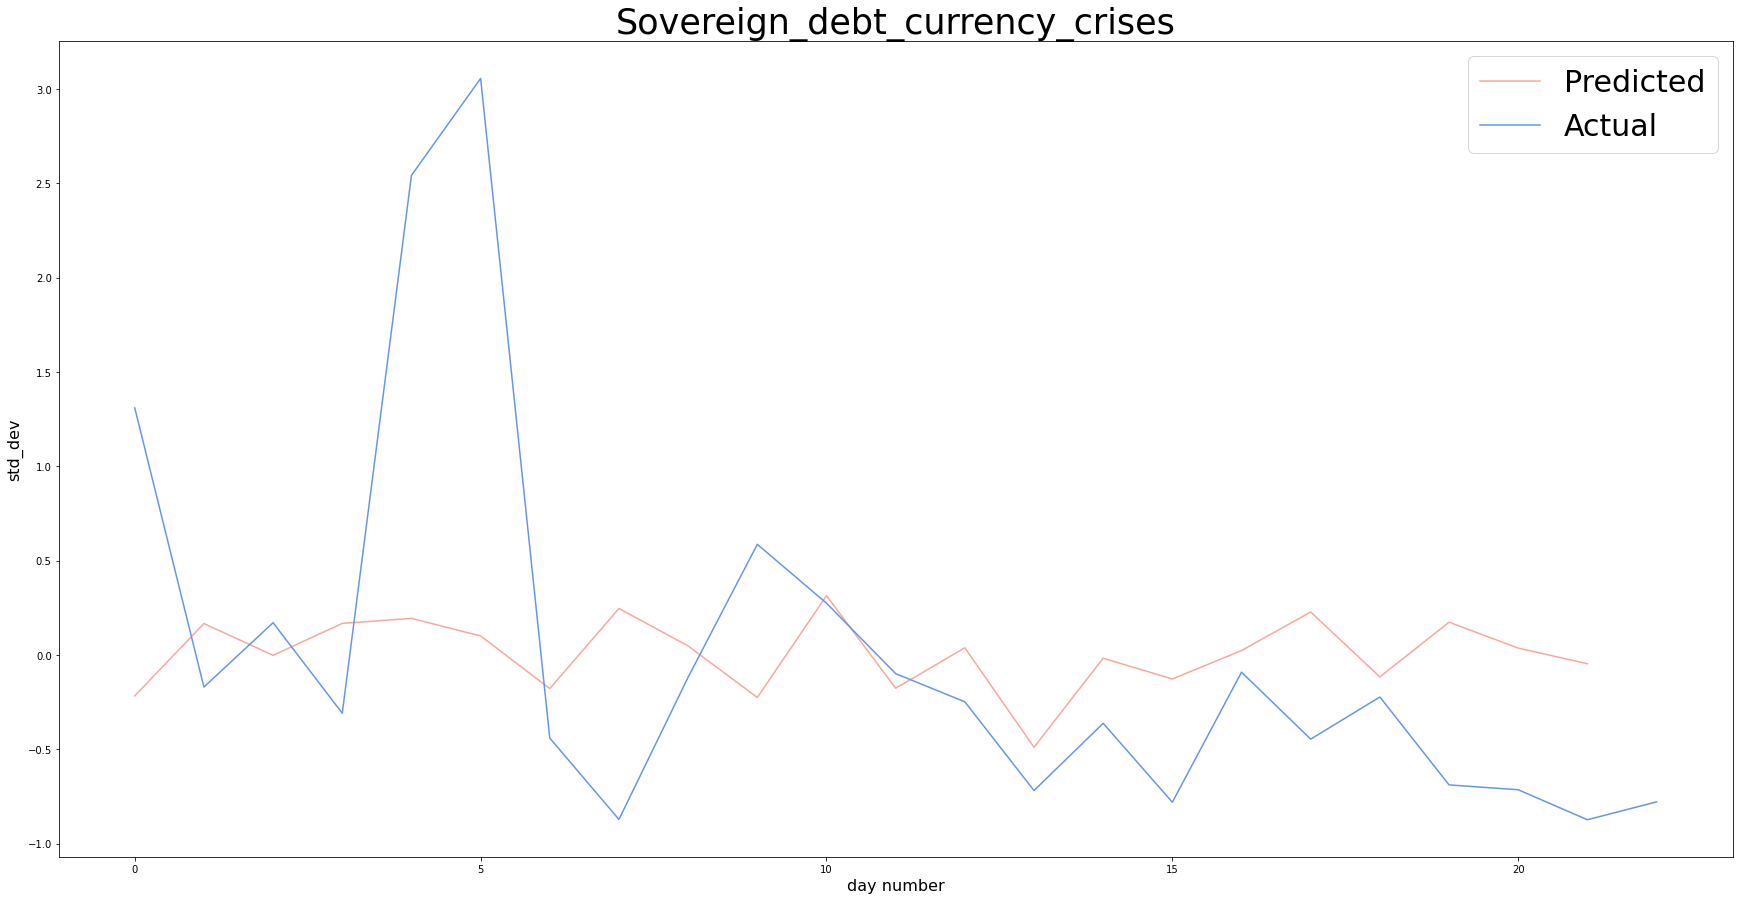

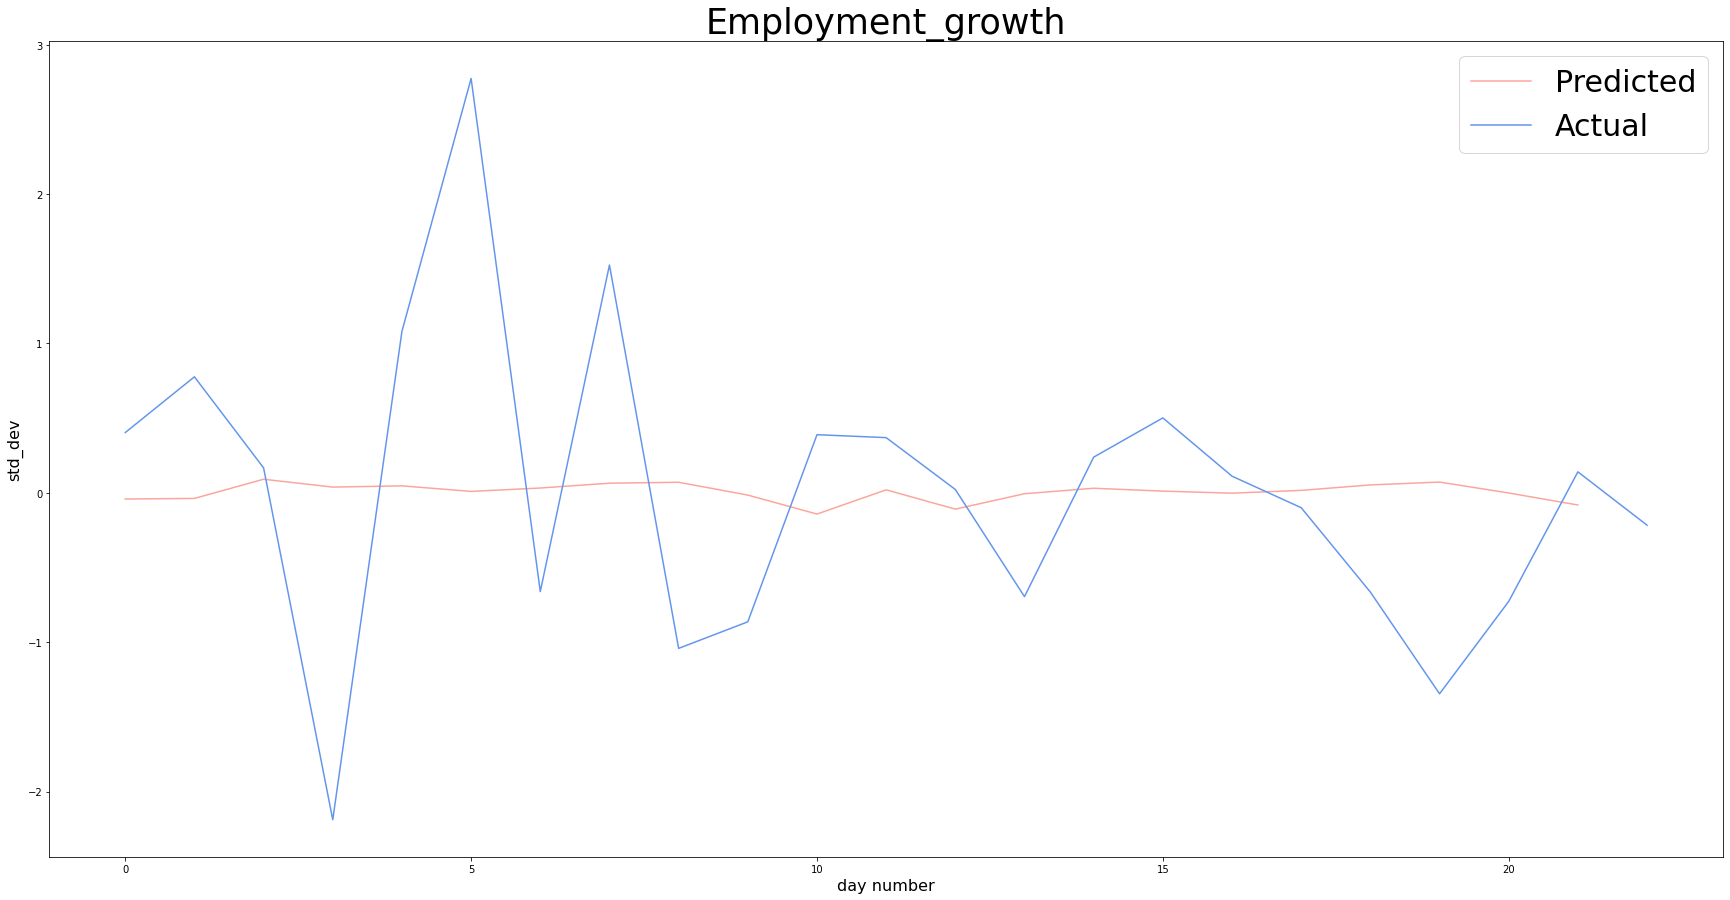

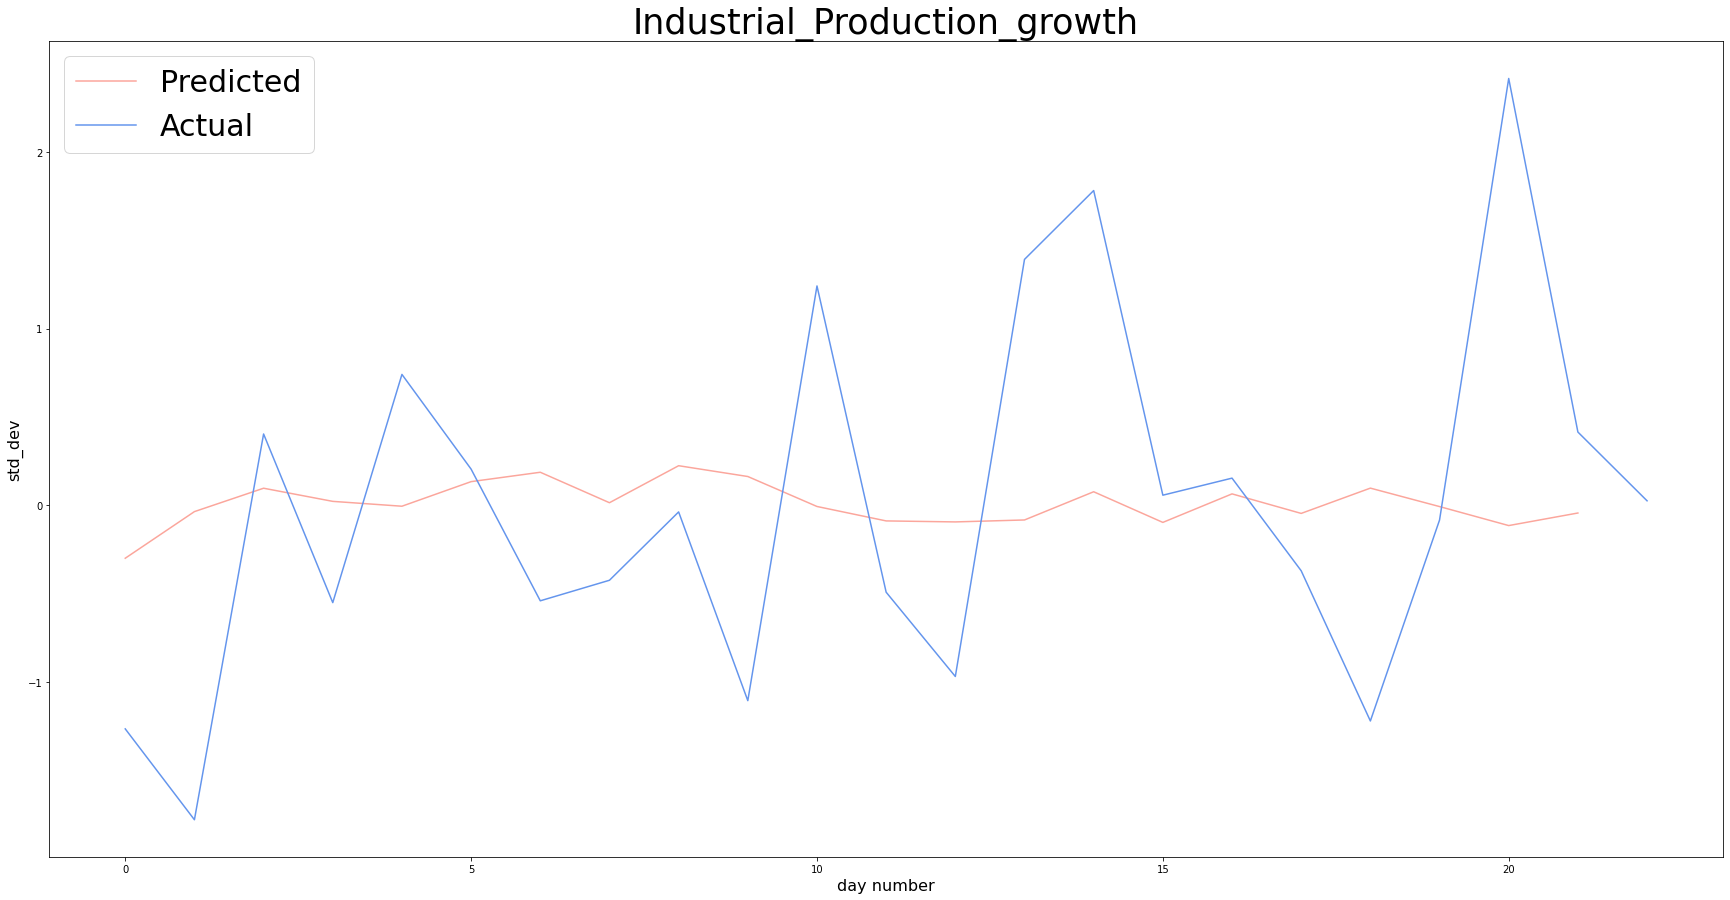

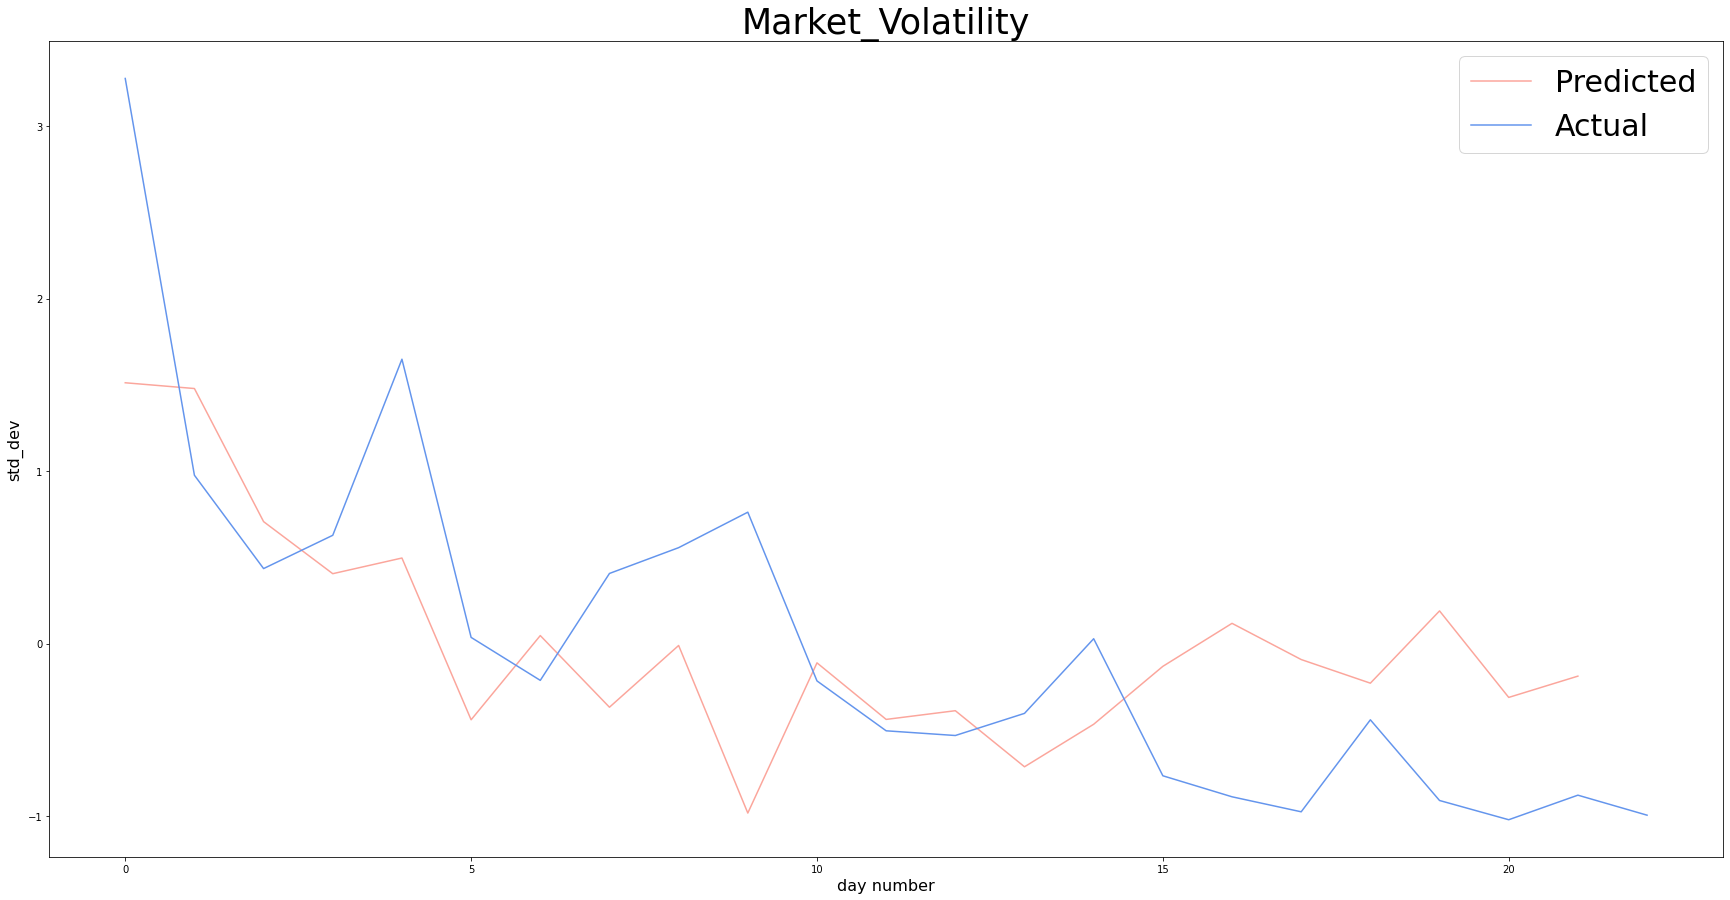

In [1024]:
for i in range(len(keys)):    
    fig, ax = plt.subplots(figsize=(30, 15))
    ax.plot(pred_test[keys[i]][:-1], alpha = 0.7, color = 'salmon', label='Predicted')
    ax.plot(y_test_scaled_dict[keys[i]], alpha = 1, color = 'cornflowerblue', label='Actual')
    ax.legend(fontsize='large', prop={'size': 30})
    ax.set_title(keys[i], fontsize=35)
    ax.set_ylabel('std_dev', fontsize=16)
    ax.set_xlabel('day number', fontsize =16)
    fig.show



In [1038]:
data = [R2_train, R2_test, MSE_train, MSE_test ]
test = pd.DataFrame.from_dict(data).transpose()
test = test.rename(columns = {0: 'R2_train',
           1: 'R2_test',
           2: 'MSE_train',
           3: "MSE_test"})

test
# y_train_scaled_dict = {}
# y_test_scaled_dict = {}
# coefs = {}
# intercepts = {}
# pred_train = {}
# pred_test = {}
# R2_train = {}
# MSE_train = {}
# R2_test = {}
# MSE_test = {}

R2_train   R2_test  MSE_train  MSE_test
Economic_Policy_Uncertainty     0.444823  0.015660   0.555177  0.984340
Monetary_policy                 0.227946 -0.107392   0.772054  1.107392
Fiscal_Policy                   0.413173  0.213897   0.586827  0.786103
Taxes                           0.442393  0.263392   0.557607  0.736608
Government_spending             0.502365  0.225916   0.497635  0.774084
Health_care                     0.480570  0.369256   0.519430  0.630744
National_security               0.385382 -0.171831   0.614618  1.171831
Entitlement_programs            0.388513  0.208571   0.611487  0.791429
Regulation                      0.123955  0.031914   0.876045  0.968086
Financial_Regulation            0.399585 -0.277346   0.600415  1.277346
Trade_policy                    0.115496  0.071070   0.884504  0.928930
Sovereign_debt_currency_crises  0.270470  0.020505   0.729530  0.979495
Employment_growth               0.074409 -0.018862   0.925591  1.018862
Industrial_Production_growth    0.179363 -0.018760   0.820637  1.018760
Market_Volatility               0.615923  0.359021   0.384077  0.640979

# Sentiment Weighting Analysis

In [1072]:
sent_files = ['var_190_sent_scale_V5_DS2_1.csv', 
              'var_190_sent_scale_V5_DS2_2.csv',
              'var_190_sent_scale_V5_DS2_3NEG.csv',
              'var_190_sent_scale_V5_DS2_3POS.csv',
              'var_190_sent_scale_V5_DS2_4NEG.csv',
              'var_190_sent_scale_V5_DS2_4POS.csv']
sent_models = ['sent_1', 'sent_2', 'sent_3NEG', 'sent_3POS', 'sent_4NEG', 'sent4POS']
for i in range(len(sent_files)):
    sent_models[i] = pd.read_csv(sent_files[i])
    sent_models[i] = sent_models[i].drop(['Unnamed: 0', 'VIXCLS'], axis=1)
    date = ['year', 'month']
    sent_models[i]['year_month'] = pd.to_datetime(sent_models[i]['date']).dt.to_period('M')
    sent_models[i] = sent_models[i].groupby('year_month').mean()
    #sent_models[i] = sent_models[i].set_index('date')
    #att_190['year_month'] = pd.to_datetime(att_190['date']).dt.to_period('M')
    #att_190
    #sent_models[i] = sent_models[i].groupby('year_month').mean()
    
sent_models[1]

0         1         2         3         4         5  \
year_month                                                               
2006-01     0.007473  0.003914  0.001250 -0.001250  0.000004  0.009811   
2006-02     0.004194  0.005434  0.000000  0.000000  0.004082  0.013677   
2006-03     0.007091  0.003558  0.001136  0.003498  0.002271  0.005921   
2006-04     0.011437  0.002886  0.004348  0.001389  0.001498  0.010284   
2006-05     0.015467  0.001229  0.004754  0.002460  0.009450  0.011750   
...              ...       ...       ...       ...       ...       ...   
2017-08     0.000000  0.000000  0.001166  0.000000  0.001136 -0.000029   
2017-09     0.000000  0.000000  0.002632  0.001350 -0.001316 -0.001350   
2017-10     0.000000  0.000000  0.000000  0.001874 -0.000031 -0.001474   
2017-11     0.000000  0.000000  0.002442  0.000000  0.003571  0.002411   
2017-12     0.000000  0.000000  0.001350  0.000000  0.001316 -0.002632   

                   6         7         8         9  ...  180  181  182  183  \
year_month                                          ...                       
2006-01     0.014383  0.024917  0.047095  0.009734  ...  0.0  0.0  0.0  0.0   
2006-02     0.016376  0.015026  0.021665  0.008144  ...  0.0  0.0  0.0  0.0   
2006-03     0.011063  0.010953  0.029638  0.019585  ...  0.0  0.0  0.0  0.0   
2006-04     0.008813  0.009942  0.003702  0.035286  ...  0.0  0.0  0.0  0.0   
2006-05     0.004120 -0.001167  0.015420  0.026225  ...  0.0  0.0  0.0  0.0   
...              ...       ...       ...       ...  ...  ...  ...  ...  ...   
2017-08    -0.003497  0.000000  0.012821  0.004516  ...  0.0  0.0  0.0  0.0   
2017-09    -0.003947  0.003947  0.009345  0.002564  ...  0.0  0.0  0.0  0.0   
2017-10     0.003095  0.002473  0.003602  0.017312  ...  0.0  0.0  0.0  0.0   
2017-11     0.004823 -0.000031  0.002564  0.012088  ...  0.0  0.0  0.0  0.0   
2017-12    -0.001350  0.002800  0.006748  0.015958  ...  0.0  0.0  0.0  0.0   

            184  185  186  187  188  189  
year_month                                
2006-01     0.0  0.0  0.0  0.0  0.0  0.0  
2006-02     0.0  0.0  0.0  0.0  0.0  0.0  
2006-03     0.0  0.0  0.0  0.0  0.0  0.0  
2006-04     0.0  0.0  0.0  0.0  0.0  0.0  
2006-05     0.0  0.0  0.0  0.0  0.0  0.0  
...         ...  ...  ...  ...  ...  ...  
2017-08     0.0  0.0  0.0  0.0  0.0  0.0  
2017-09     0.0  0.0  0.0  0.0  0.0  0.0  
2017-10     0.0  0.0  0.0  0.0  0.0  0.0  
2017-11     0.0  0.0  0.0  0.0  0.0  0.0  
2017-12     0.0  0.0  0.0  0.0  0.0  0.0  

[116 rows x 190 columns]

In [1244]:
# print mean sentiment scores

for i in sent_models[0].columns:
    print(i, round(sent_models[0][i].mean()*10000, 2))
    
# topic 46 - had the highest mean sentiment 
# topic 127 - had the lowest mean sentiment

0 1.02
1 10.03
2 -0.69
3 5.59
4 -4.43
5 -0.34
6 3.54
7 19.31
8 18.43
9 1.45
10 0.31
11 9.6
12 1.27
13 0.74
14 7.93
15 0.14
16 38.78
17 -2.38
18 25.7
19 22.35
20 7.81
21 0.84
22 49.69
23 0.44
24 0.19
25 0.43
26 3.0
27 5.92
28 1.01
29 0.44
30 1.78
31 1.85
32 1.18
33 0.44
34 5.97
35 -16.43
36 0.57
37 0.95
38 5.77
39 10.93
40 3.67
41 -10.47
42 4.02
43 -0.48
44 -21.79
45 -4.61
46 64.28
47 0.48
48 0.19
49 9.8
50 -0.82
51 -24.84
52 1.27
53 -12.5
54 0.54
55 3.77
56 0.5
57 0.92
58 16.97
59 -2.1
60 8.72
61 1.97
62 -8.43
63 -2.15
64 4.41
65 16.71
66 0.08
67 7.36
68 0.67
69 1.14
70 1.18
71 0.01
72 0.09
73 23.0
74 0.85
75 24.35
76 13.26
77 24.32
78 1.1
79 1.3
80 23.98
81 50.14
82 1.18
83 6.49
84 1.53
85 -47.36
86 44.62
87 1.1
88 31.34
89 1.04
90 10.36
91 0.15
92 1.96
93 0.63
94 26.44
95 14.67
96 3.82
97 1.32
98 8.34
99 -0.52
100 13.06
101 -47.95
102 58.29
103 0.42
104 -5.37
105 7.43
106 0.07
107 1.88
108 -1.0
109 0.42
110 -16.14
111 1.18
112 0.99
113 1.6
114 -39.38
115 10.37
116 24.82
117 -2.66
118

In [1252]:
pprint(lda190.show_topic(46))
pprint(lda190.show_topic(127))

[('business', 0.05169778),
 ('company', 0.035249285),
 ('help', 0.012922412),
 ('work', 0.01221062),
 ('need', 0.011700196),
 ('people', 0.010282128),
 ('small', 0.009637094),
 ('big', 0.008723003),
 ('want', 0.008454031),
 ('like', 0.00838192)]
[('charge', 0.023819515),
 ('investigation', 0.021103352),
 ('case', 0.019066157),
 ('prosecutor', 0.018398955),
 ('attorney', 0.01600491),
 ('federal', 0.014694064),
 ('lawyer', 0.012554113),
 ('probe', 0.012269194),
 ('allege', 0.011508612),
 ('criminal', 0.011458959)]


## Sent Model 1

### estimate

In [1539]:
tables = []
model = sent_models[0]
train_len = int(len(model)*0.8)
X_train = model.iloc[:train_len]
X_test = model.iloc[train_len+1:]
X_train_scaled = scale(X_train)
X_test_scaled = scale(X_test)

max_features = 10
# choose alphas for each y variable. If no alpha chooses 5 variables, choose the alpha-0.02 that keeps at least 5 variables
alphas = np.arange(0.0, 1, 0.02)

Y_train_scaled = scale(Y_train)
alpha_dict = {}
best_X = {}
for y_var in list(Y_train.columns):
    for alpha in alphas:
        s = SelectFromModel(linear_model.Lasso(alpha=alpha, fit_intercept=False)).fit(X_train_scaled, scale(Y_train[y_var]))
        #print(list(X_train.columns[s.get_support()]))
        if len(X_train.columns[s.get_support()]) == max_features:
            alpha_dict[y_var] = alpha
            best_X[y_var] = X_train.columns[s.get_support()]
            break
        if len(X_train.columns[s.get_support()]) < max_features:
            alpha_dict[y_var] = round(alpha-0.02,2)
            best_X[y_var] = X_train.columns[s.get_support()]
            break

print(alpha_dict)
print(best_X['Market_Volatility'])


# In[1020]:


from pprint import pprint 
selected_vars= {}
for key in best_X:
    print(key)
    print('*'*50)
    selected = []
    for col in best_X[key]:
        selected.append(col)
        topic = int(col)
        print(topic)
        pprint(lda190.show_topic(topic))
        print('-'*50)
    selected_vars[key] = selected

selected_vars


# In[1028]:


#y_pred = model.predict(X_test)
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
#X_train_selected = selector.transform(X_train_scaled)
y_train_scaled_dict = {}
y_test_scaled_dict = {}
coefs = {}
intercepts = {}
pred_train = {}
pred_test = {}
R2_train = {}
MSE_train = {}
R2_test = {}
MSE_test = {}

for key in selected_vars:
    print(key, selected_vars[key])
    X_train_selected = scale(X_train[selected_vars[key]])
    X_test_selected = scale(X_test[selected_vars[key]])
    y_train_scaled = scale(Y_train[key])
    y_test_scaled = scale(Y_test[key])
    y_train_scaled_dict[key] = y_train_scaled
    y_test_scaled_dict[key] = y_test_scaled
    Lasso = linear_model.Lasso(alpha=alpha_dict[key]) # , fit_intercept=False
    print(alpha_dict[key])
    Lasso.fit(X_train_selected, y_train_scaled)
    coefs[key] = Lasso.coef_
    intercepts[key] = Lasso.intercept_
    y_pred_train = Lasso.predict(X_train_selected)
    y_pred_test = Lasso.predict(X_test_selected)
    pred_train[key] = y_pred_train
    pred_test[key] = y_pred_test
    R2_train[key] = Lasso.score(X_train_selected, y_train_scaled)
    R2_test[key] = Lasso.score(X_test_selected, y_test_scaled)
    MSE_train[key] = mean_squared_error(y_pred_train, y_train_scaled)
    MSE_test[key] = mean_squared_error(y_pred_test, y_test_scaled)
    
    # Create Latex Table
    if R2_test[key] > 0.2:
        print('y')
        regression_table = fr''' 
        
        \begin{{table}}[!htbp]
        \centering
        \caption{key.replace('_', ' ')}
        \label{{Replication Results}}
        \begin{{tabular}}{{lll}}
        \toprule
        Topics &     coefs \\
        \midrule
        {topics190[int(selected_vars[key][0])].replace('_', ' ')} &  {round(coefs[key][0], 3)} \\
        {topics190[int(selected_vars[key][1])].replace('_', ' ')} &  {round(coefs[key][1], 3)} \\ 
        {topics190[int(selected_vars[key][2])].replace('_', ' ')} &  {round(coefs[key][2], 3)} \\
        {topics190[int(selected_vars[key][3])].replace('_', ' ')} &  {round(coefs[key][3], 3)} \\
        {topics190[int(selected_vars[key][4])].replace('_', ' ')} &  {round(coefs[key][4], 3)} \\
        {topics190[int(selected_vars[key][5])].replace('_', ' ')} &  {round(coefs[key][5], 3)} \\
        {topics190[int(selected_vars[key][6])].replace('_', ' ')} &  {round(coefs[key][6], 3)} \\
        {topics190[int(selected_vars[key][7])].replace('_', ' ')} &  {round(coefs[key][7], 3)} \\
        {topics190[int(selected_vars[key][8])].replace('_', ' ')} &  {round(coefs[key][8], 3)} \\
        
        \bottomrule
        R^2_{{train}} & {round(R2_train[key], 3)}  \\
        R^2_{{test}} & {round(R2_test[key] , 3)} 
        \end{{tabular}}
        \end{{table}}'''
        
        
        tables.append(regression_table)

data = [R2_train, R2_test, MSE_train, MSE_test]
sent_1 = pd.DataFrame.from_dict(data).transpose()
sent_1 = sent_1.rename(
    columns = {0: 'R2_train',
               1: 'R2_test',
               2: 'MSE_train',
               3: "MSE_test",
                                            
                                 })
sent_1

{'Economic_Policy_Uncertainty': 0.14, 'Monetary_policy': 0.14, 'Fiscal_Policy': 0.12, 'Taxes': 0.14, 'Government_spending': 0.12, 'Health_care': 0.12, 'National_security': 0.14, 'Entitlement_programs': 0.12, 'Regulation': 0.12, 'Financial_Regulation': 0.14, 'Trade_policy': 0.12, 'Sovereign_debt_currency_crises': 0.1, 'Employment_growth': 0.14, 'Industrial_Production_growth': 0.1, 'Market_Volatility': 0.1}
Index(['26', '27', '28', '34', '80', '86', '90', '101', '102', '114', '118',
       '120', '133', '134', '135', '137', '148', '150', '158'],
      dtype='object')
Economic_Policy_Uncertainty
**************************************************
7
[('stock', 0.08206098),
 ('index', 0.033659425),
 ('year', 0.02933794),
 ('gain', 0.025915964),
 ('rise', 0.024480628),
 ('point', 0.020199966),
 ('average', 0.019110337),
 ('investor', 0.018500417),
 ('high', 0.01693247),
 ('market', 0.016391676)]
--------------------------------------------------
27
[('music', 0.11451691),
 ('song', 0.04022803

R2_train   R2_test  MSE_train  MSE_test
Economic_Policy_Uncertainty     0.495412  0.040288   0.504588  0.959712
Monetary_policy                 0.430423  0.127513   0.569577  0.872487
Fiscal_Policy                   0.559182  0.180623   0.440818  0.819377
Taxes                           0.500480  0.196811   0.499520  0.803189
Government_spending             0.516279  0.127735   0.483721  0.872265
Health_care                     0.601214  0.078839   0.398786  0.921161
National_security               0.394395  0.023835   0.605605  0.976165
Entitlement_programs            0.594355  0.223263   0.405645  0.776737
Regulation                      0.550728 -0.020328   0.449272  1.020328
Financial_Regulation            0.383244 -0.039033   0.616756  1.039033
Trade_policy                    0.466475  0.050993   0.533525  0.949007
Sovereign_debt_currency_crises  0.585077  0.017245   0.414923  0.982755
Employment_growth               0.361718 -0.097189   0.638282  1.097189
Industrial_Production_growth    0.566696  0.065271   0.433304  0.934729
Market_Volatility               0.677896  0.559537   0.322104  0.440463

In [1496]:
for table in tables: print(table)
#print(sent_1['Coefs'].loc['Market_Volatility'])

 
        
        \begin{table}[!htbp]
        \centering
        \captionEntitlement programs
        \label{Replication Results}
        \begin{tabular}{lll}
        \toprule
        Topics &     coefs \\
        \midrule
        international trade &  0.041 \\
        corporate executives &  -0.072 \\ 
        housing market &  0.116 \\
        corporations &  -0.163 \\
        time &  -0.1 \\
        europe &  -0.144 \\
        film industry &  0.136 \\
        government budget &  -0.047 \\
        credit cards &  -0.02 \\
        
        \bottomrule
        R^2_{train} & 0.495  \\
        R^2_{test} & 0.268 
        \end{tabular}
        \end{table}
 
        
        \begin{table}[!htbp]
        \centering
        \captionMarket Volatility
        \label{Replication Results}
        \begin{tabular}{lll}
        \toprule
        Topics &     coefs \\
        \midrule
        real estate market &  -0.067 \\
        market capitalization &  -0.167 \\ 
        company market inter

In [1488]:
print(sent_1.to_latex())

\begin{tabular}{lrrrr}
\toprule
{} &  R2\_train &   R2\_test &  MSE\_train &  MSE\_test \\
\midrule
Economic\_Policy\_Uncertainty    &  0.384743 &  0.083543 &   0.615257 &  0.916457 \\
Monetary\_policy                &  0.288240 &  0.035117 &   0.711760 &  0.964883 \\
Fiscal\_Policy                  &  0.390686 &  0.136459 &   0.609314 &  0.863541 \\
Taxes                          &  0.357330 &  0.164948 &   0.642670 &  0.835052 \\
Government\_spending            &  0.431728 &  0.118194 &   0.568272 &  0.881806 \\
Health\_care                    &  0.417006 &  0.075195 &   0.582994 &  0.924805 \\
National\_security              &  0.287030 & -0.035553 &   0.712970 &  1.035553 \\
Entitlement\_programs           &  0.494734 &  0.267758 &   0.505266 &  0.732242 \\
Regulation                     &  0.334446 &  0.005711 &   0.665554 &  0.994289 \\
Financial\_Regulation           &  0.203811 &  0.013387 &   0.796189 &  0.986613 \\
Trade\_policy                   &  0.246006 &  0.029056 &   0

### Plot Sent model 1 Training Predictions

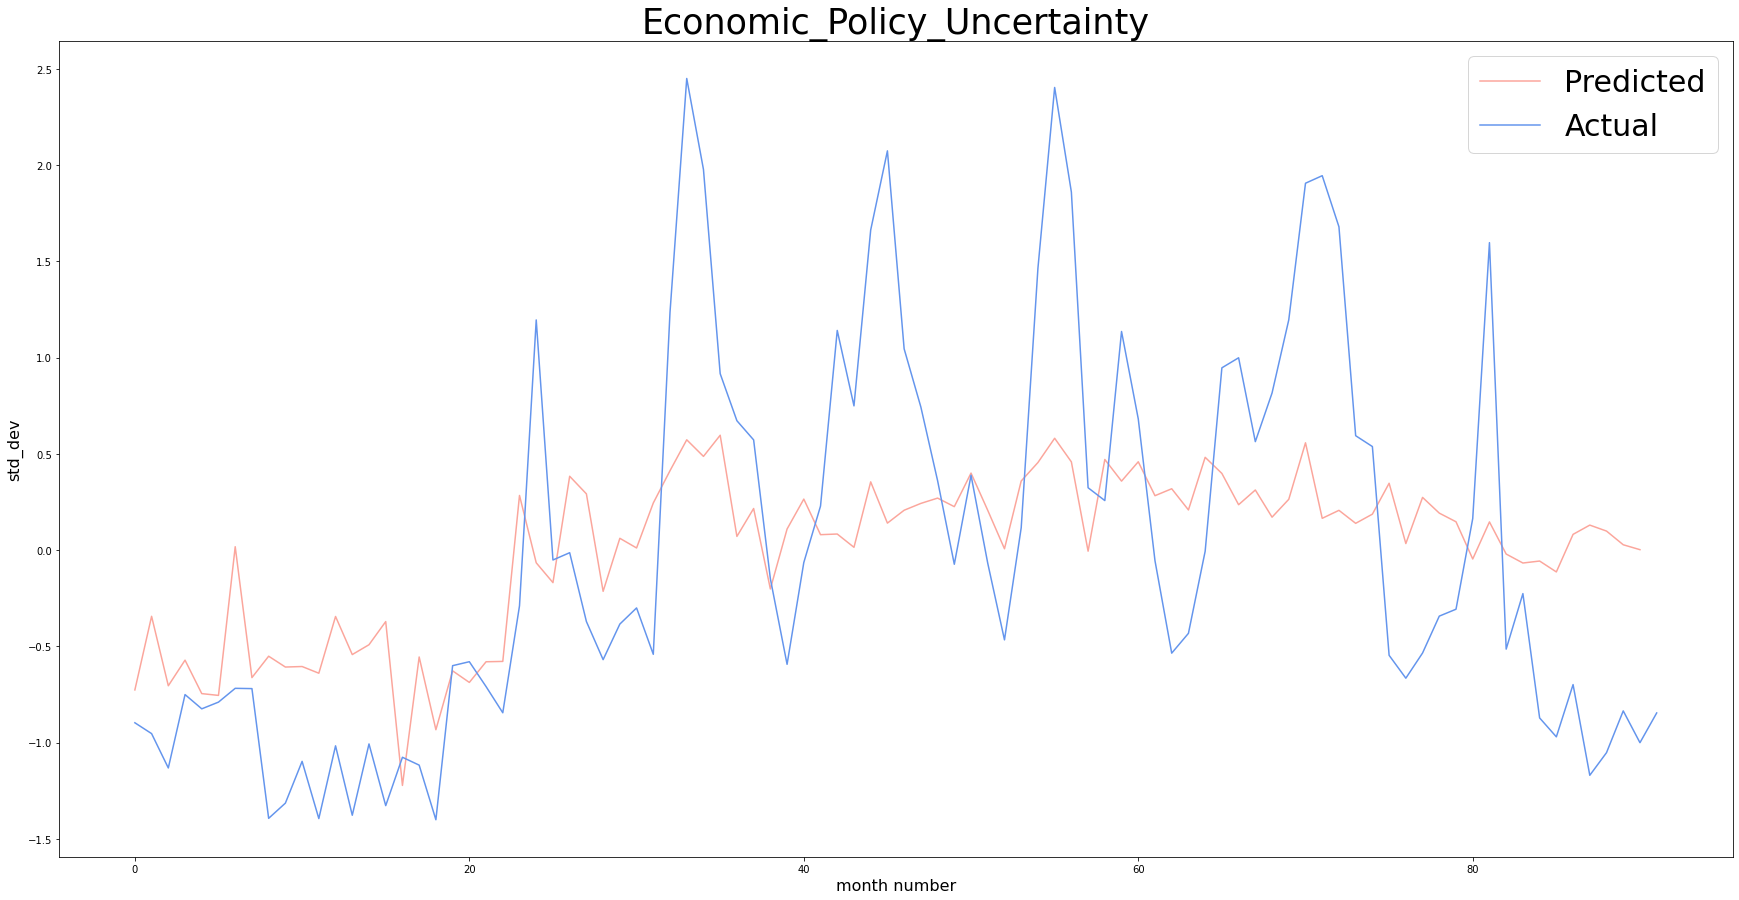

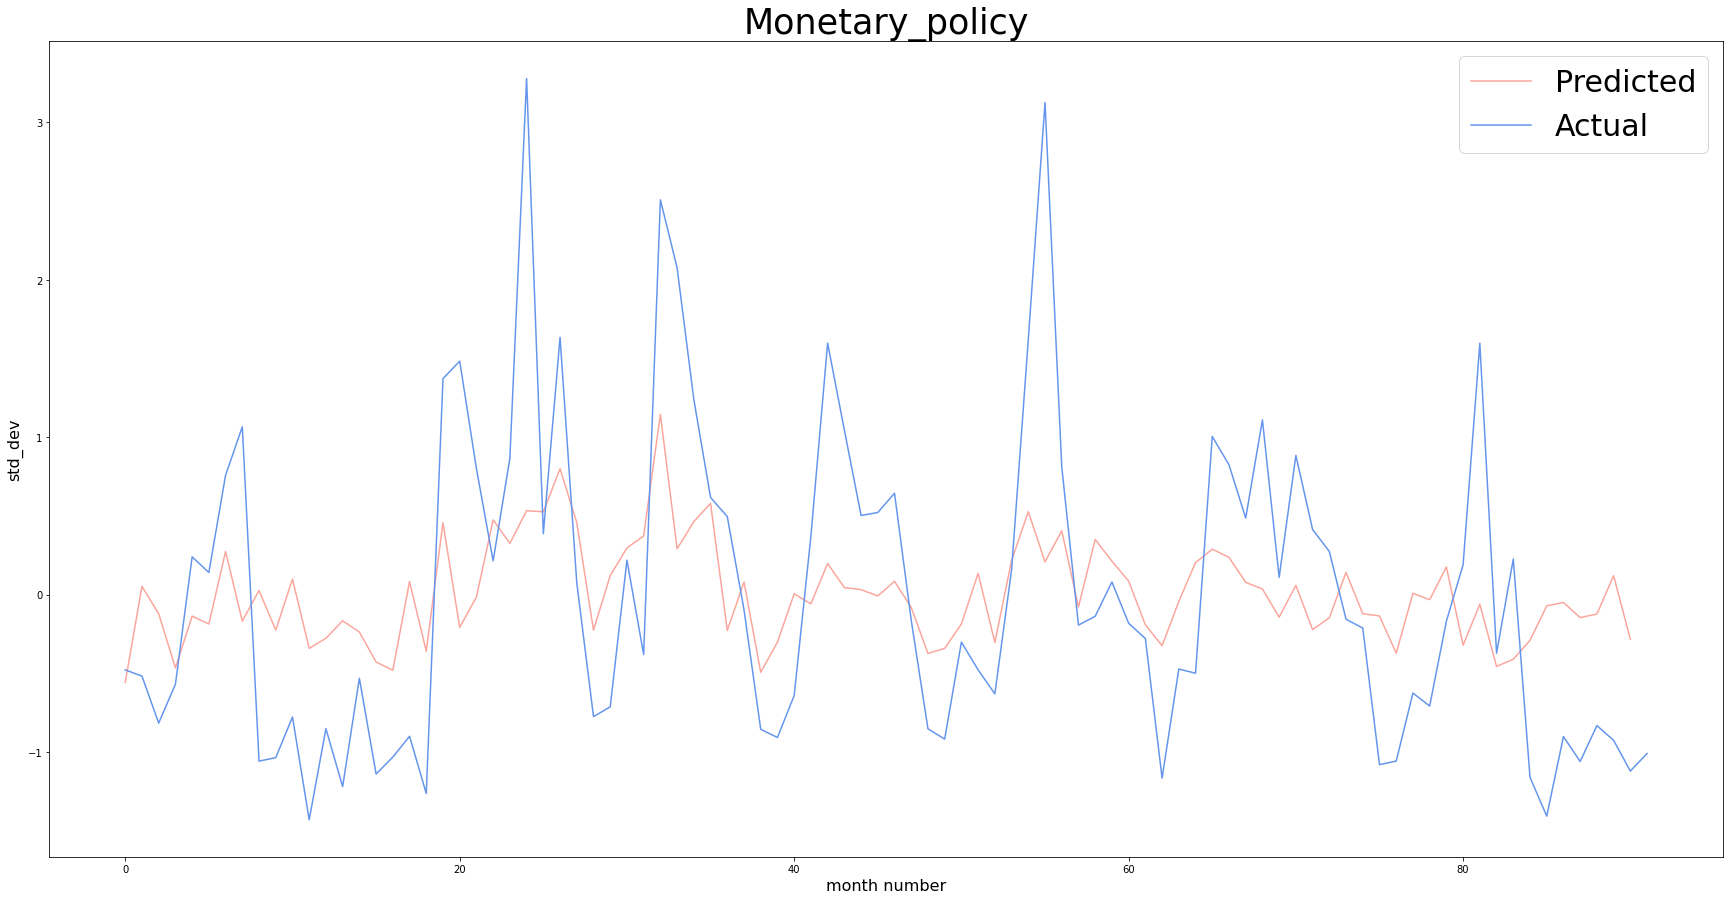

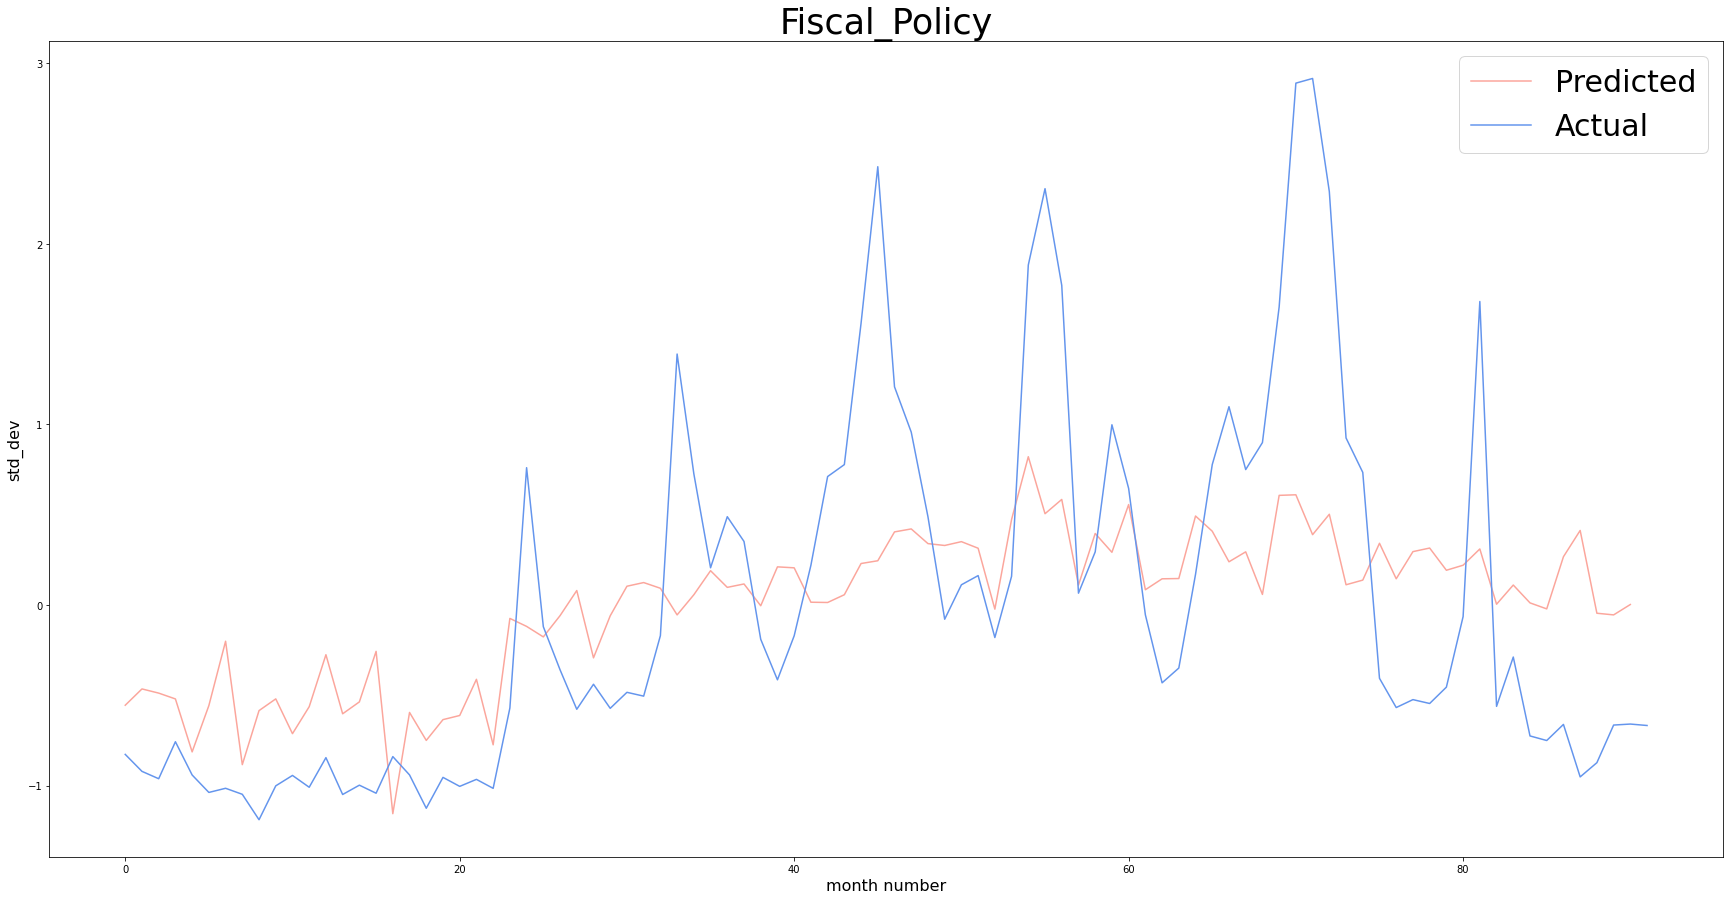

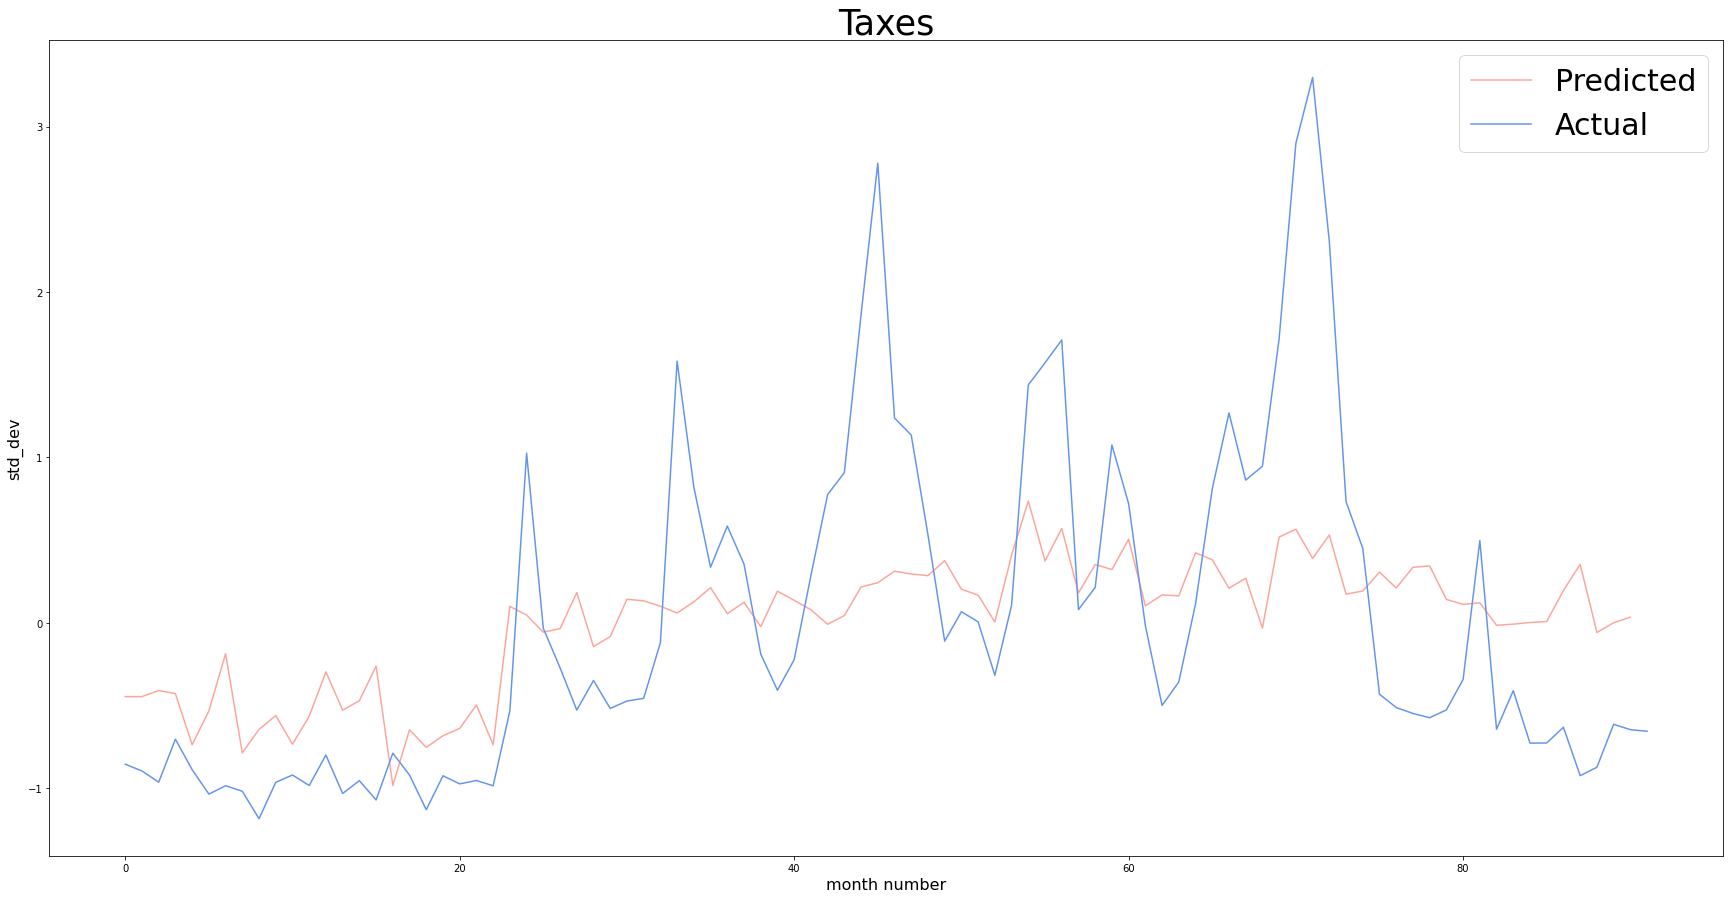

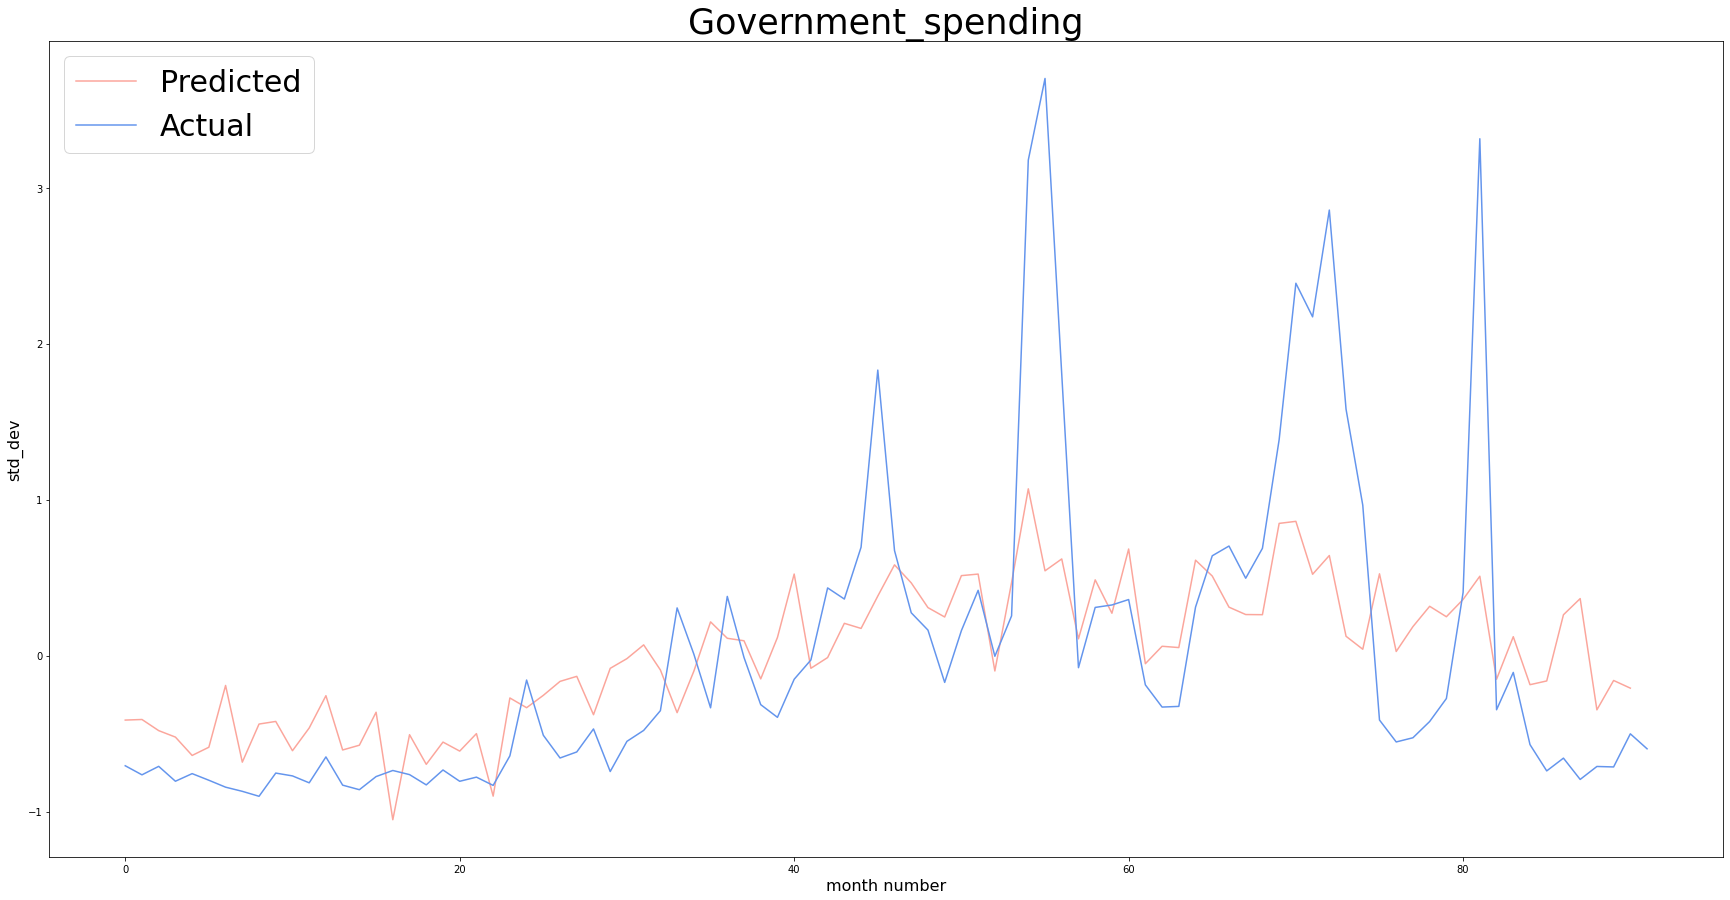

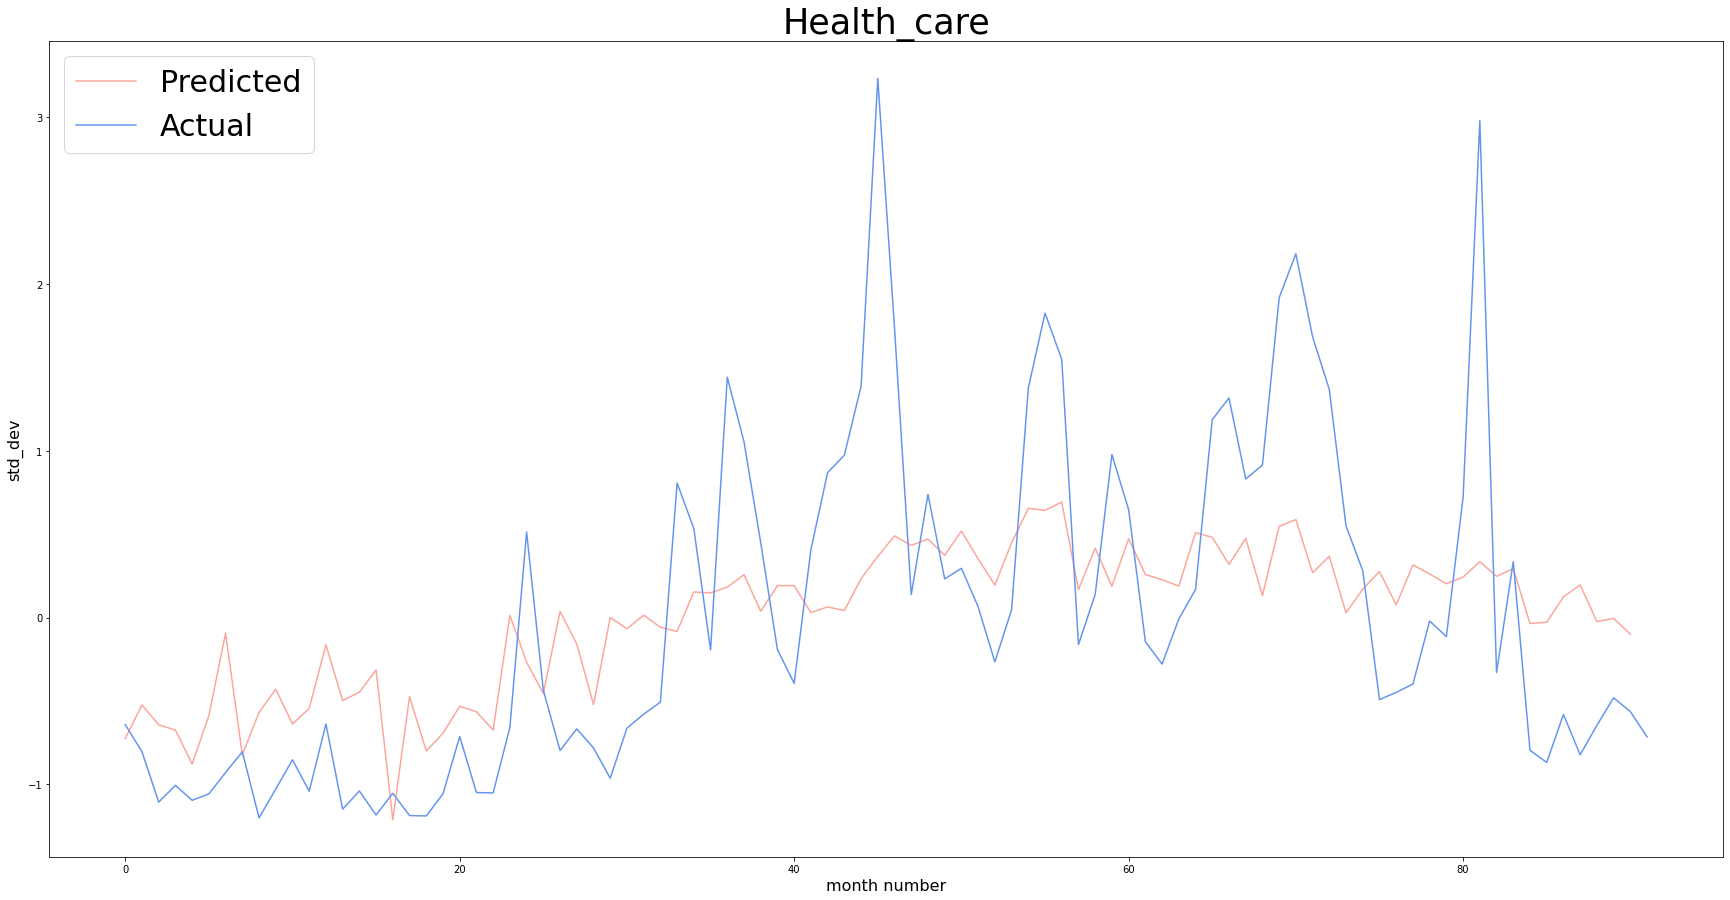

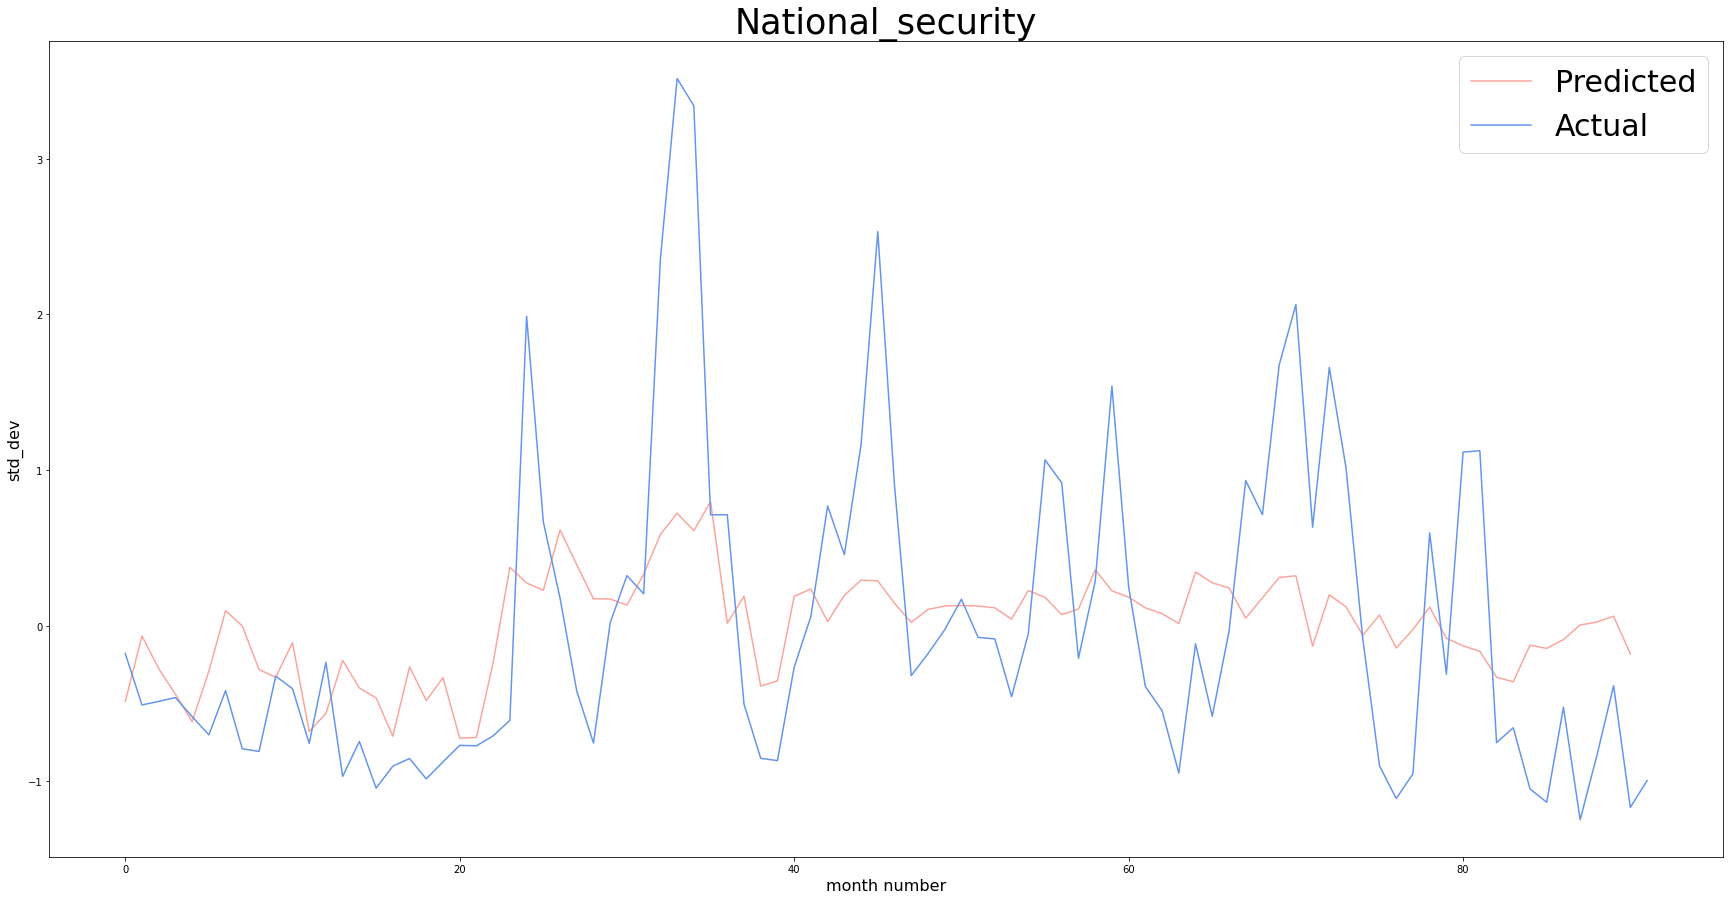

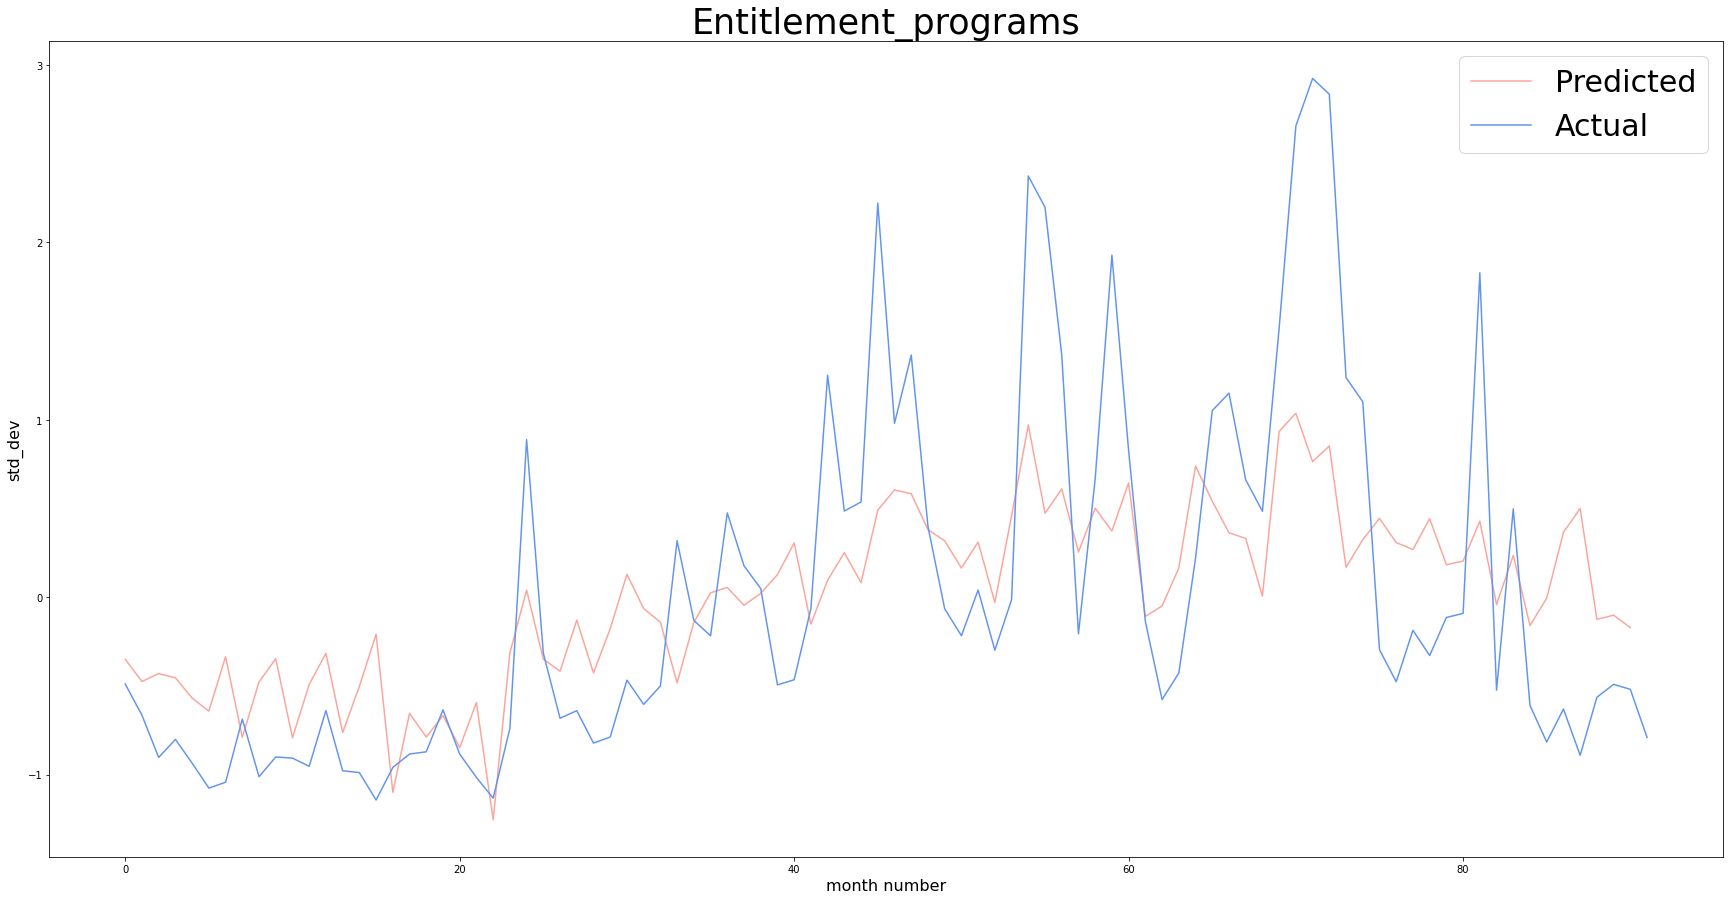

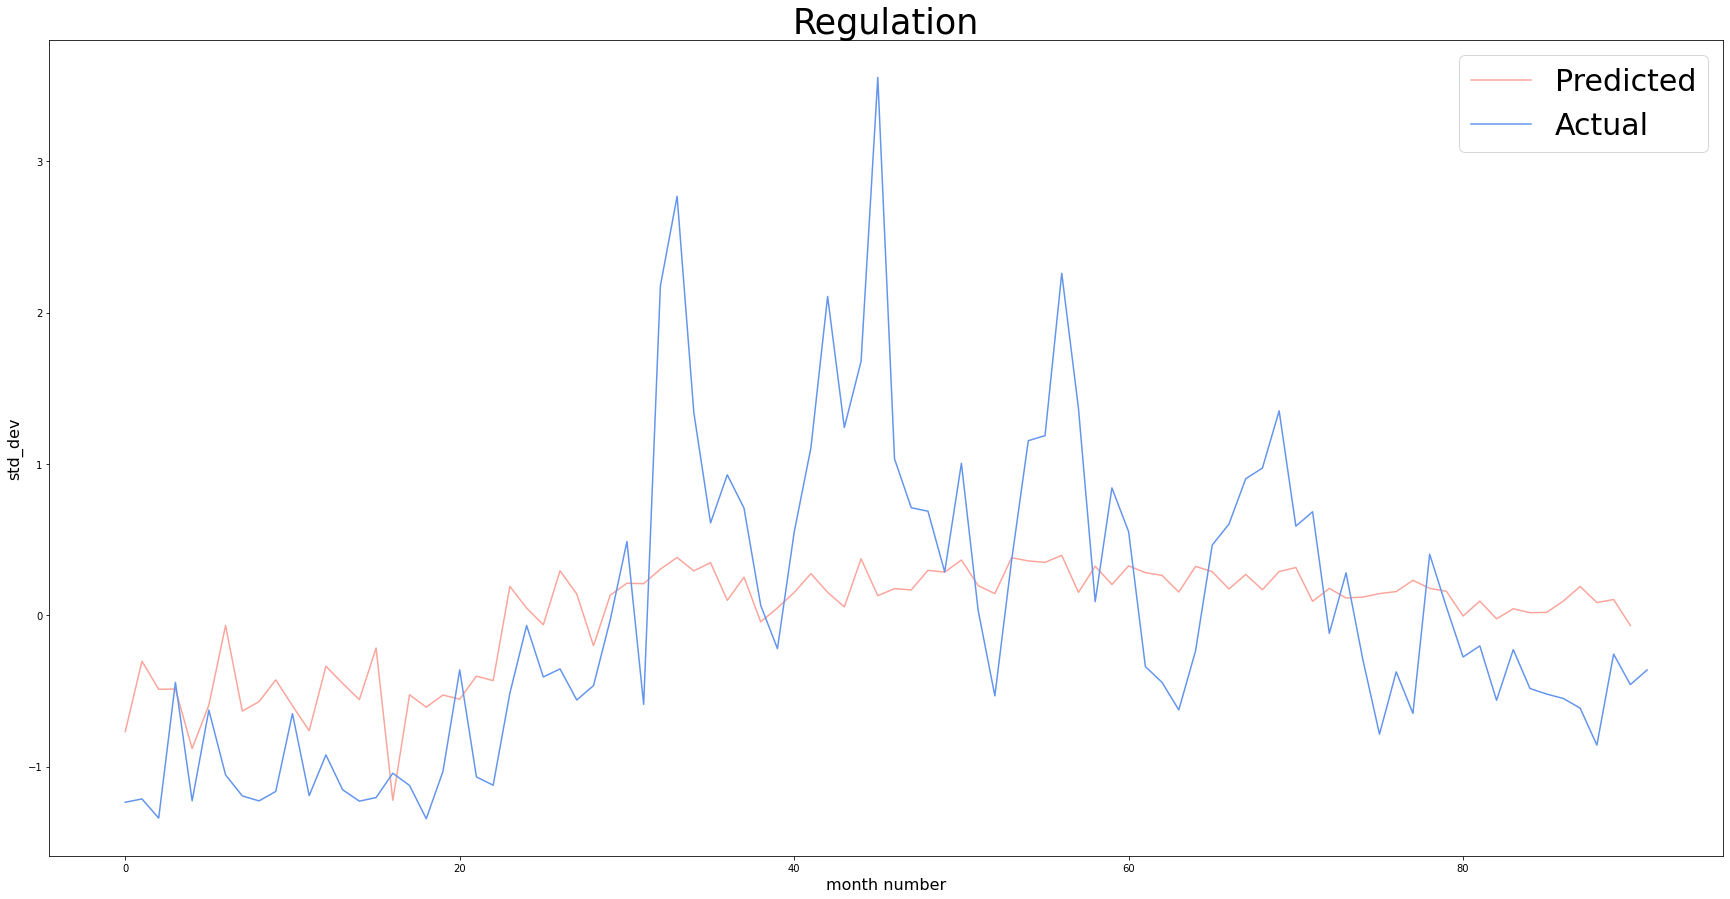

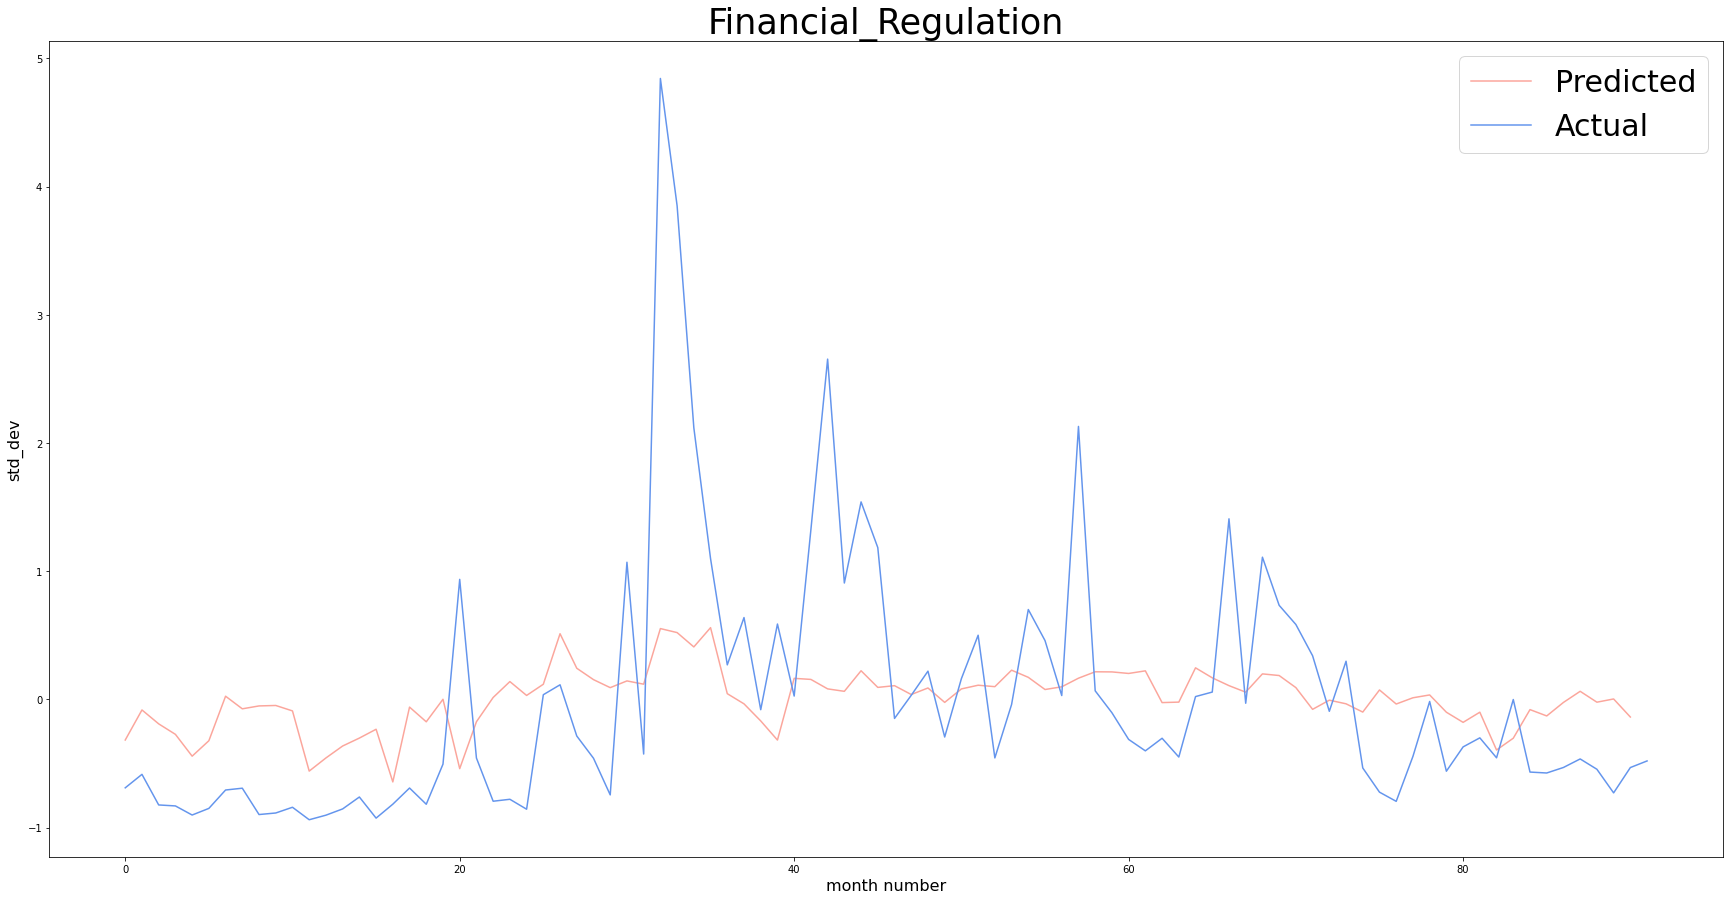

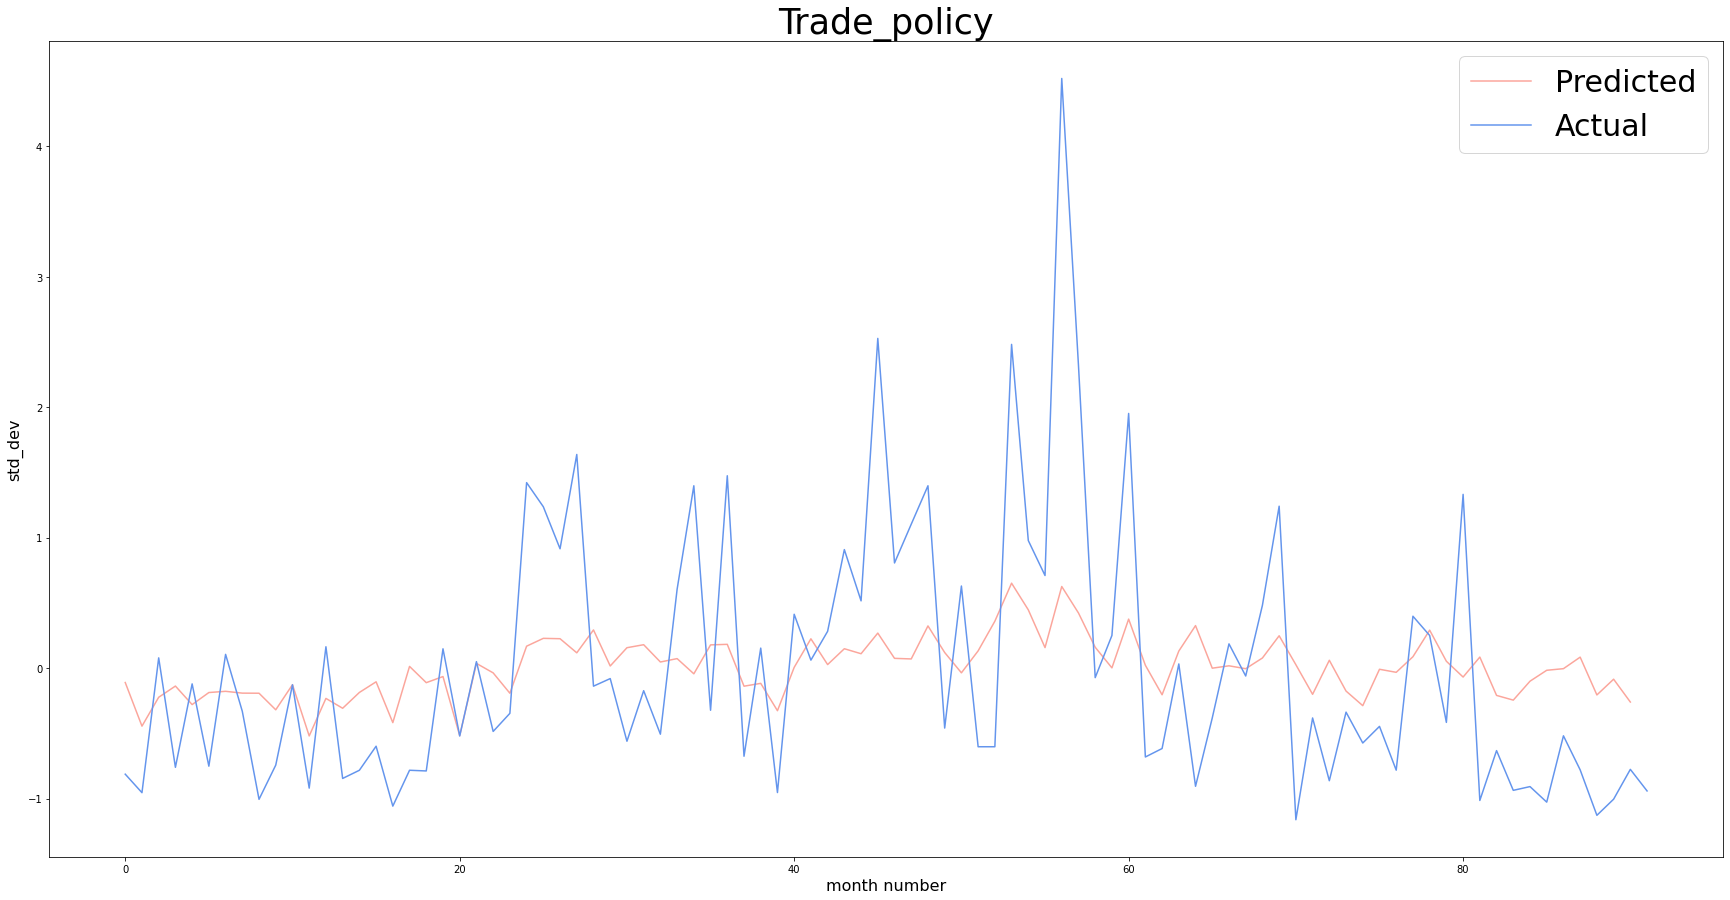

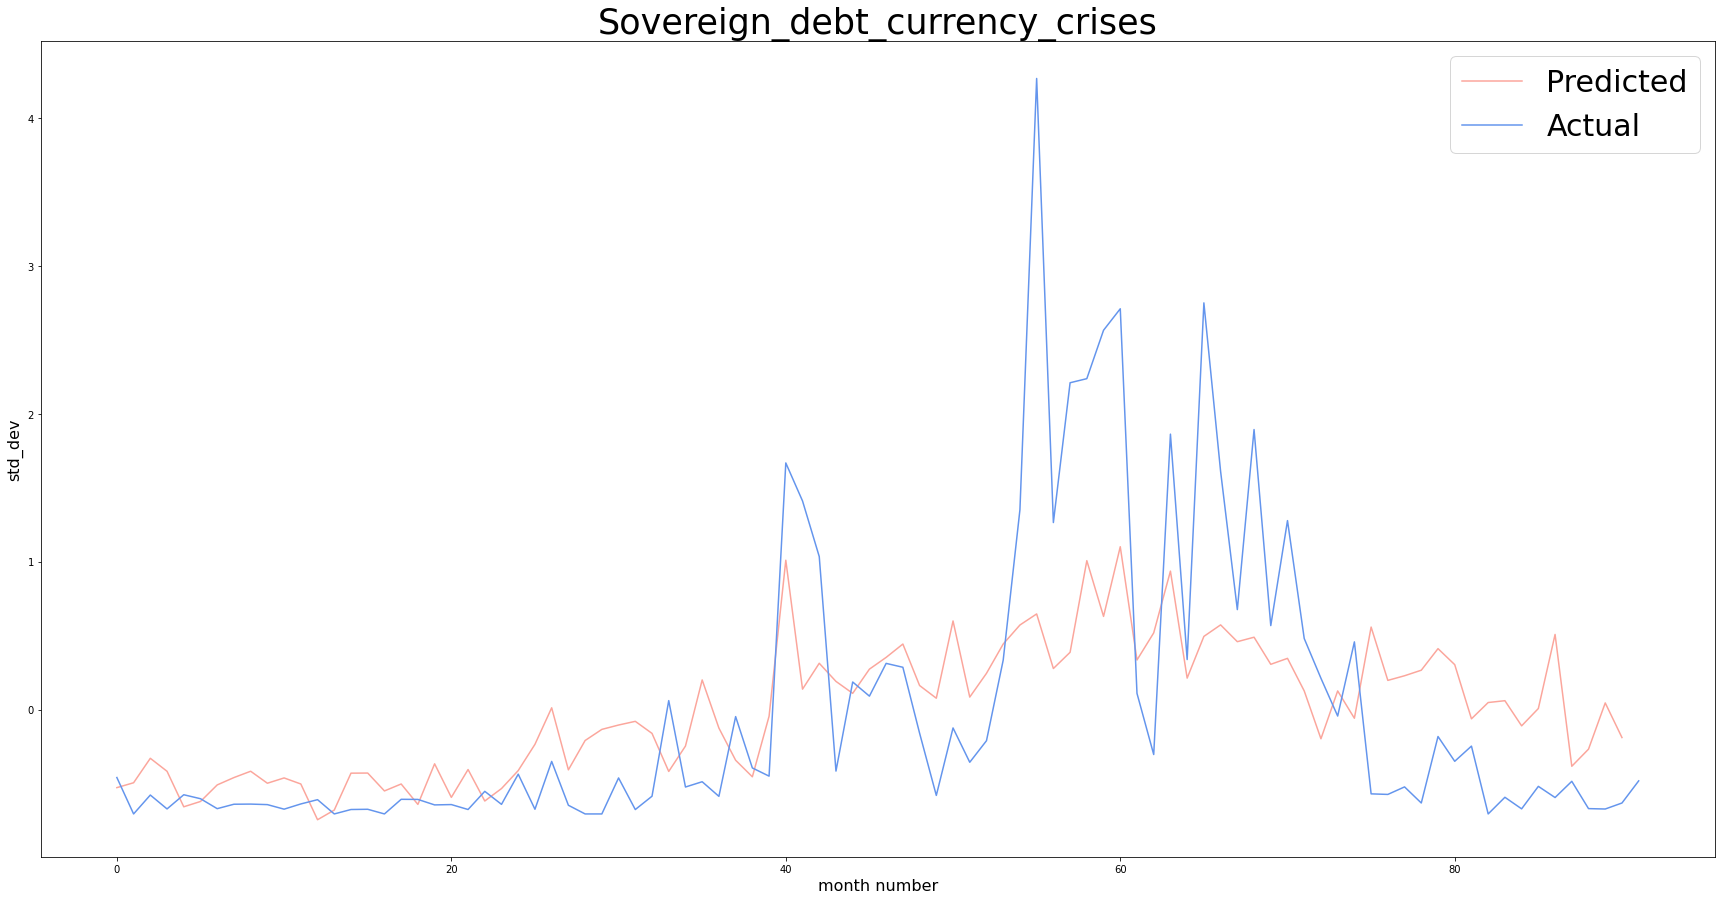

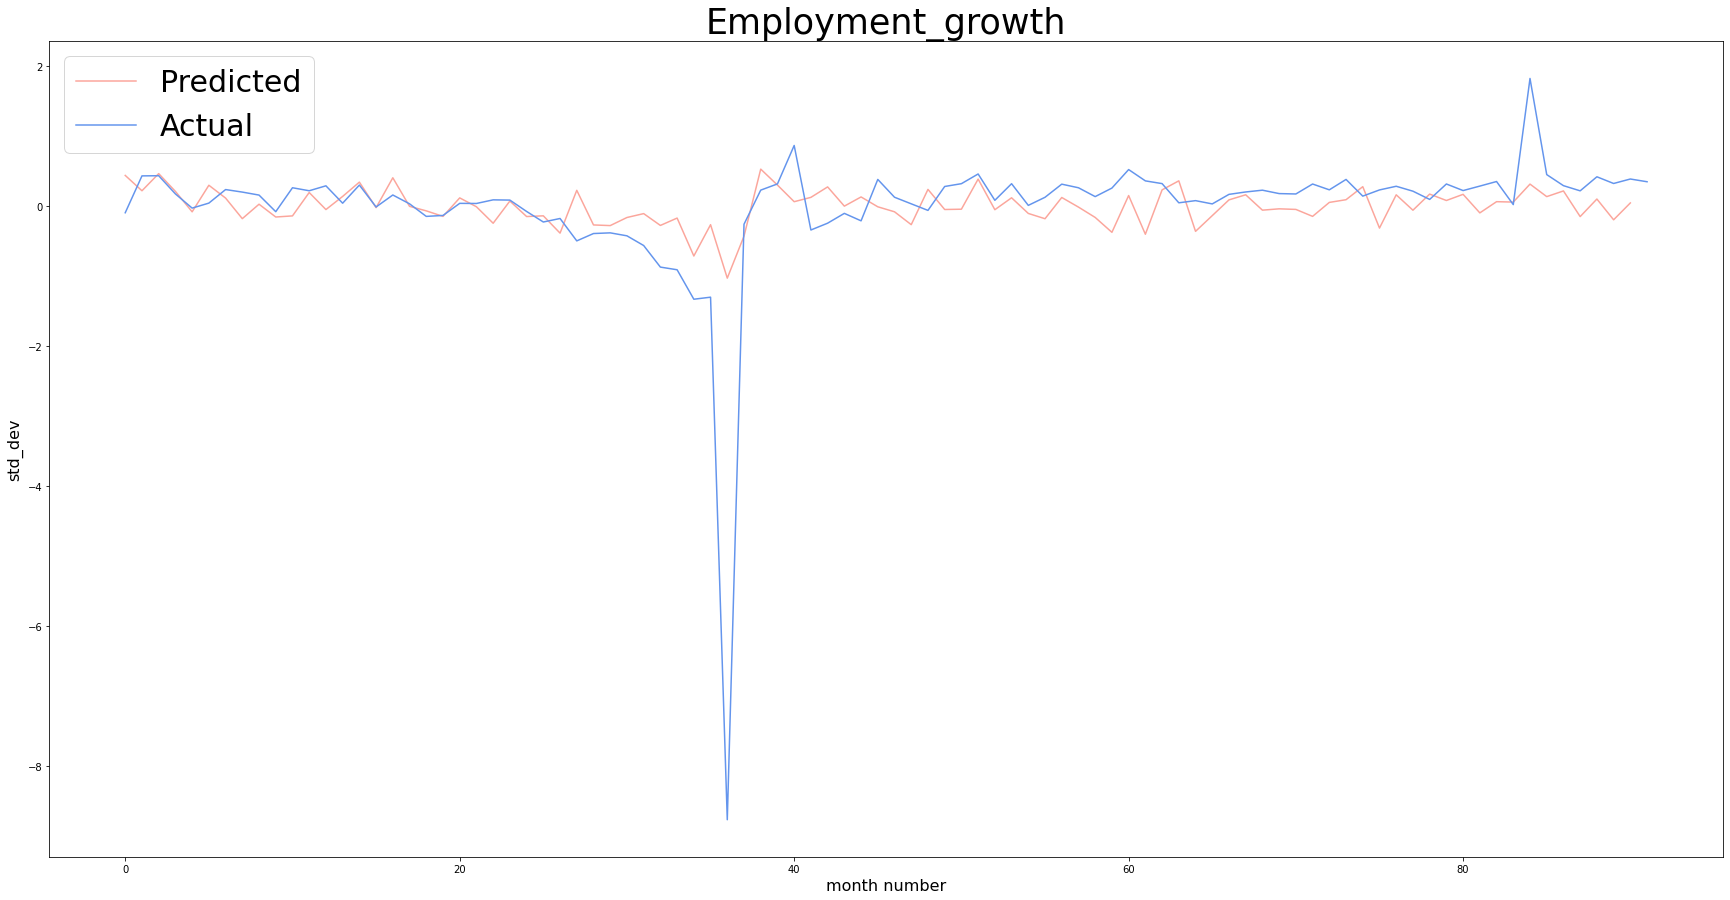

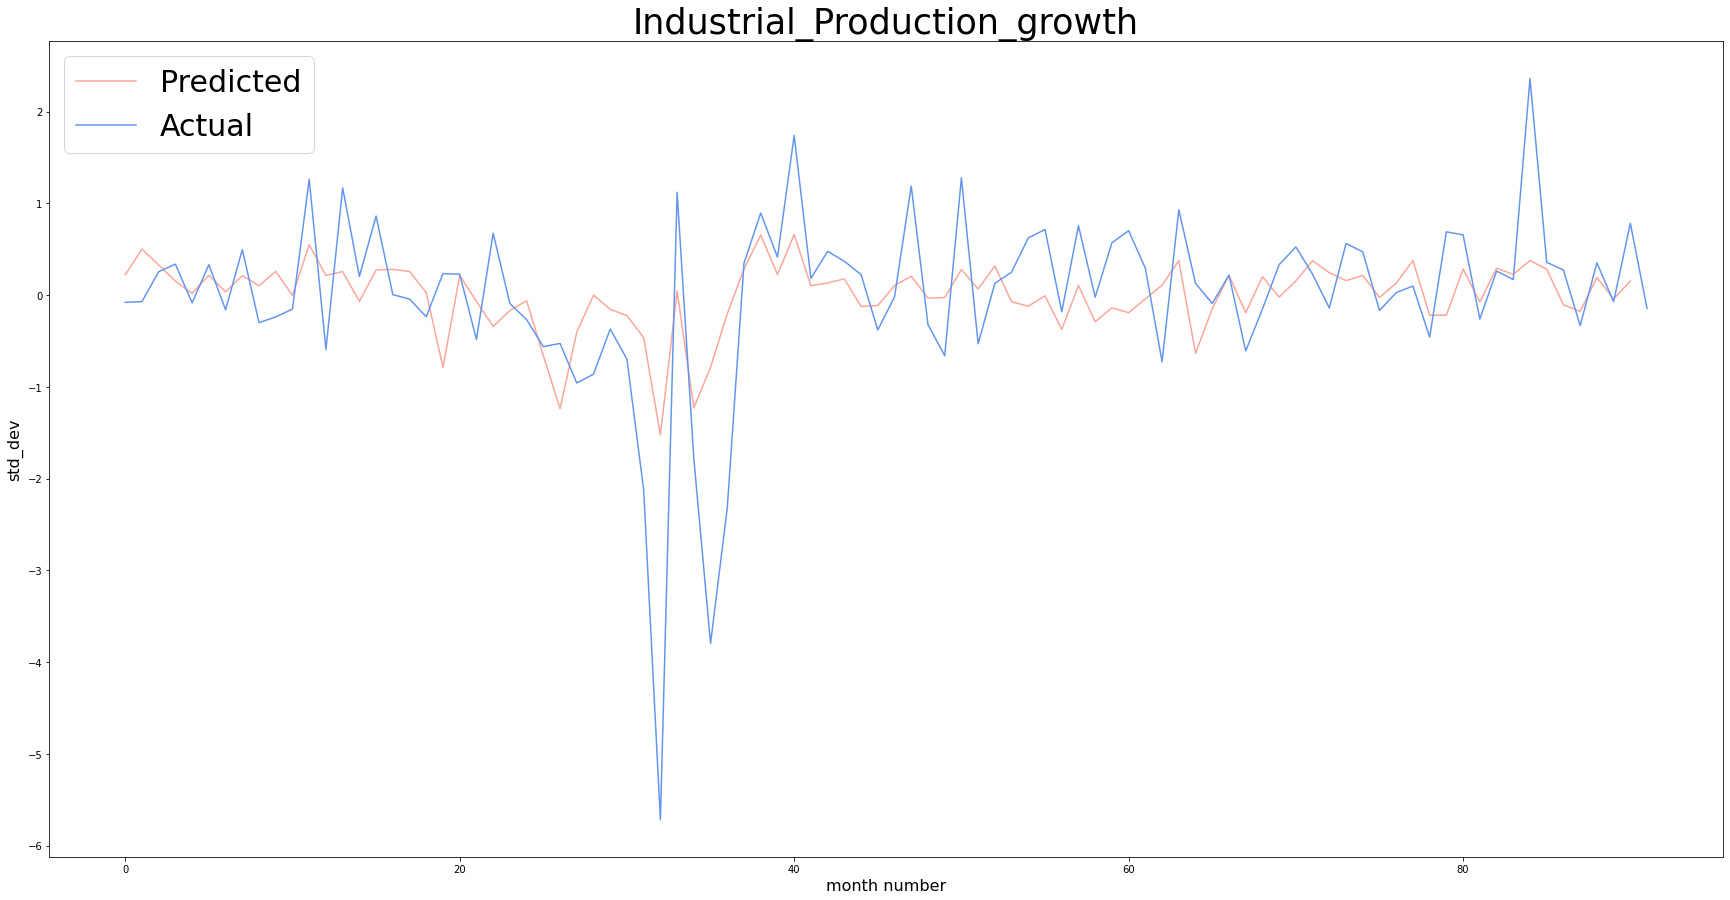

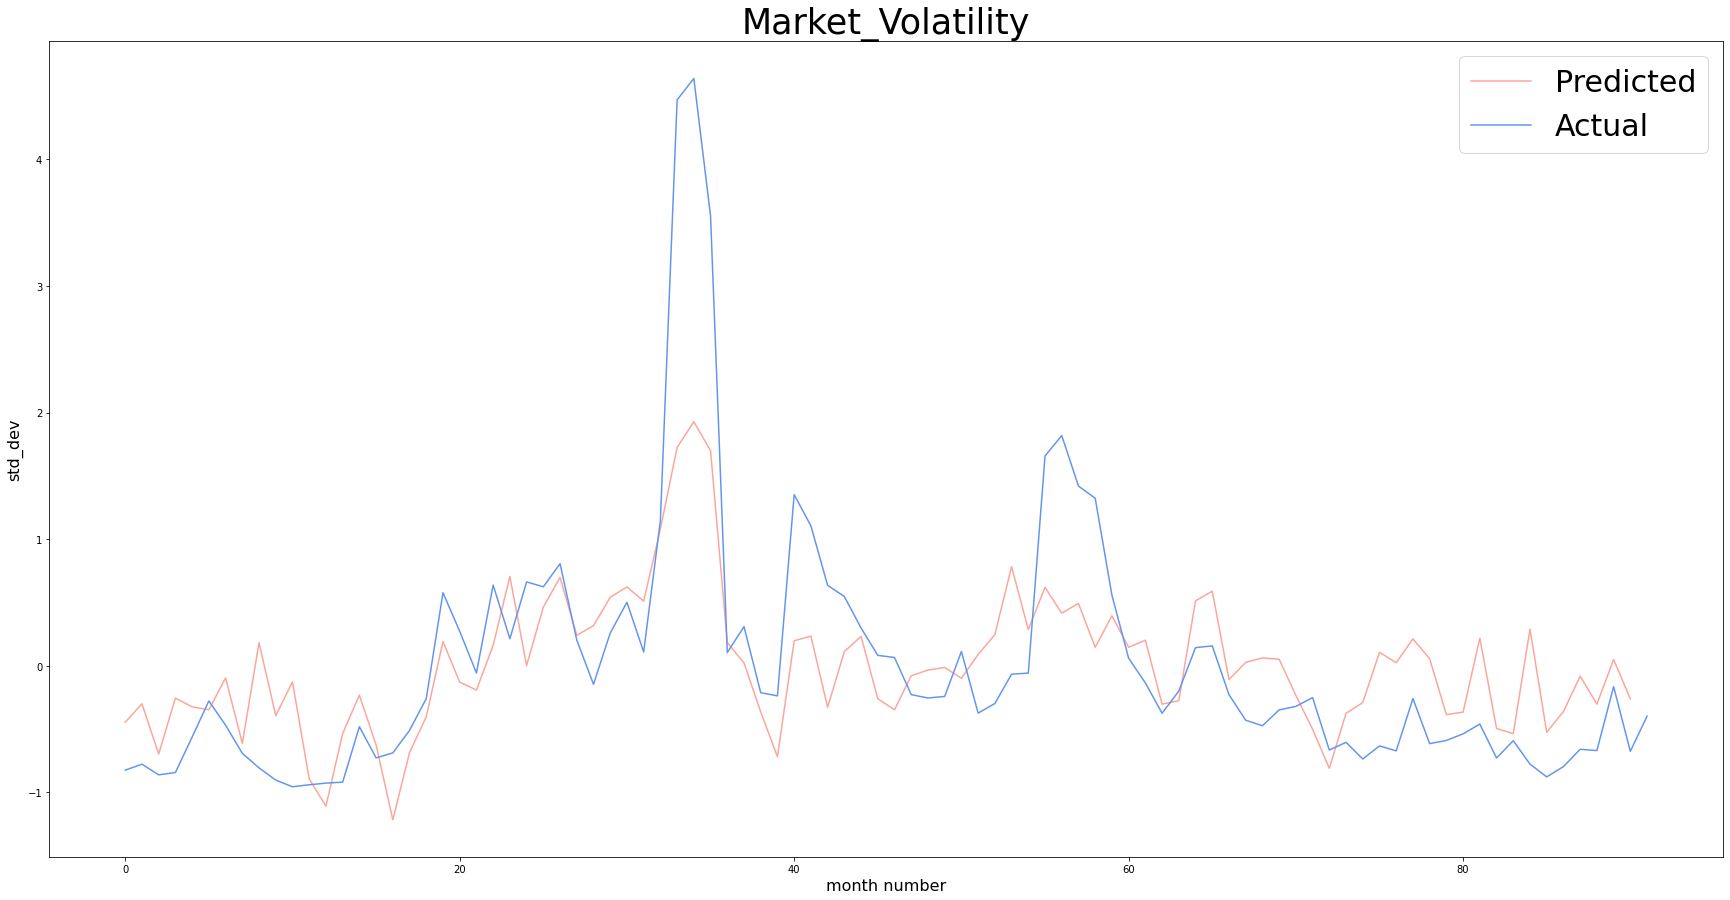

In [1500]:
keys = [key for key in selected_vars]
keys

for i in range(len(keys)):    
    fig, ax = plt.subplots(figsize=(30, 15))
    ax.plot(pred_train[keys[i]][:-1], alpha = 0.7, color = 'salmon', label='Predicted')
    ax.plot(y_train_scaled_dict[keys[i]], alpha = 1, color = 'cornflowerblue', label='Actual')
    ax.legend(fontsize='large', prop={'size': 30})
    ax.set_title(keys[i], fontsize=35)
    ax.set_ylabel('std_dev', fontsize=16)
    ax.set_xlabel('month number', fontsize =16)
    fig.show

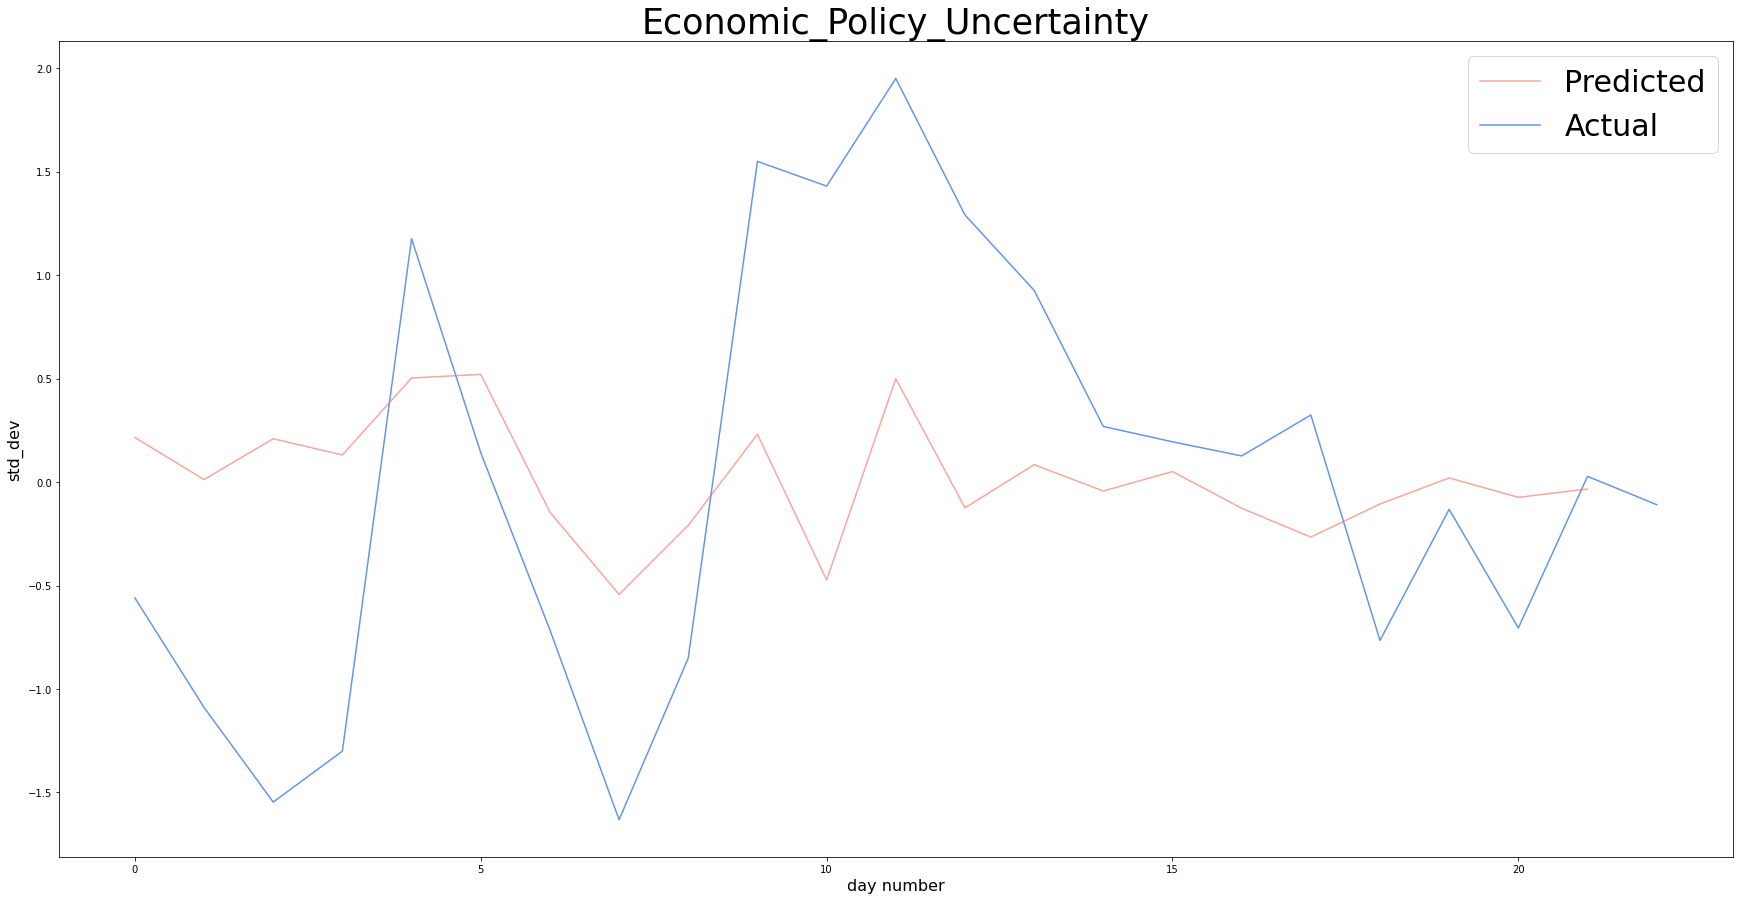

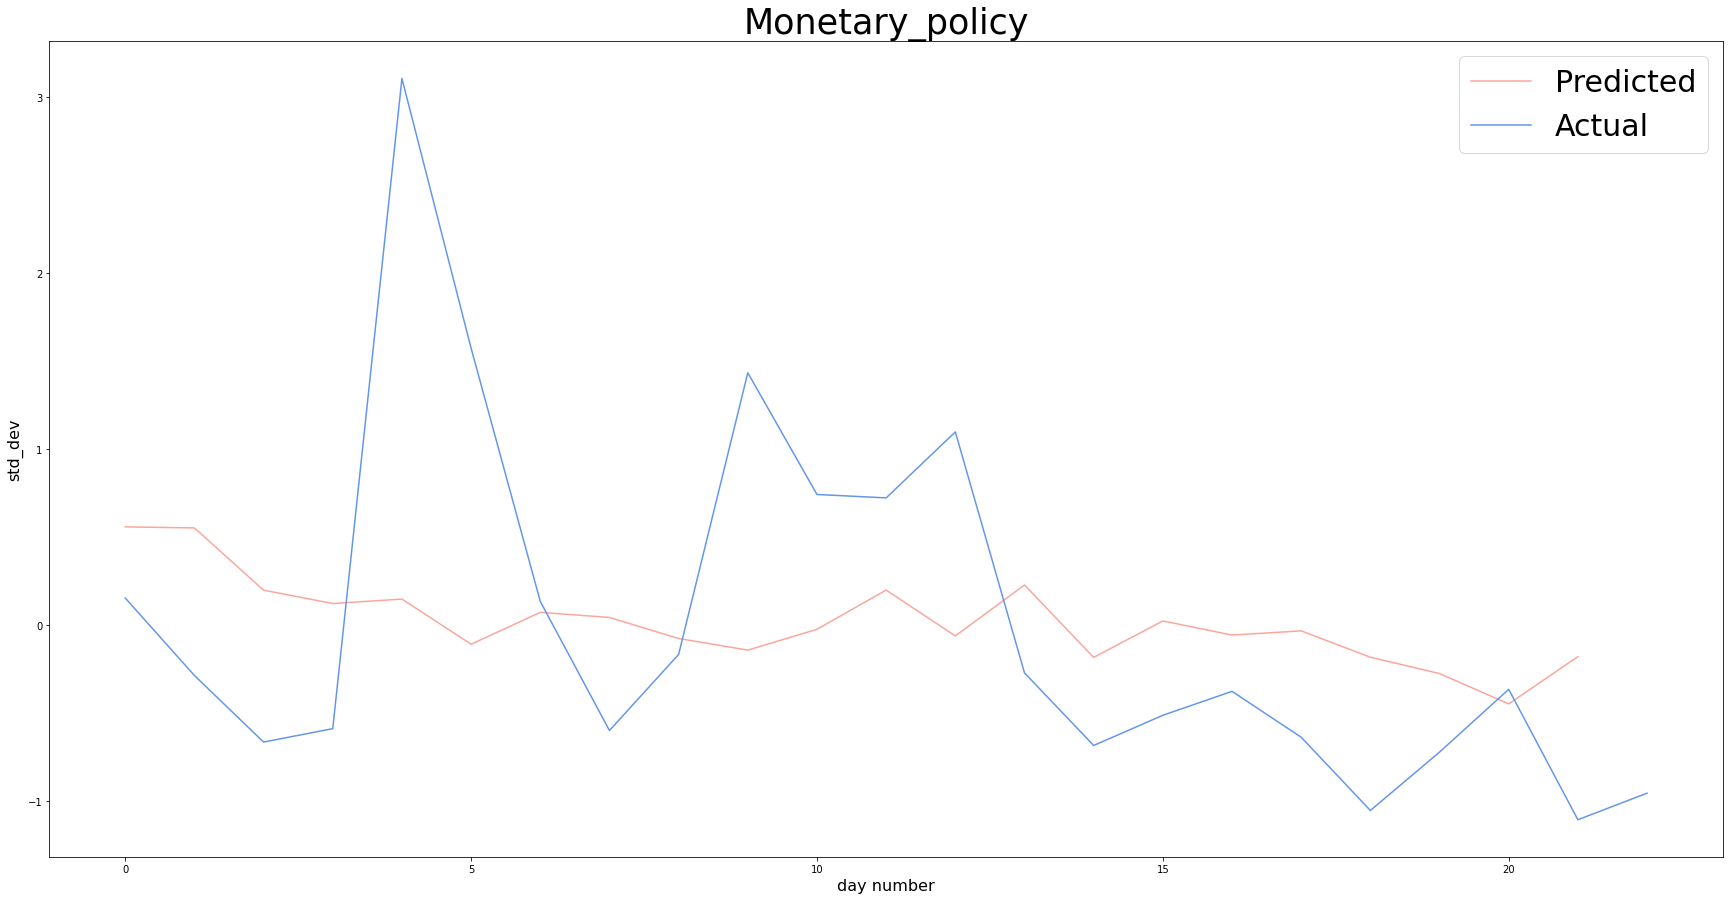

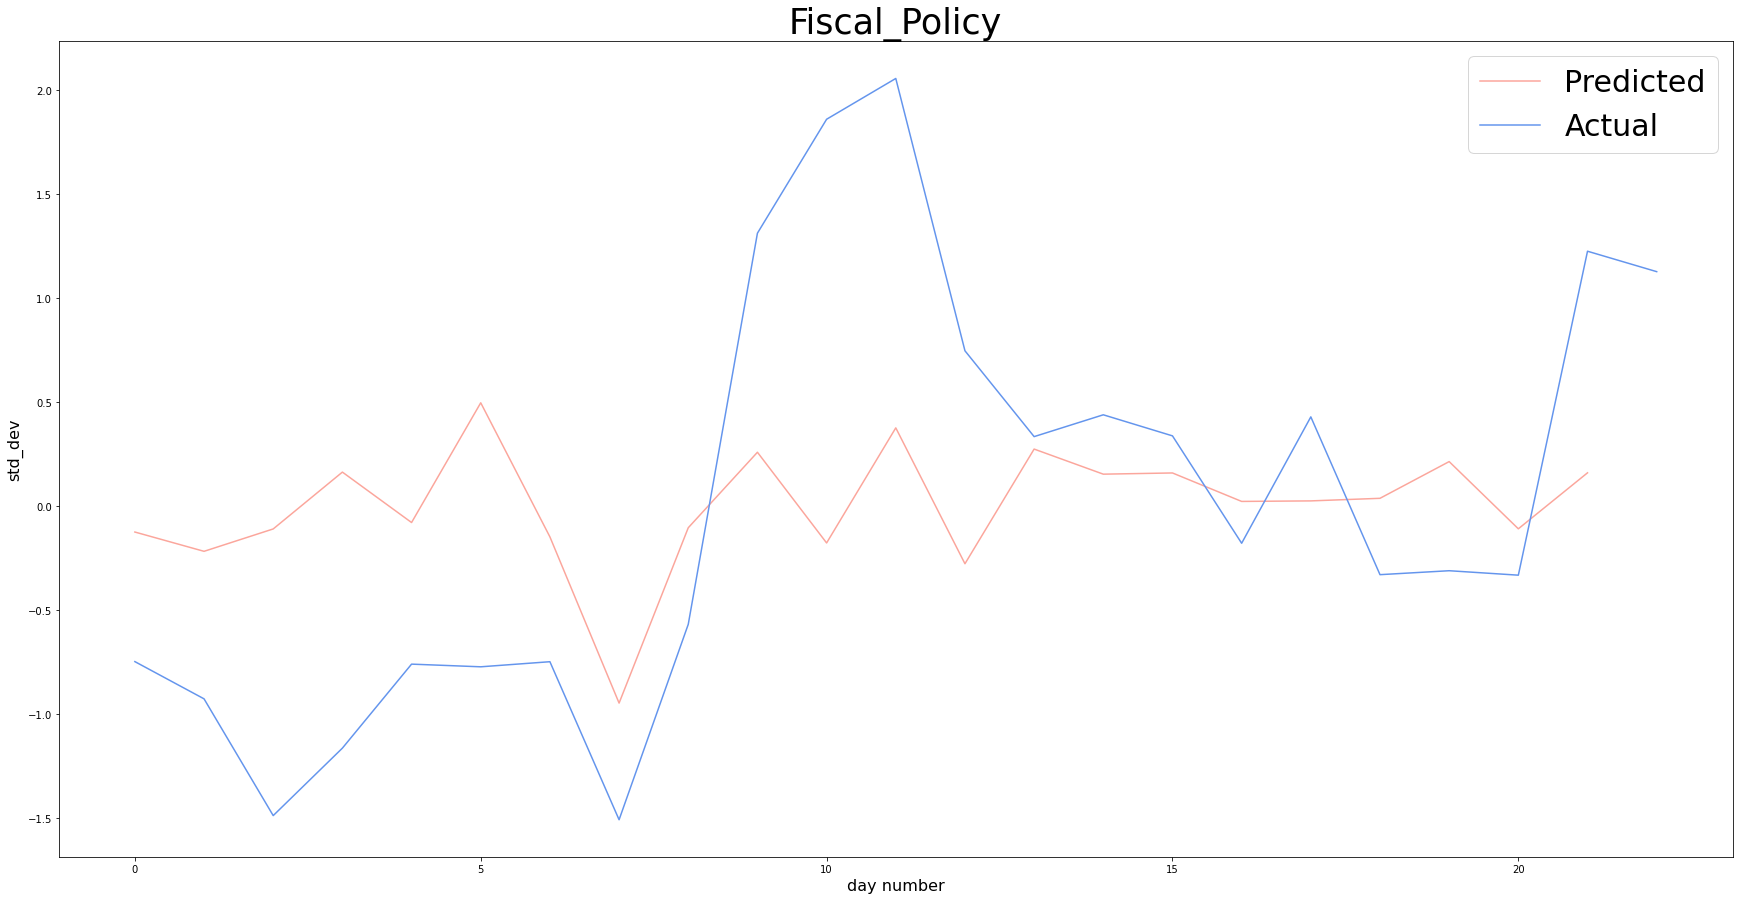

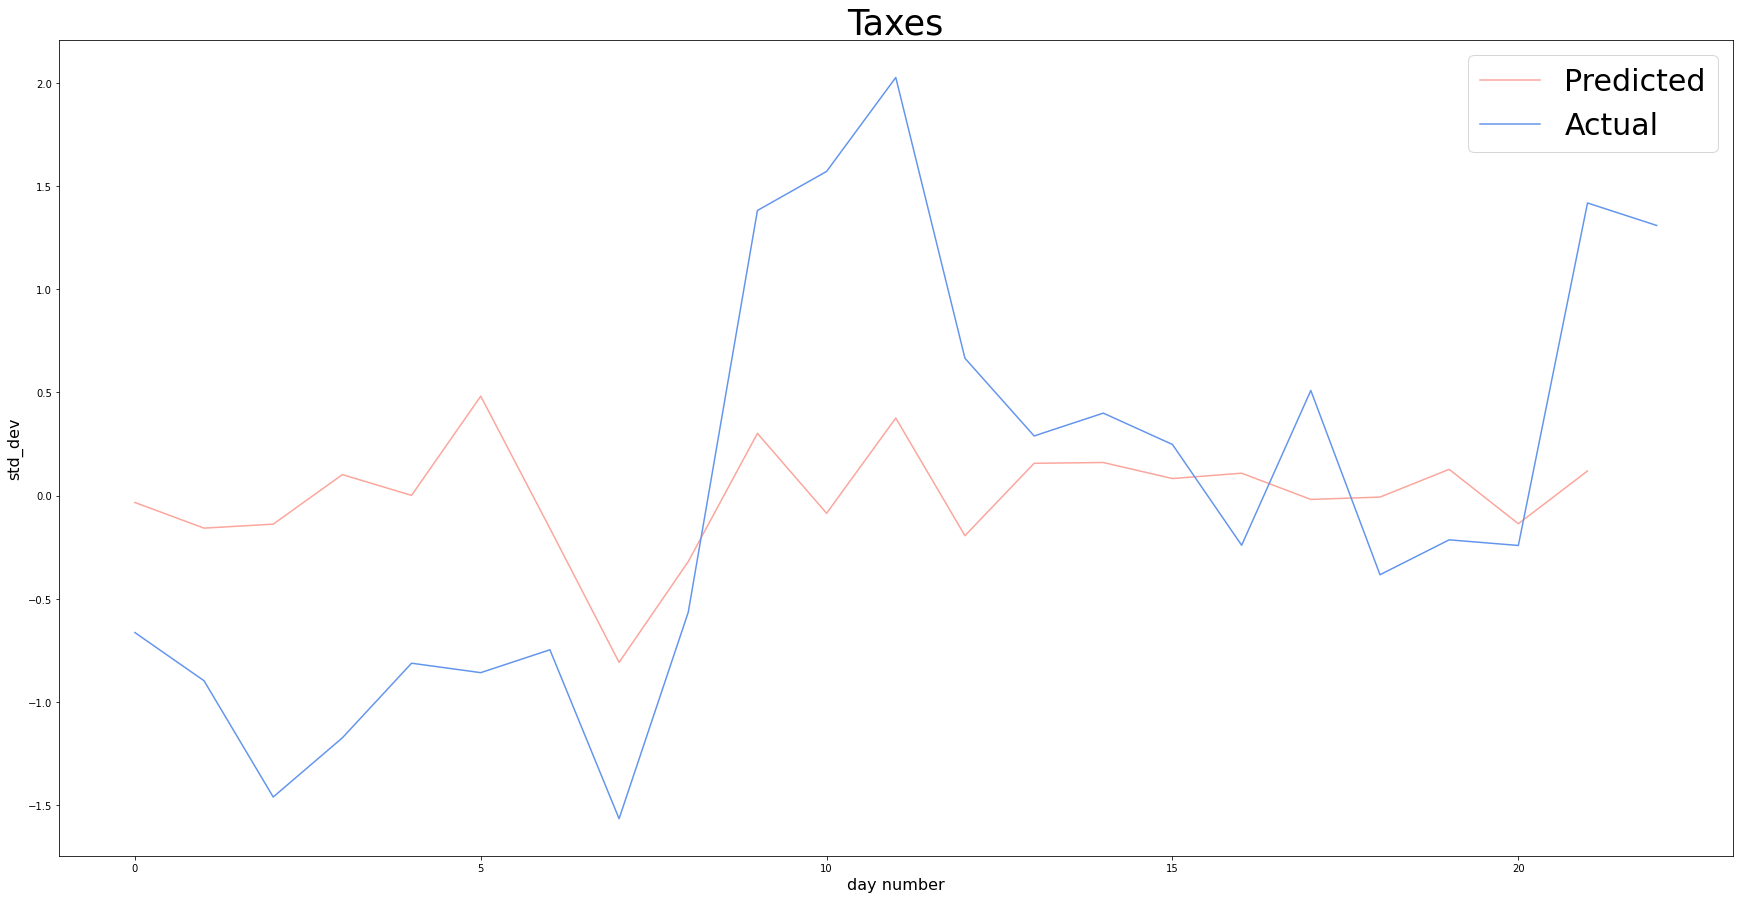

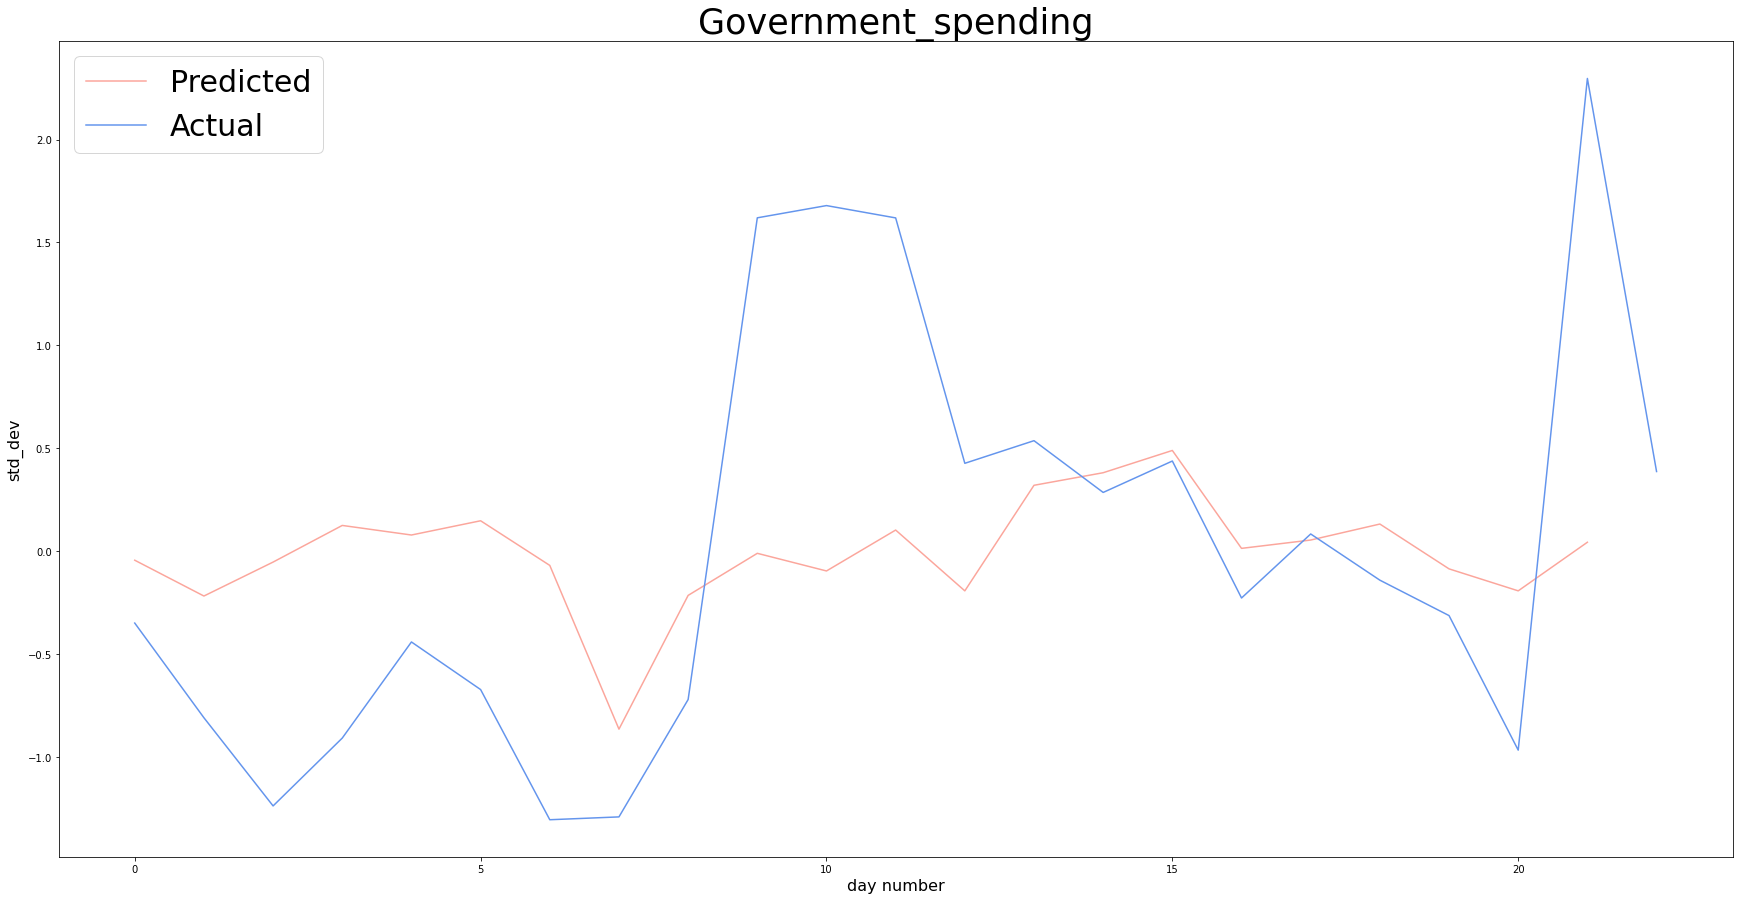

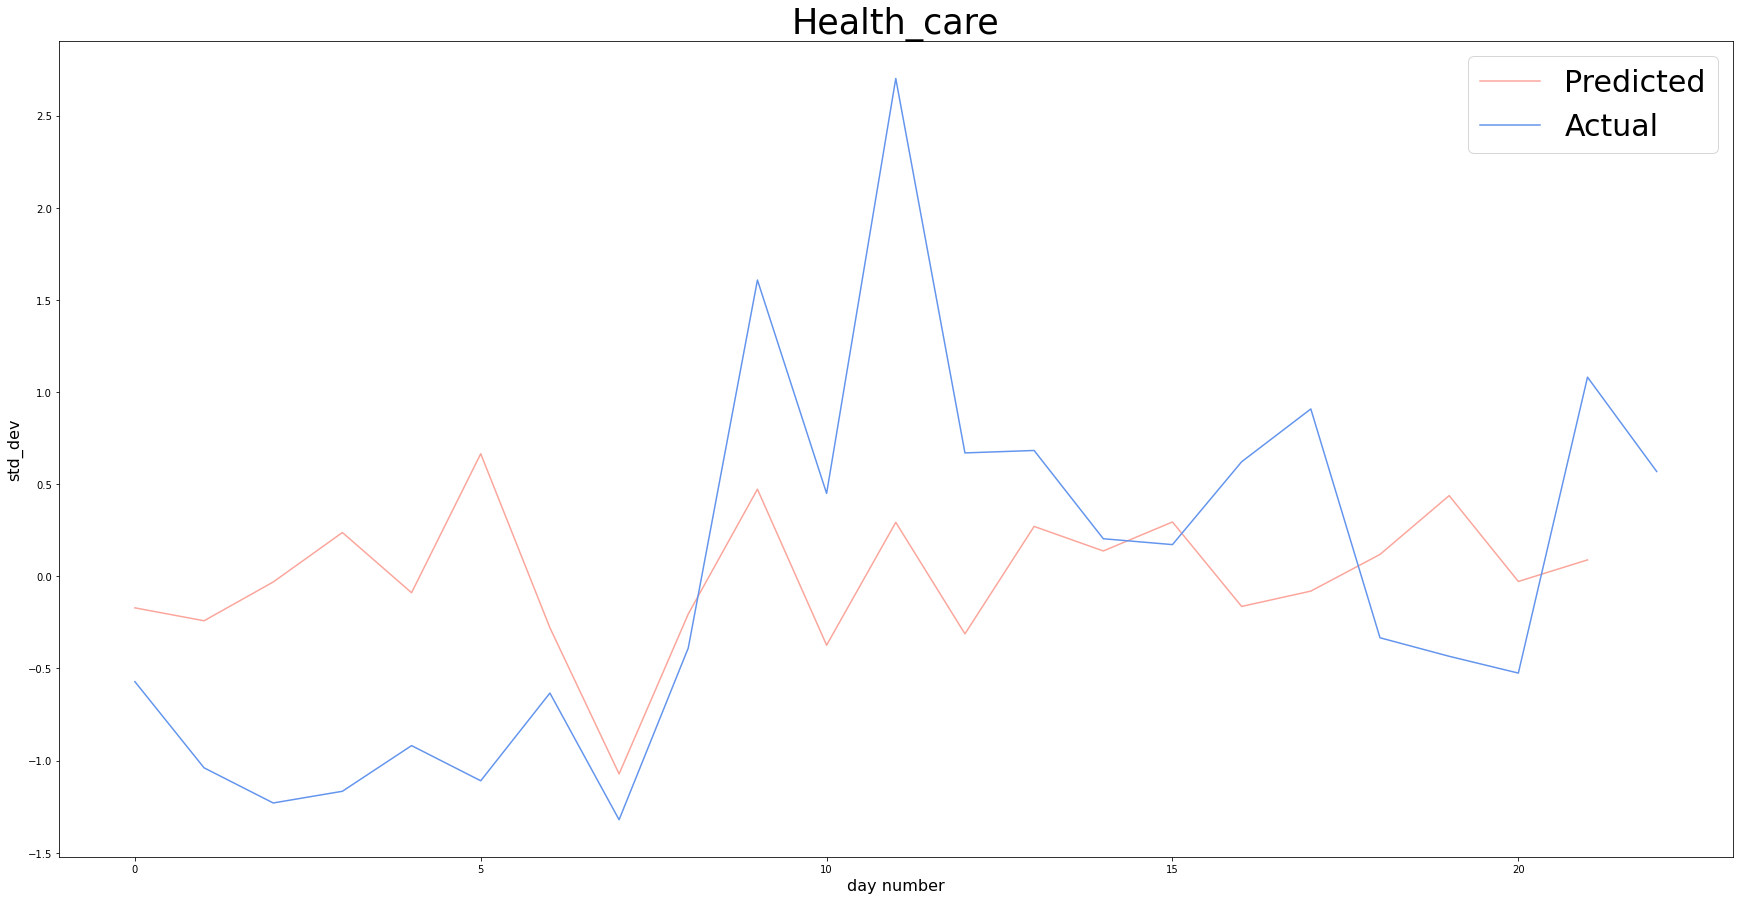

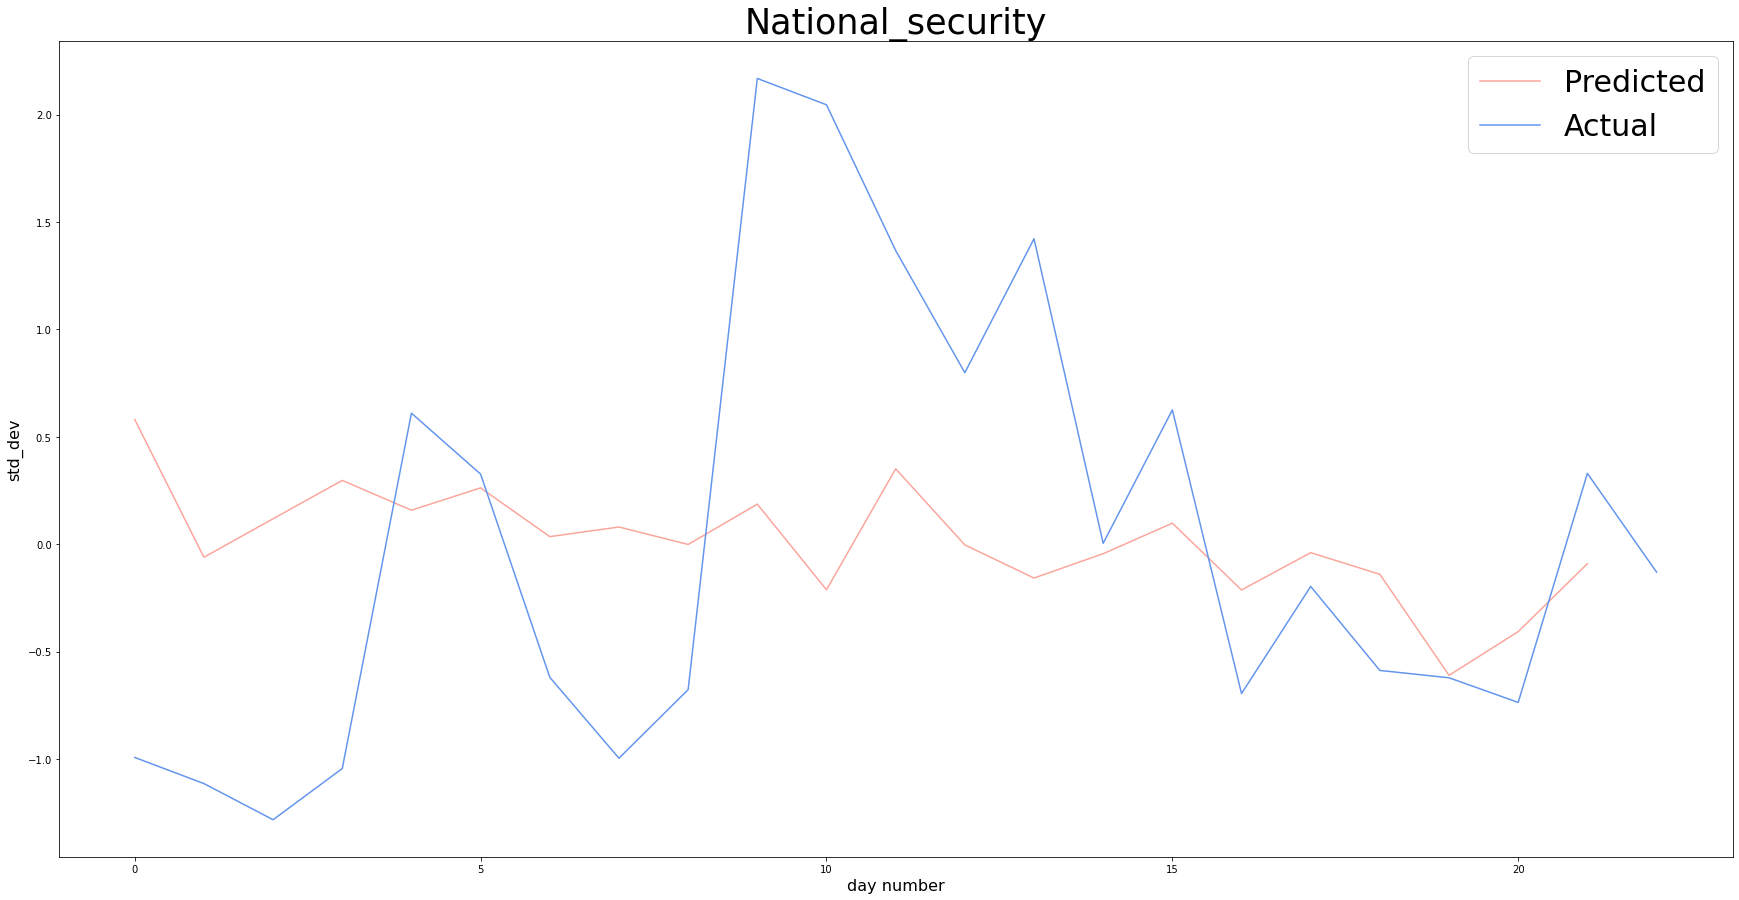

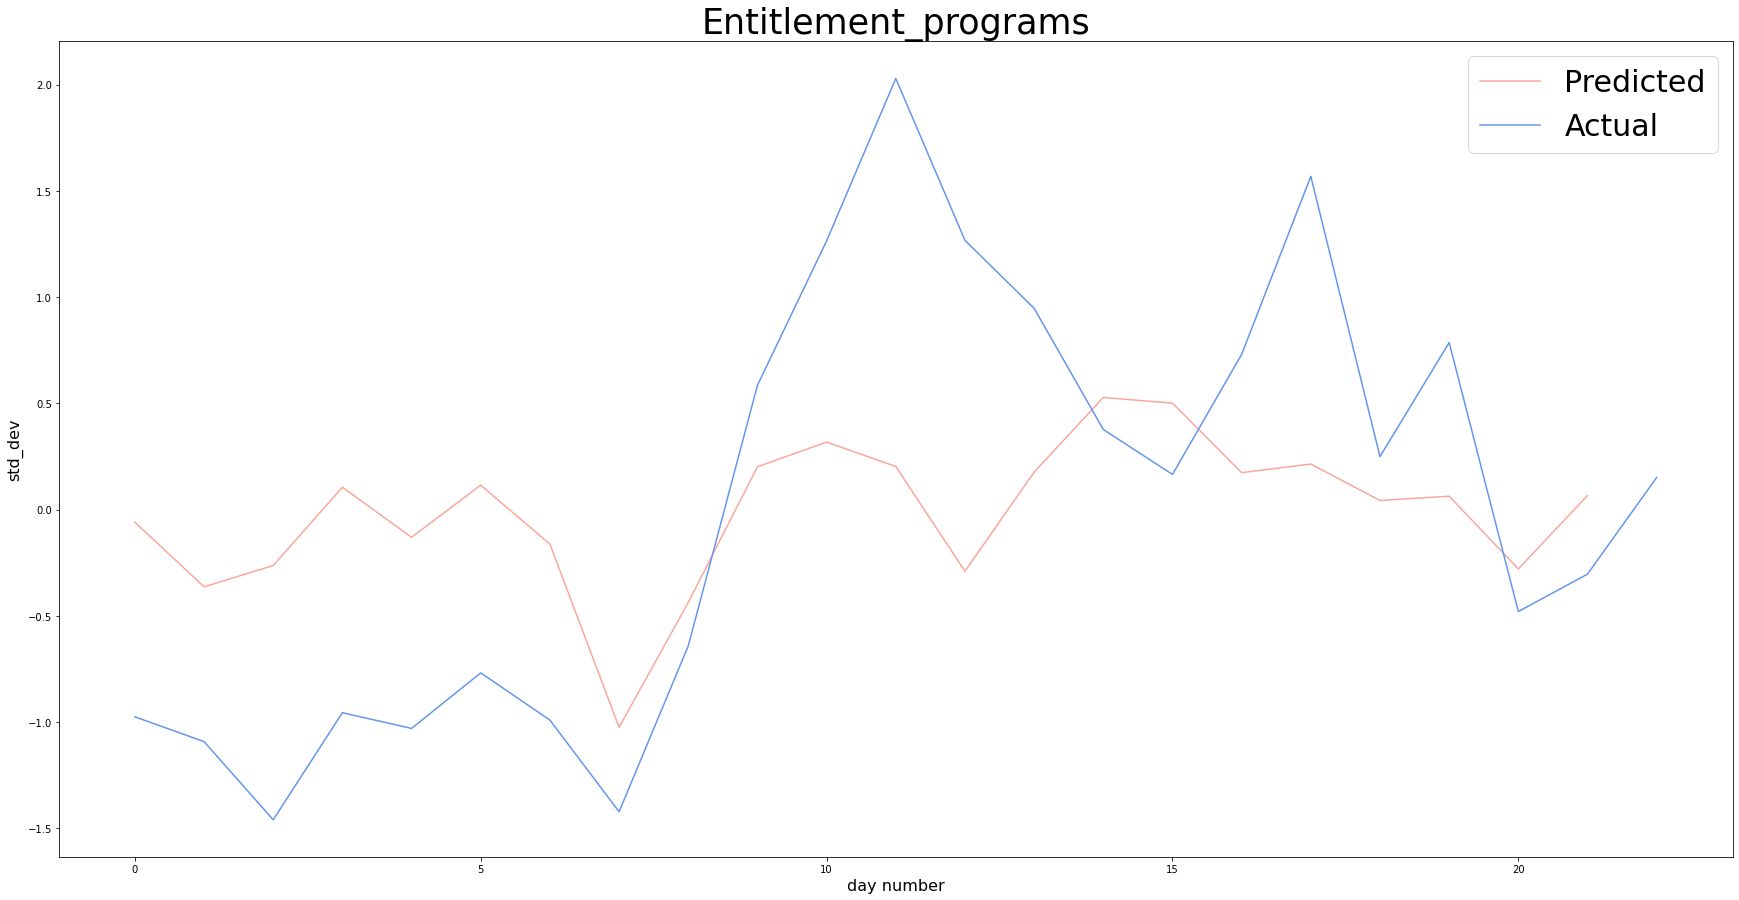

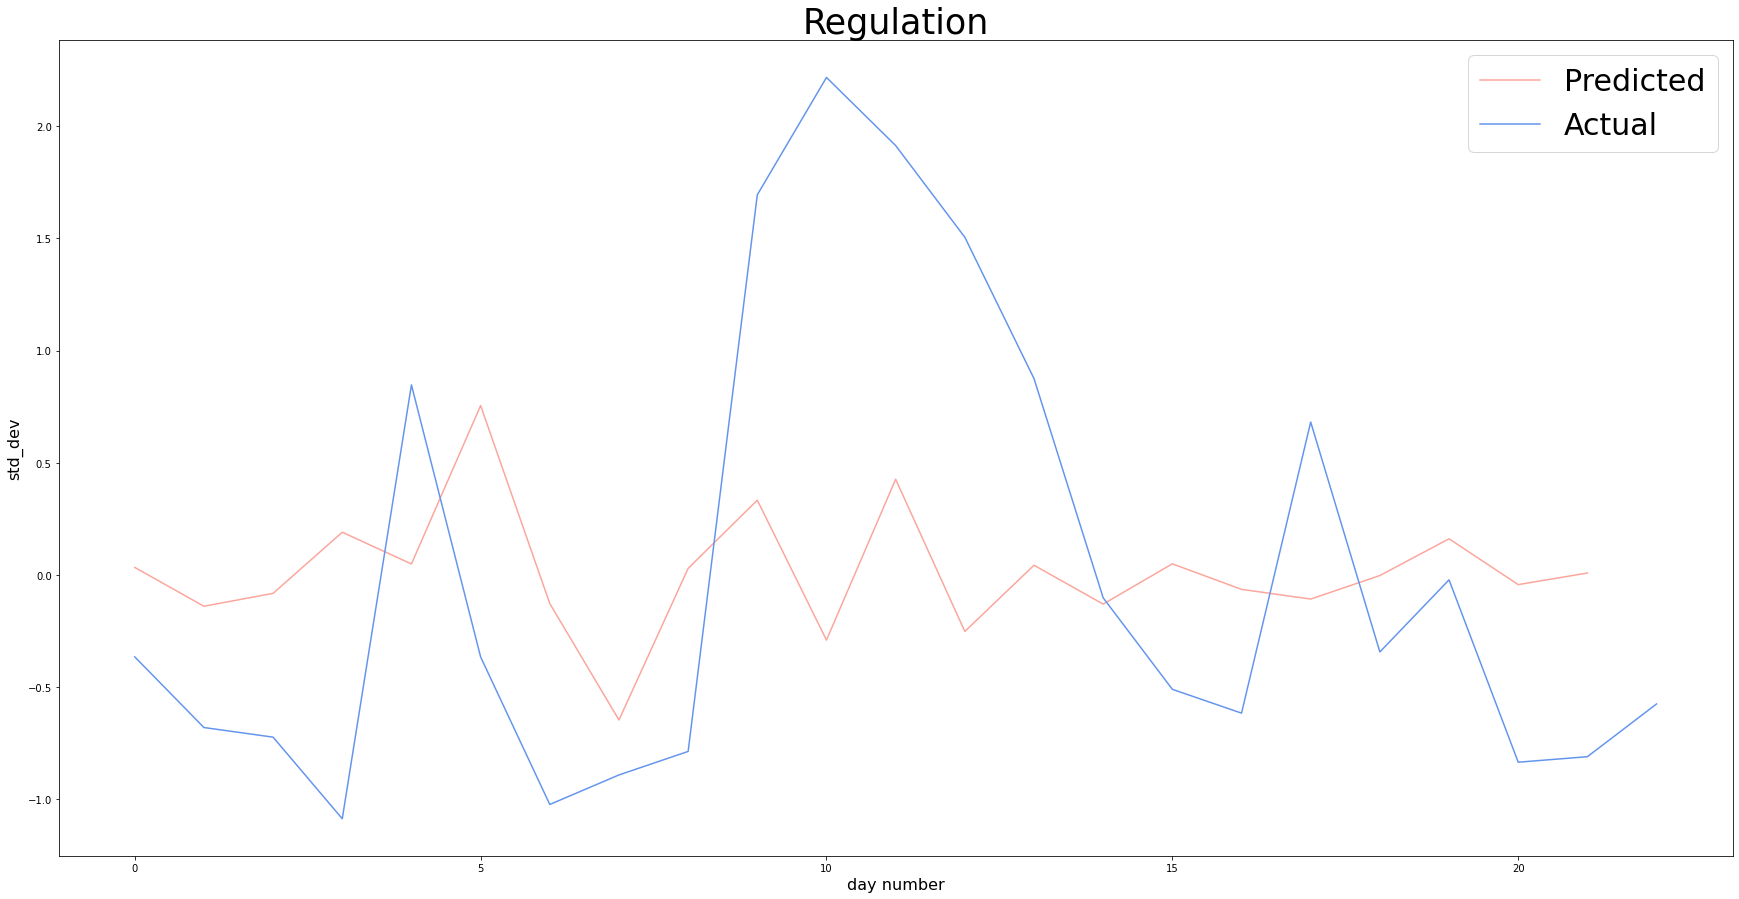

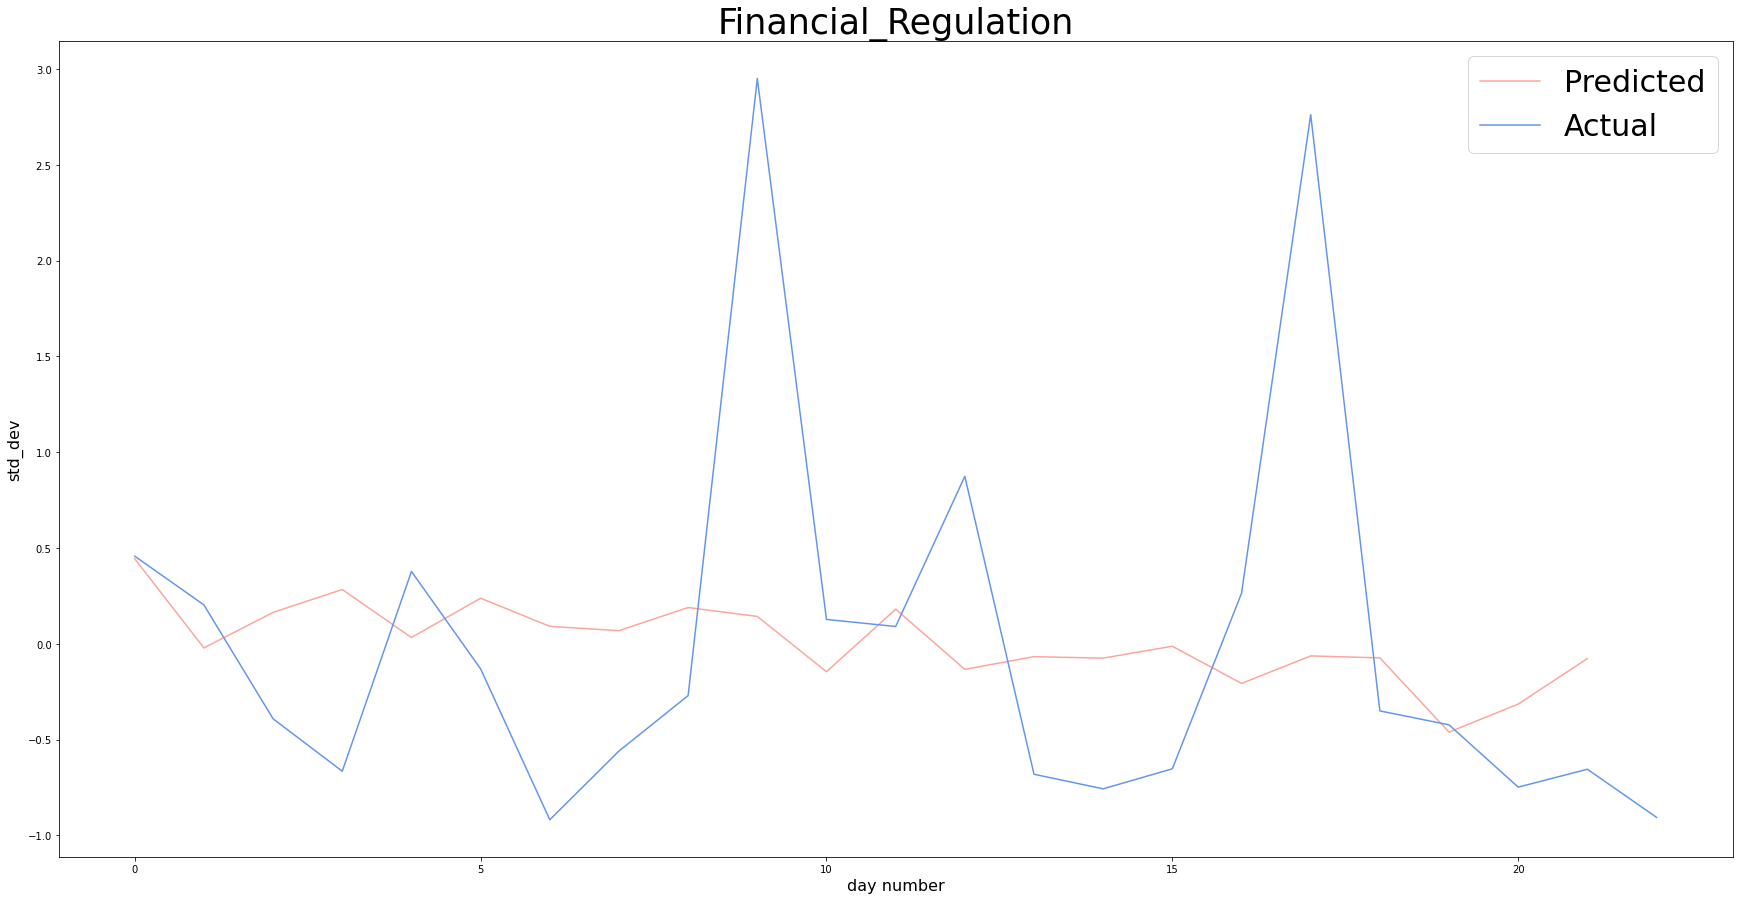

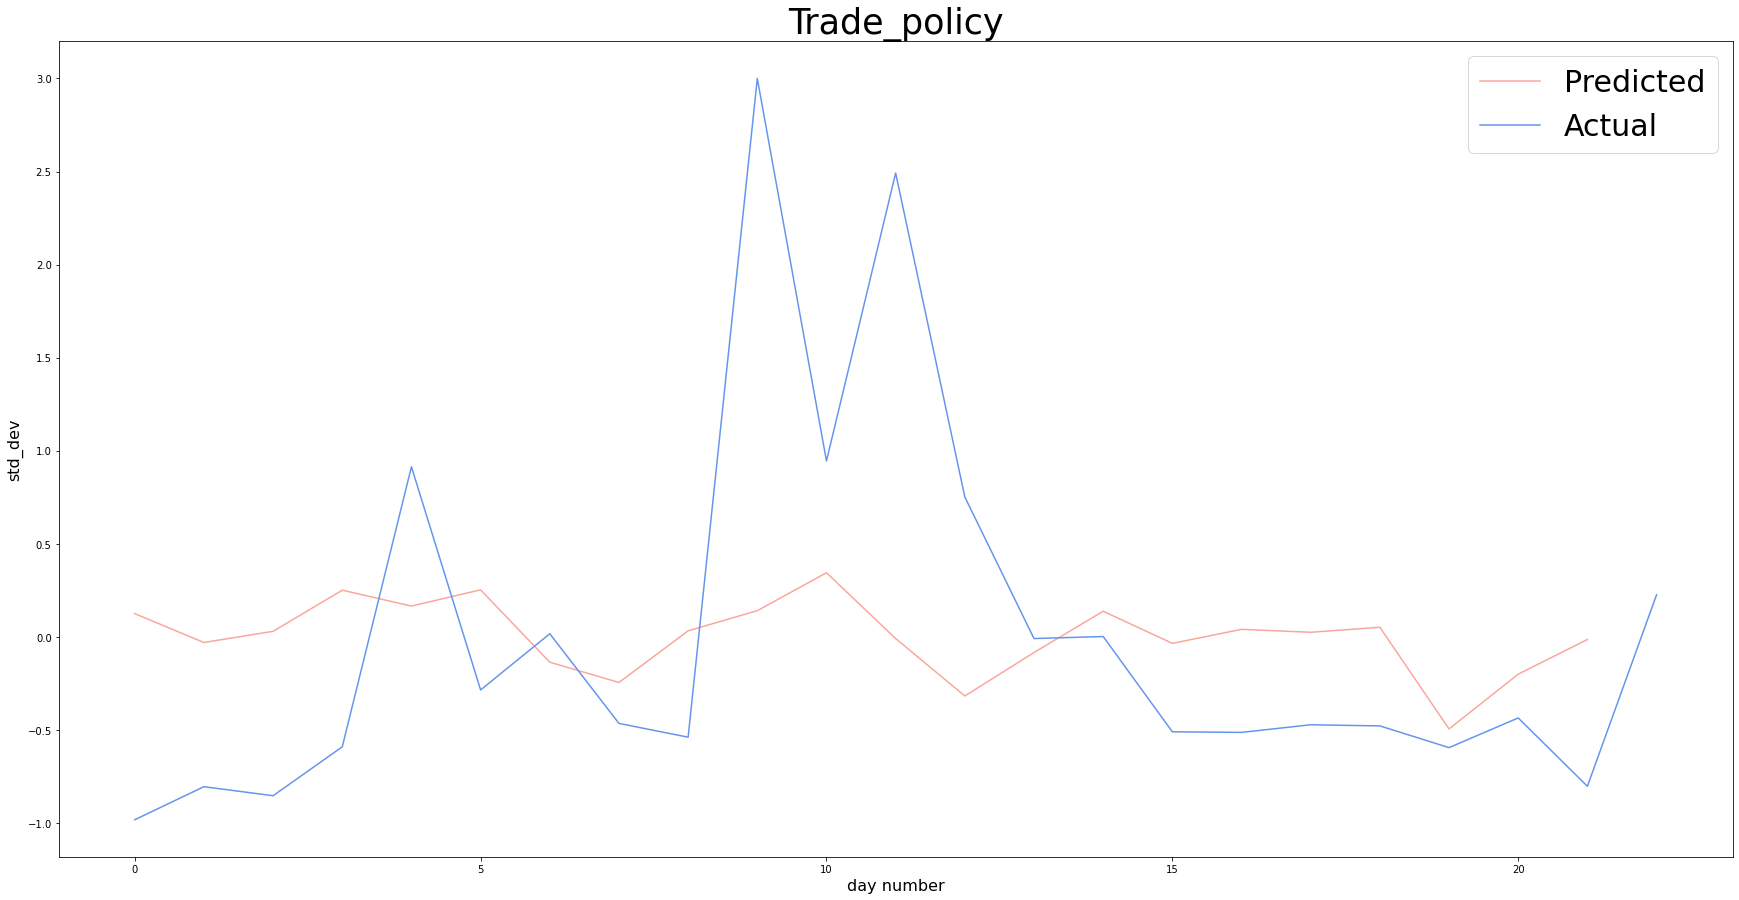

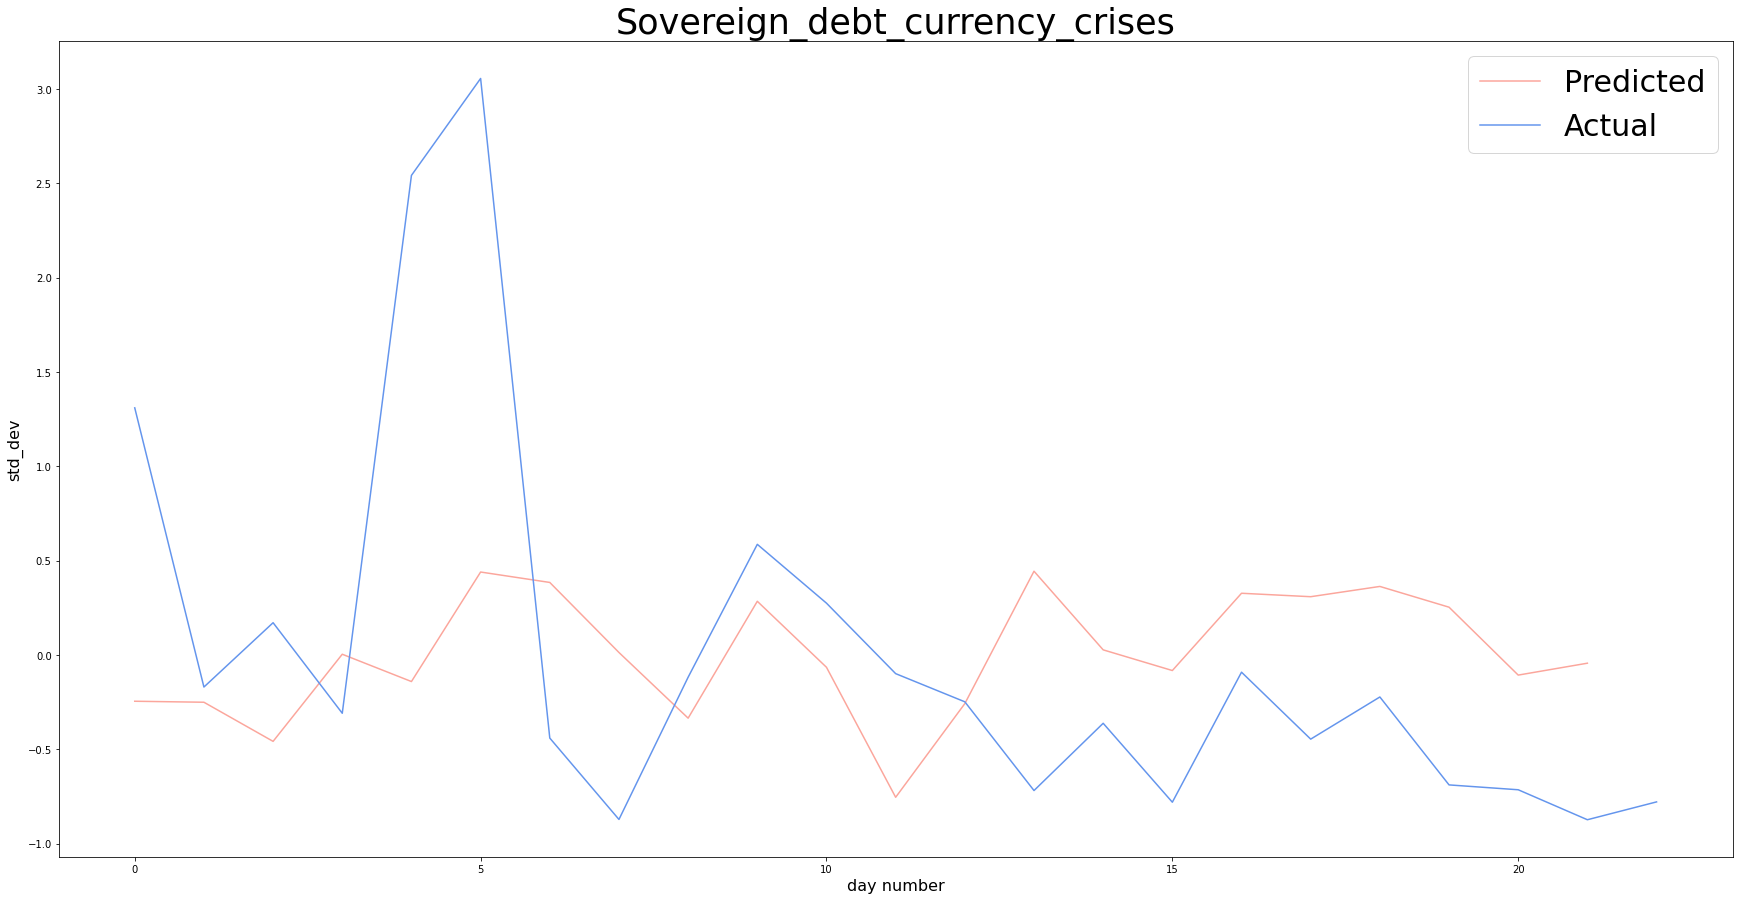

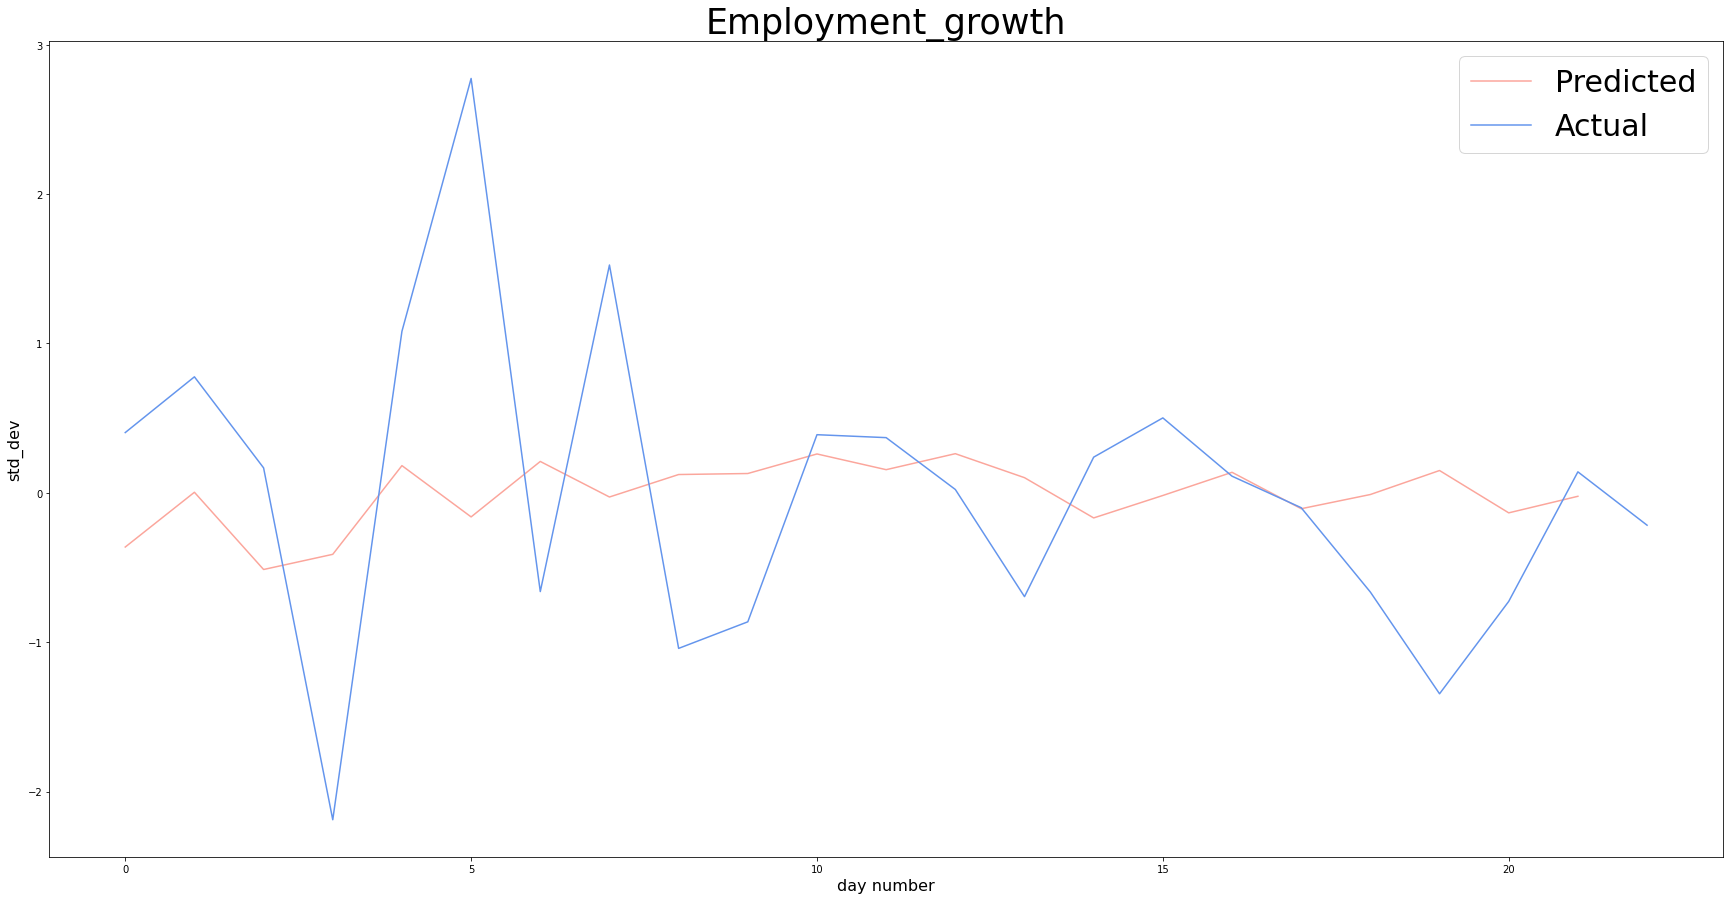

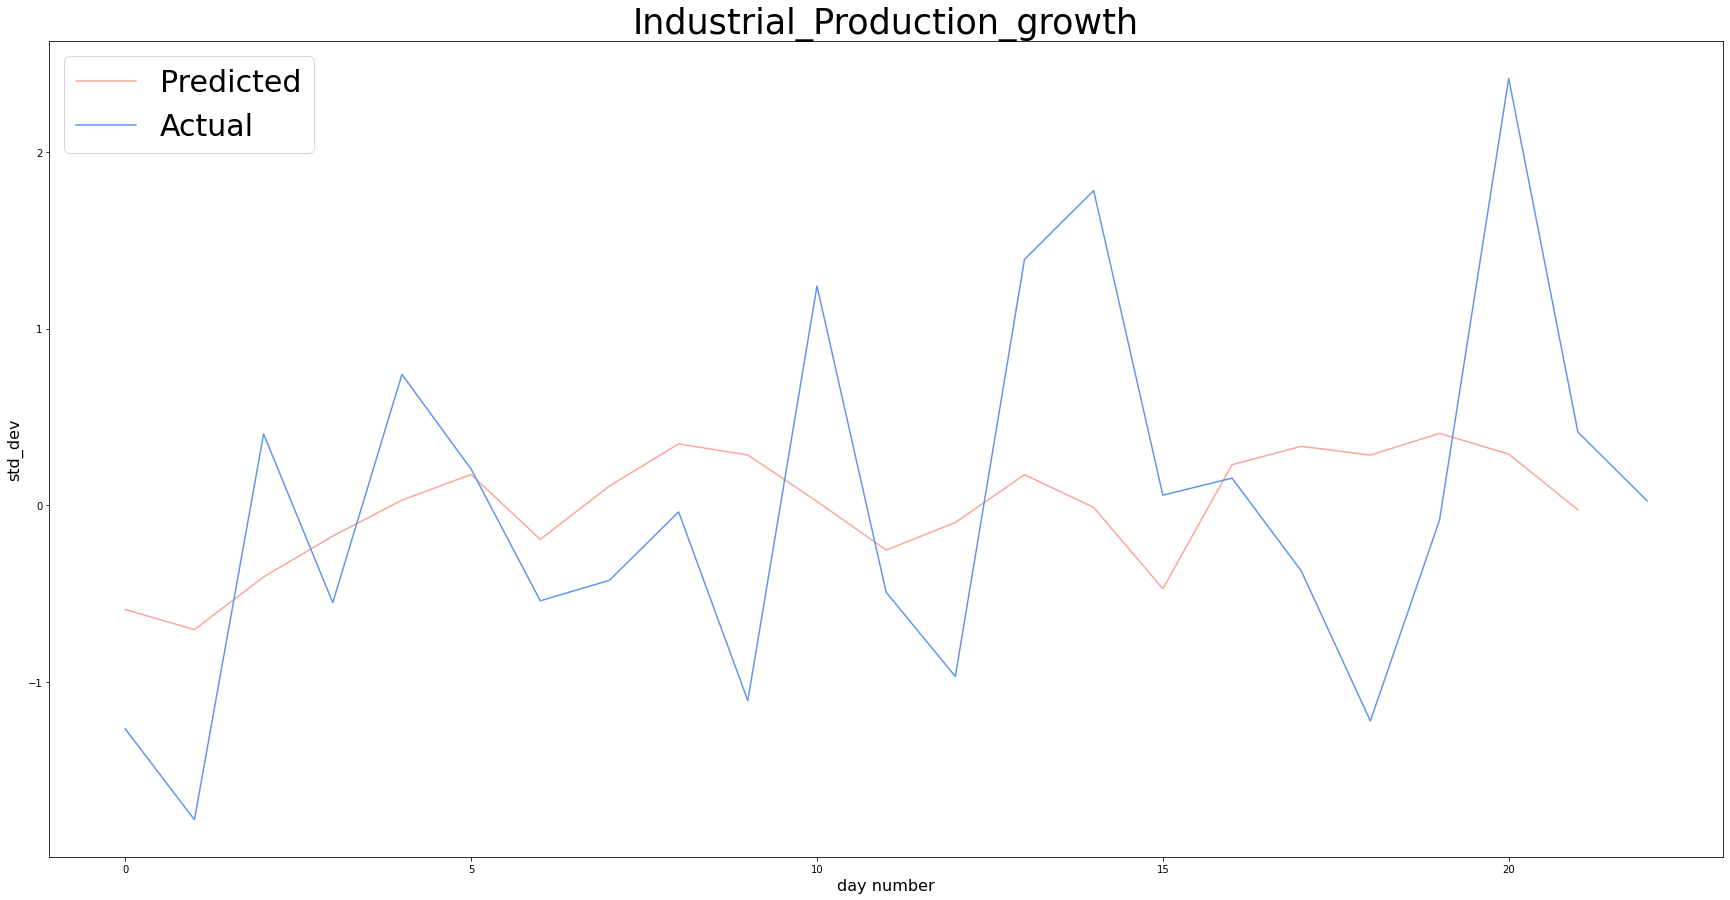

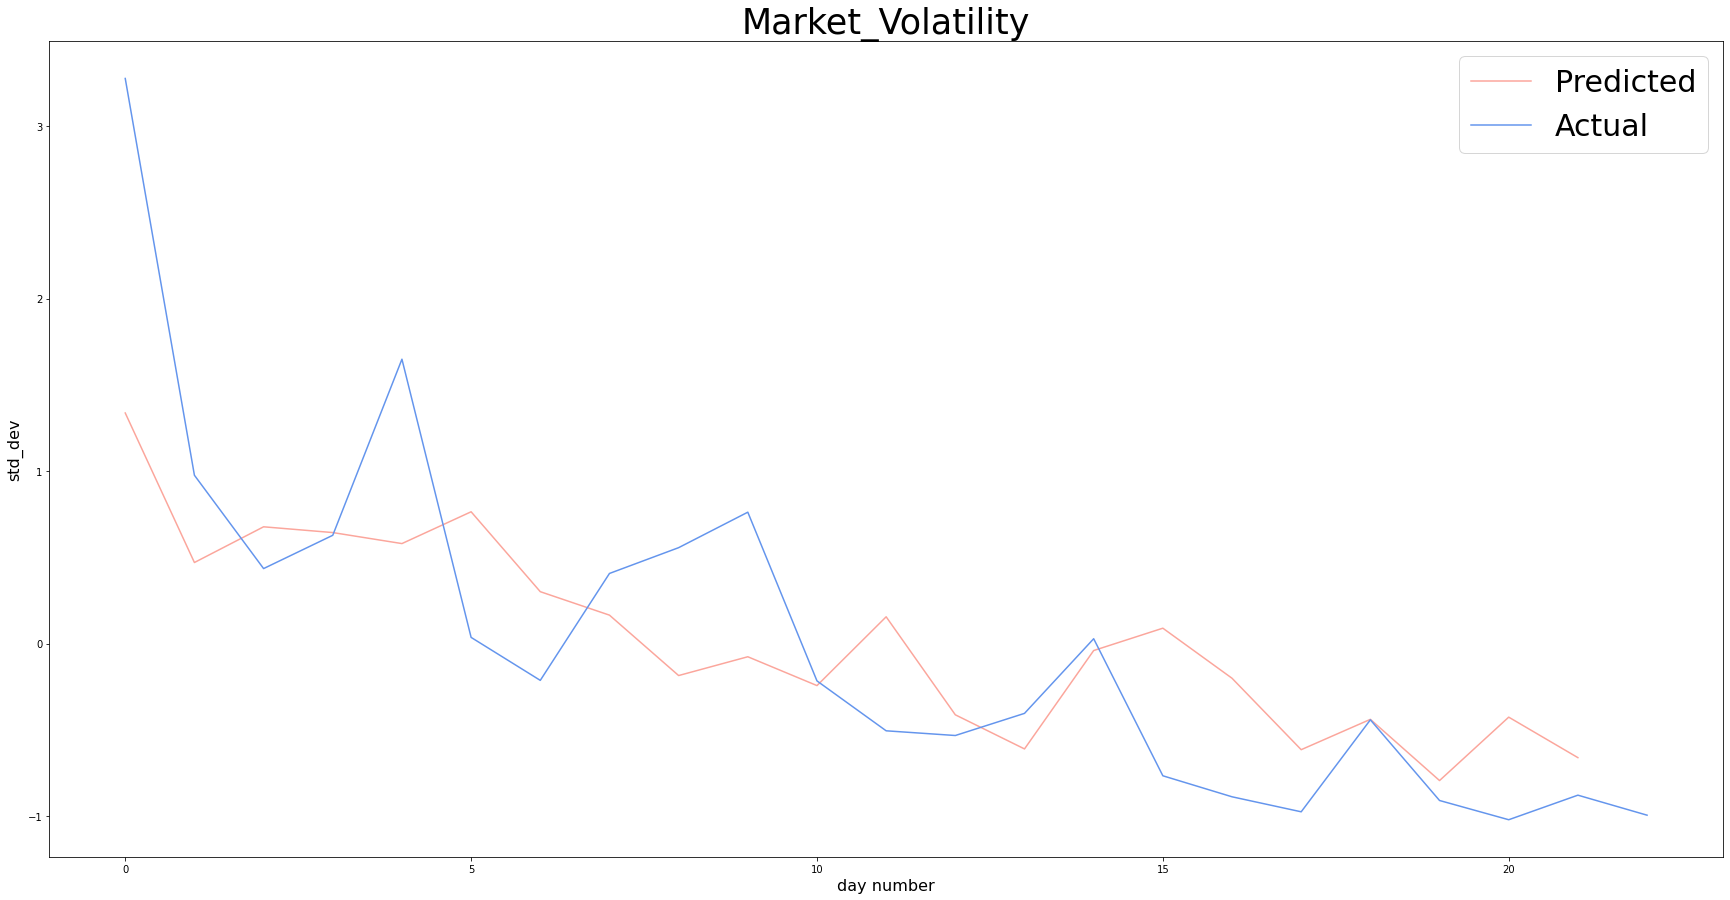

In [1086]:
for i in range(len(keys)):    
    fig, ax = plt.subplots(figsize=(30, 15))
    ax.plot(pred_test[keys[i]][:-1], alpha = 0.7, color = 'salmon', label='Predicted')
    ax.plot(y_test_scaled_dict[keys[i]], alpha = 1, color = 'cornflowerblue', label='Actual')
    ax.legend(fontsize='large', prop={'size': 30})
    ax.set_title(keys[i], fontsize=35)
    ax.set_ylabel('std_dev', fontsize=16)
    ax.set_xlabel('day number', fontsize =16)
    fig.show
